# Word prediction in historical linguistics
This is a Jupyter notebook and Python library to demonstrate the use of word prediction using deep learning as an aid in historical linguistics. This notebook is based on [master thesis work by Peter Dekker](http://peterdekker.eu/projects/#mscthesis). The results yielded by this demonstrational notebook may differ somewhat from the results in the thesis.

Any questions or problems?
 * [Contact me](https://peterdekker.eu/#contact)
 * [File a bug report](https://github.com/peterdekker/prediction-histling/issues)

## Prerequisites

### Application and data loading
Run this cell before running other cells. Execution of this cell takes a long time the first time, since automatic cognate judgments (using external LexStat algorithm) are inferred for the whole data set. These cognate judgments are used to perform evaluation of the word prediction algorithm.

To enable GPU support for the encoder-decoder, refer to the [Theano documentation](http://deeplearning.net/software/theano/tutorial/using_gpu.html).

The following settings can be changed by the user:
 * Set languages by alternatively setting one of these two variables:
   * `languages`: Give a list of languages (language codes from [NorthEuraLex](http://northeuralex.org/languages)) to take under consideration.
   * `lang_family`: `None`, `slav` or `ger`. If `lang_family` has been set (not `None`), `languages` will be disregarded. If `lang_family` is `None`, `languages` will be used.
 * `cognate_detection`: `False` by default, which allows multiple forms per concept, which leads to a larger data set. If you would like to be able to perform cognate detection based on prediction results (a later step in this notebook), set this variable to `True`, which restricts the data set to one form per concept.

 * `input_encoding`: the procedure used to encode phonemes into input vectors. `embedding` by default. Can be set to `character` (one-hot), `phonetic` or `embedding`.
 * `export_weights`: `False` by default. Set to `True` to be able to export and visualize the weights of the network. Do this only for diagnostic/visualization purposes, because the batch size will be set to 1, which is not optimal.
 * `view_embedding_ipa`: `True` by default. Internally, the ASJP character set is used to predict words. To view the embedding encoding visualization as IPA, set this to True. If False, embedding encoding visualization will be shown in ASJP. Note: this option is purely aesthetical.


Other, more advanced, options can be set in the file `util/config.py`, the notebook should then be reloaded.

In [1]:
from util import init
from dataset import data
from util.config import config
import pandas as pd
import sys

lang_family_dict = {
"slav": ["ces", "bul", "rus", "bel", "ukr", "pol", "slk", "slv", "hrv"],
"ger": ["swe", "isl", "eng", "nld", "deu", "dan", "nor"]
}

#--------------------------------------------------------------------
# VARIABLES TO BE SET BY USER
languages = ["nld","deu","eng"]
lang_family = "slav" # None
cognate_detection = False
config["export_weights"] = True
config["input_encoding"] = "embedding"
config["view_embedding_ipa"] = True
#--------------------------------------------------------------------

i_enc = config["input_encoding"]
o_enc = config["output_encoding"]

if config["export_weights"]:
    config["batch_size"]=1

if lang_family:
    languages = lang_family_dict[lang_family]

options, distances_path, baselines_path = init.initialize_program(cognate_detection, config=config)
(results_path, output_path_cognates_train, output_path_cognates_valtest,
context_vectors_path, subs_sp_path, subs_st_path, lang_pairs, train, val, test, max_len, 
conversion_key, voc_size, feature_matrix_phon) = data.load_data(train_corpus="northeuralex",
                                                               valtest_corpus="northeuralex",
                                                               languages=languages,  
                                                               input_type="asjp", 
                                                               options=options,
                                                               cognate_detection=False,
                                                               config=config)

Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_mn4cbdqv.c:4:10: fatal error: cudnn.h: No such file or directory\n    4 | #include <cudnn.h>\n      |          ^~~~~~~~~\ncompilation terminated.\n'
Mapped name None to device cuda: GeForce RTX 2080 SUPER (0000:26:00.0)
2020-07-17 16:17:29,958 [INFO] Successfully changed parameters.


Initializing program...
Loading phonetic feature matrix...
Generating all language pairs...
Training corpus:
 - Loading dataset and performing necessary conversion/tokenization.
Using existing wordlist file, nothing is generated.
 - Detect cognates in entire dataset using LexStat.
Using existing cognates file output/northeuralex-asjp-cognates.tsv, nothing is generated.
Train corpus is valtest corpus.
Creating feature matrix for this specific language pair...
 - Creating embedding for ces
Converting training corpus TSV file to data matrix...
Converting val/test corpus TSV file to data matrix...
USE TRAIN M/S
Dividing into training, validation and test set...
Train/val/test sizes: 808|0|0
Train/val/test sizes: 0|268|268
Filtering val/test sets on cognates...
Val/test sizes after cognate filtering: 145|142
Creating feature matrix for this specific language pair...
 - Creating embedding for ces
 -- Using existing embedding file for ces
Converting training corpus TSV file to data matrix...


USE TRAIN M/S
Dividing into training, validation and test set...
Train/val/test sizes: 730|0|0
Train/val/test sizes: 0|243|243
Filtering val/test sets on cognates...
Val/test sizes after cognate filtering: 128|153
Creating feature matrix for this specific language pair...
 - Creating embedding for rus
 -- Using existing embedding file for rus
Converting training corpus TSV file to data matrix...
Converting val/test corpus TSV file to data matrix...
USE TRAIN M/S
Dividing into training, validation and test set...
Train/val/test sizes: 669|0|0
Train/val/test sizes: 0|222|222
Filtering val/test sets on cognates...
Val/test sizes after cognate filtering: 170|170
Creating feature matrix for this specific language pair...
 - Creating embedding for rus
 -- Using existing embedding file for rus
Converting training corpus TSV file to data matrix...
Converting val/test corpus TSV file to data matrix...
USE TRAIN M/S
Dividing into training, validation and test set...
Train/val/test sizes: 664|0|0

Val/test sizes after cognate filtering: 185|183
Creating feature matrix for this specific language pair...
 - Creating embedding for ukr
 -- Using existing embedding file for ukr
Converting training corpus TSV file to data matrix...
Converting val/test corpus TSV file to data matrix...
USE TRAIN M/S
Dividing into training, validation and test set...
Train/val/test sizes: 720|0|0
Train/val/test sizes: 0|239|239
Filtering val/test sets on cognates...
Val/test sizes after cognate filtering: 140|155
Creating feature matrix for this specific language pair...
 - Creating embedding for ukr
 -- Using existing embedding file for ukr
Converting training corpus TSV file to data matrix...
Converting val/test corpus TSV file to data matrix...
USE TRAIN M/S
Dividing into training, validation and test set...
Train/val/test sizes: 776|0|0
Train/val/test sizes: 0|258|258
Filtering val/test sets on cognates...
Val/test sizes after cognate filtering: 145|155
Creating feature matrix for this specific lang

Converting val/test corpus TSV file to data matrix...
USE TRAIN M/S
Dividing into training, validation and test set...
Train/val/test sizes: 800|0|0
Train/val/test sizes: 0|266|266
Filtering val/test sets on cognates...
Val/test sizes after cognate filtering: 47|51
Creating feature matrix for this specific language pair...
 - Creating embedding for slk
 -- Using existing embedding file for slk
Converting training corpus TSV file to data matrix...
Converting val/test corpus TSV file to data matrix...
USE TRAIN M/S
Dividing into training, validation and test set...
Train/val/test sizes: 934|0|0
Train/val/test sizes: 0|310|310
Filtering val/test sets on cognates...
Val/test sizes after cognate filtering: 85|80
Creating feature matrix for this specific language pair...
 - Creating embedding for slv
Converting training corpus TSV file to data matrix...
Converting val/test corpus TSV file to data matrix...
USE TRAIN M/S
Dividing into training, validation and test set...
Train/val/test sizes:

### Visualize encoding
Visualize the representation of phonemes in the embedding encoding, as PCA and as hierarchically clustered tree. Compare them to the phonetic feature matrix from Brown (2008).

Phonetic matrix from Brown (2008):
 - Create PCA plot for encoding phonetic-pca.


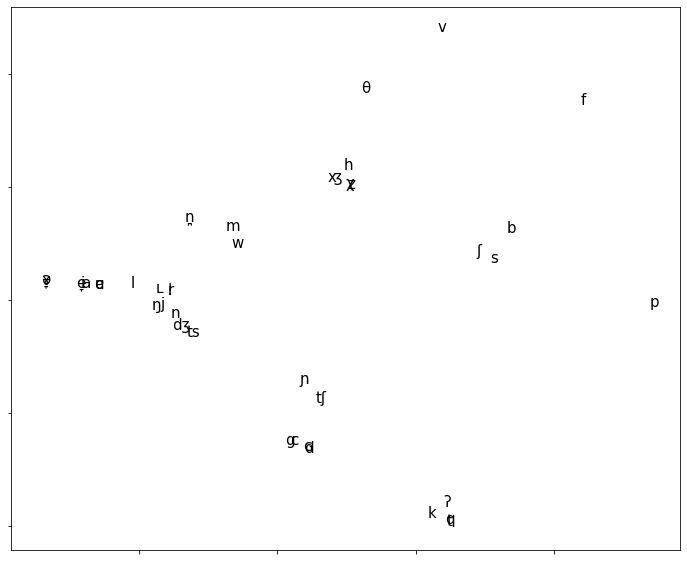

 - Creating tree using Neighbour joining, saving to .nw and .pdf


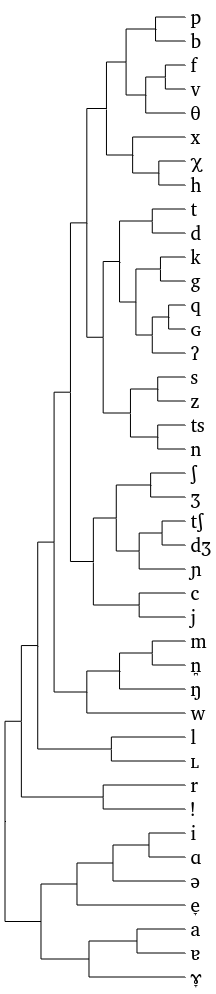

Embedding for ces:
 - Creating embedding for ces
 -- Using existing embedding file for ces
 - Create PCA plot for encoding embedding-ces-pca.


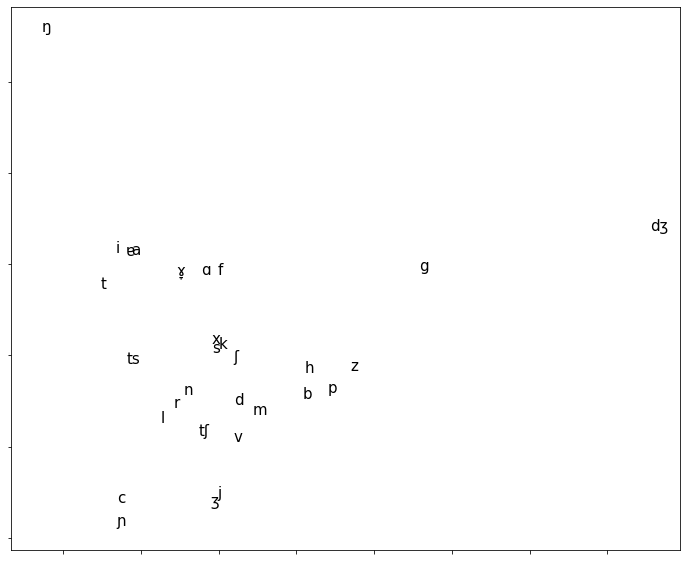

 - Creating tree using Neighbour joining, saving to .nw and .pdf


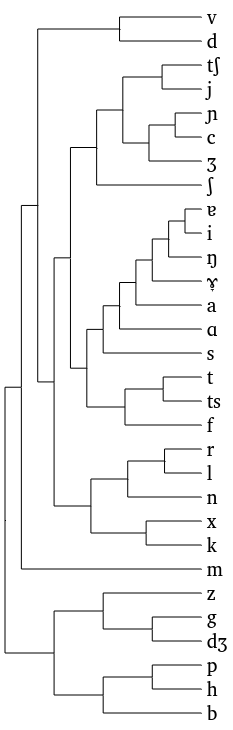

Embedding for ces:
 - Creating embedding for ces
 -- Using existing embedding file for ces
 - Create PCA plot for encoding embedding-ces-pca.


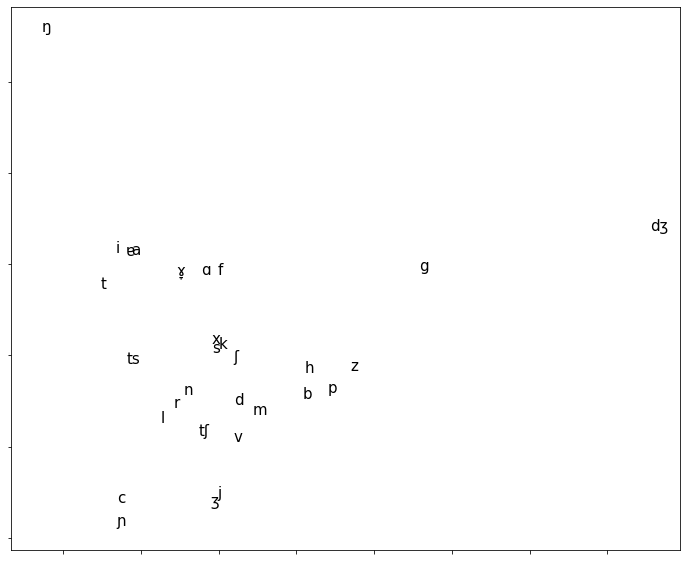

 - Creating tree using Neighbour joining, saving to .nw and .pdf


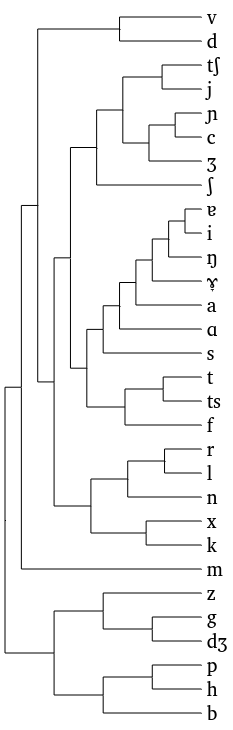

Embedding for ces:
 - Creating embedding for ces
 -- Using existing embedding file for ces
 - Create PCA plot for encoding embedding-ces-pca.


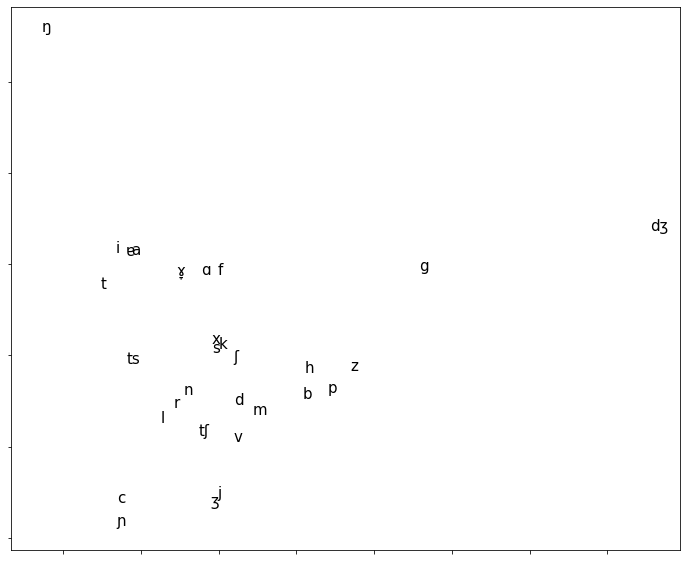

 - Creating tree using Neighbour joining, saving to .nw and .pdf


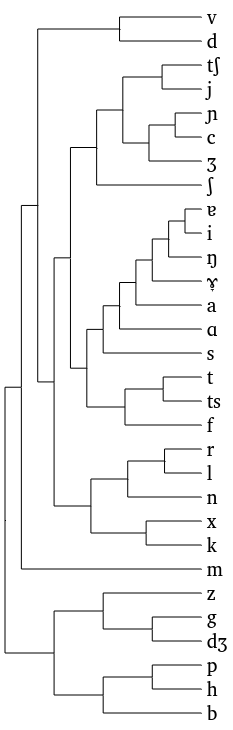

Embedding for ces:
 - Creating embedding for ces
 -- Using existing embedding file for ces
 - Create PCA plot for encoding embedding-ces-pca.


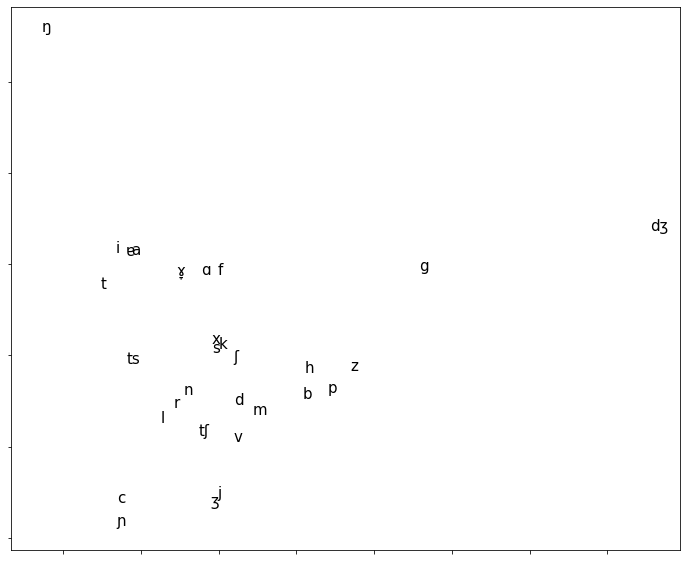

 - Creating tree using Neighbour joining, saving to .nw and .pdf


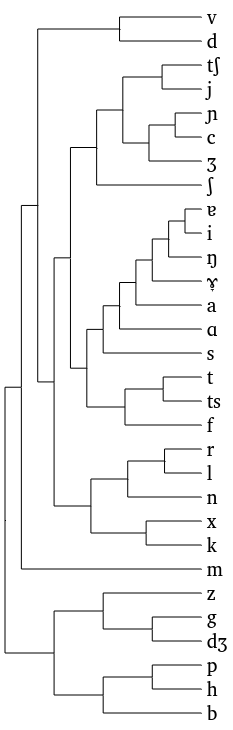

Embedding for ces:
 - Creating embedding for ces
 -- Using existing embedding file for ces
 - Create PCA plot for encoding embedding-ces-pca.


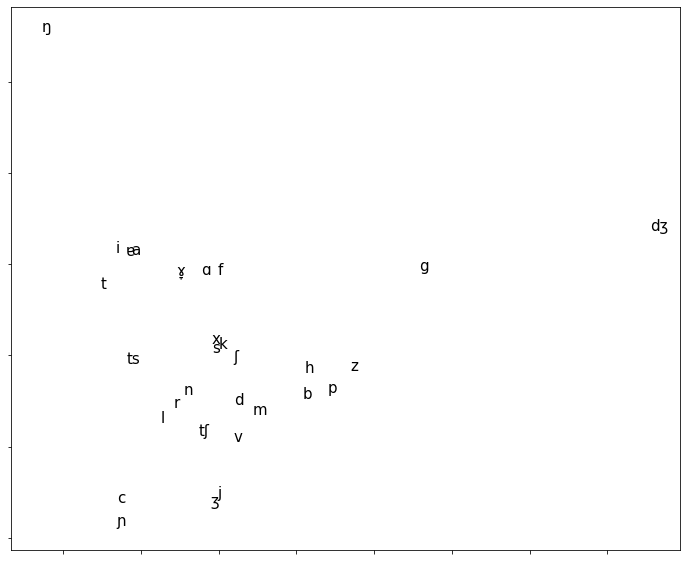

 - Creating tree using Neighbour joining, saving to .nw and .pdf


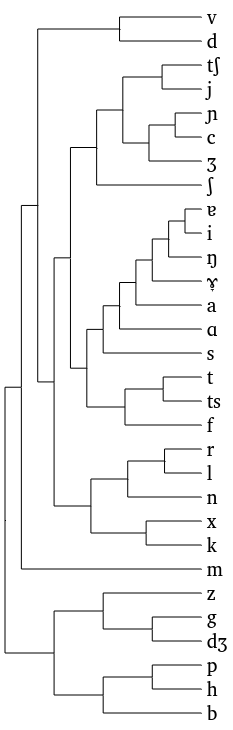

Embedding for ces:
 - Creating embedding for ces
 -- Using existing embedding file for ces
 - Create PCA plot for encoding embedding-ces-pca.


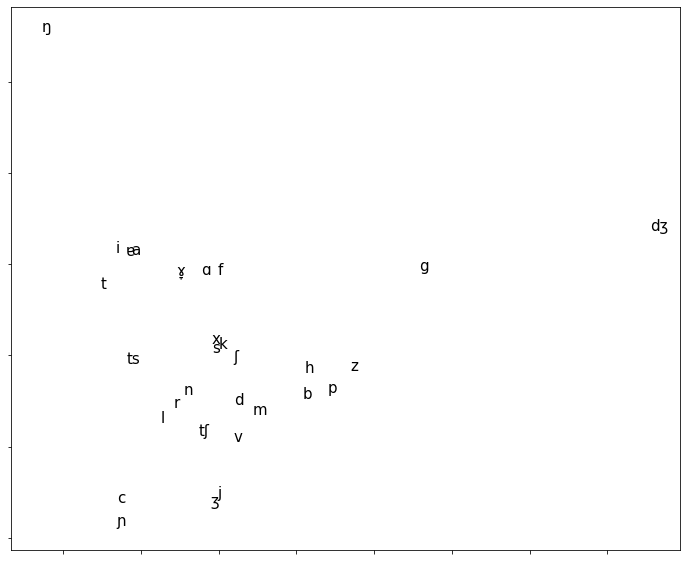

 - Creating tree using Neighbour joining, saving to .nw and .pdf


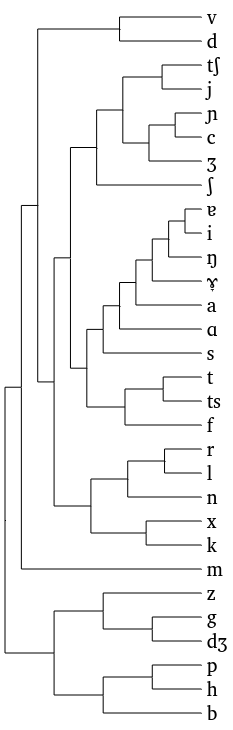

Embedding for ces:
 - Creating embedding for ces
 -- Using existing embedding file for ces
 - Create PCA plot for encoding embedding-ces-pca.


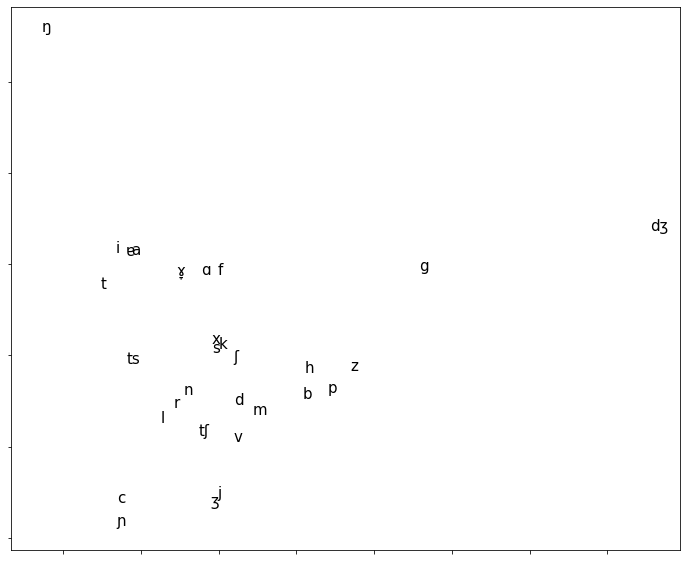

 - Creating tree using Neighbour joining, saving to .nw and .pdf


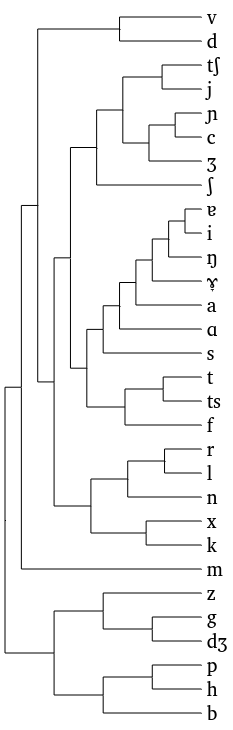

Embedding for ces:
 - Creating embedding for ces
 -- Using existing embedding file for ces
 - Create PCA plot for encoding embedding-ces-pca.


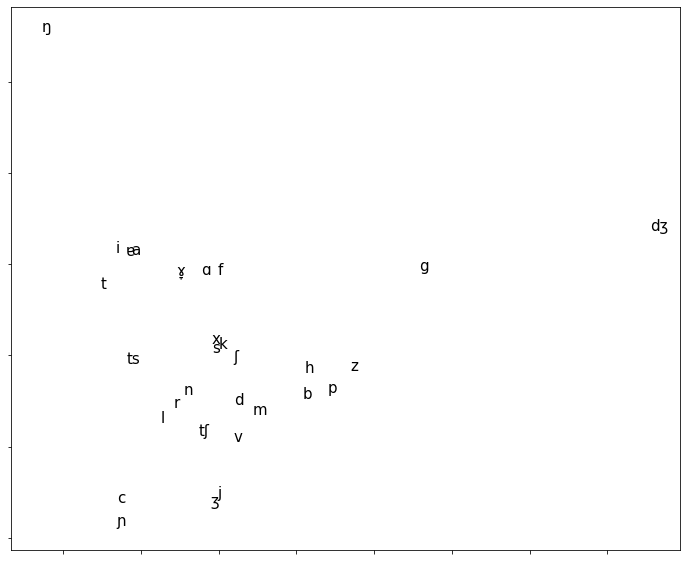

 - Creating tree using Neighbour joining, saving to .nw and .pdf


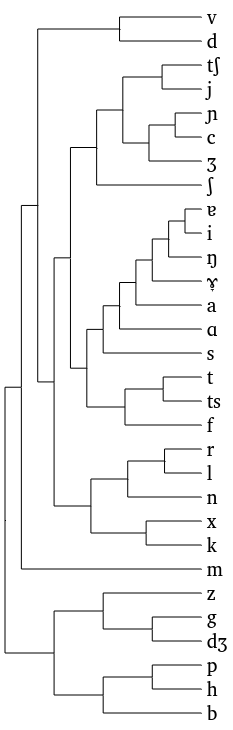

Embedding for bul:
 - Creating embedding for bul
 -- Using existing embedding file for bul
 - Create PCA plot for encoding embedding-bul-pca.


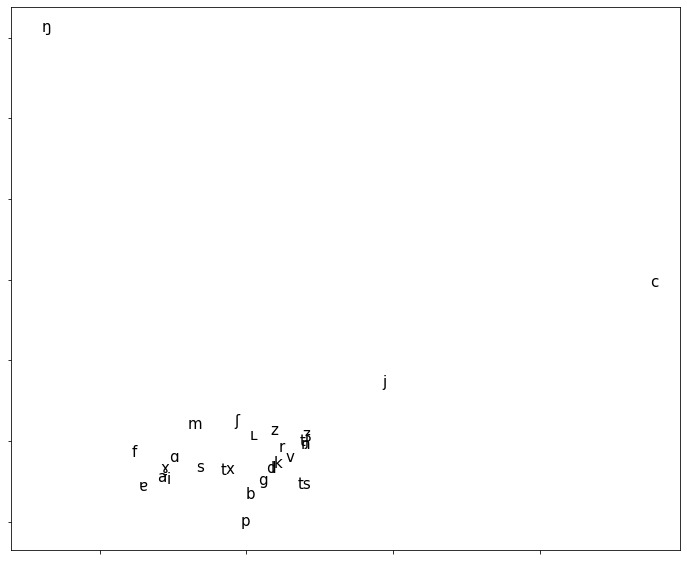

 - Creating tree using Neighbour joining, saving to .nw and .pdf


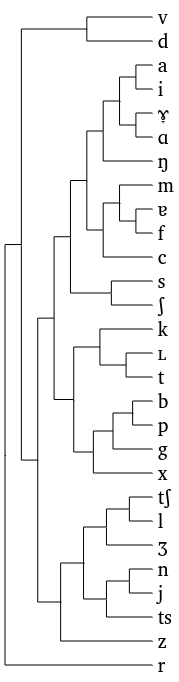

Embedding for bul:
 - Creating embedding for bul
 -- Using existing embedding file for bul
 - Create PCA plot for encoding embedding-bul-pca.


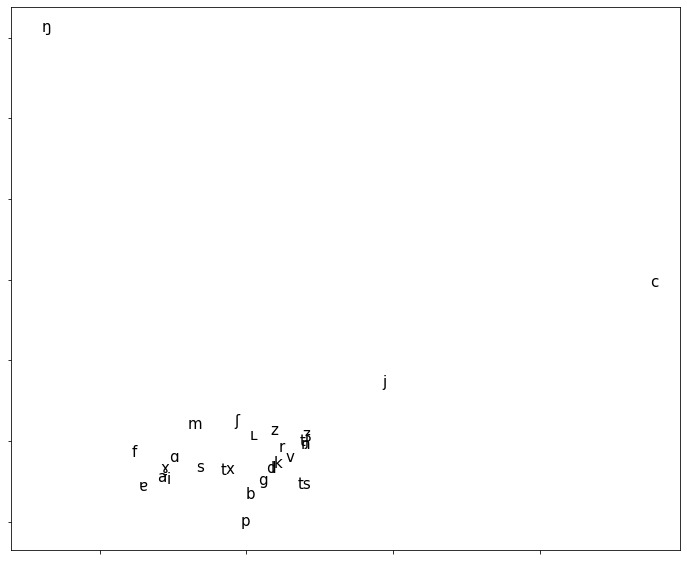

 - Creating tree using Neighbour joining, saving to .nw and .pdf


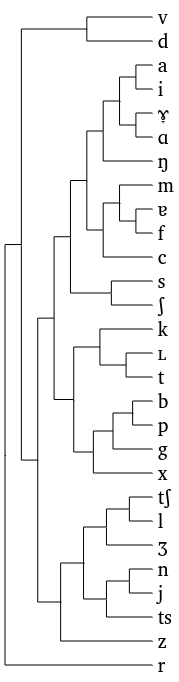

Embedding for bul:
 - Creating embedding for bul
 -- Using existing embedding file for bul
 - Create PCA plot for encoding embedding-bul-pca.


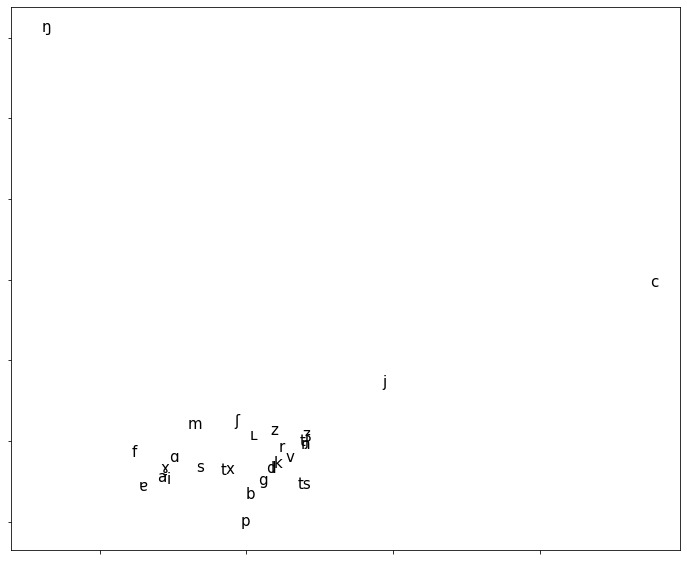

 - Creating tree using Neighbour joining, saving to .nw and .pdf


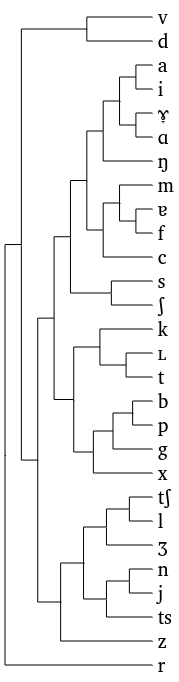

Embedding for bul:
 - Creating embedding for bul
 -- Using existing embedding file for bul
 - Create PCA plot for encoding embedding-bul-pca.


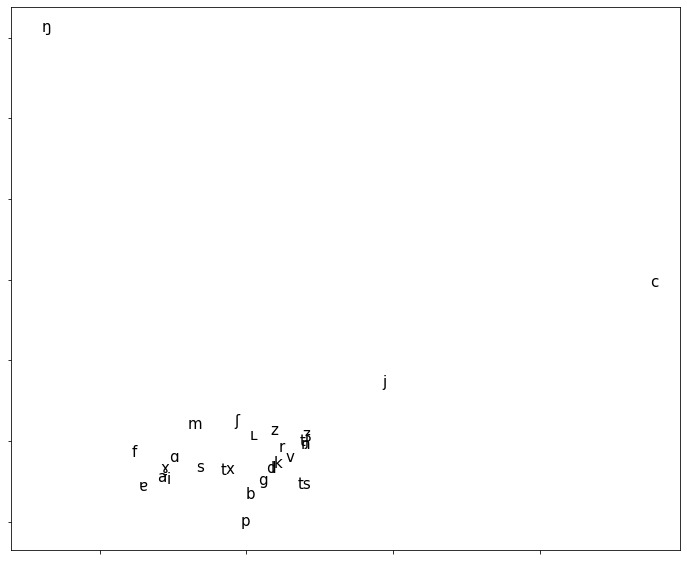

 - Creating tree using Neighbour joining, saving to .nw and .pdf


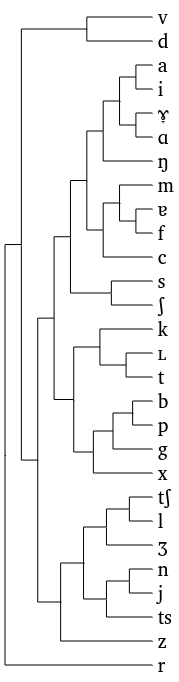

Embedding for bul:
 - Creating embedding for bul
 -- Using existing embedding file for bul
 - Create PCA plot for encoding embedding-bul-pca.


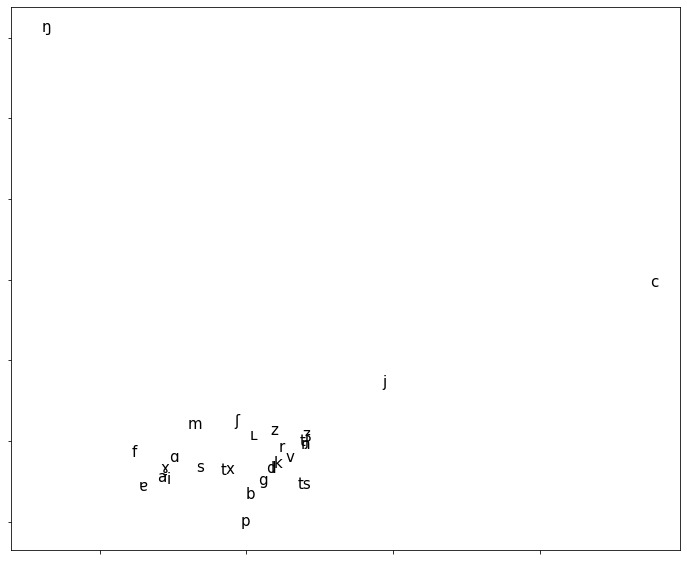

 - Creating tree using Neighbour joining, saving to .nw and .pdf


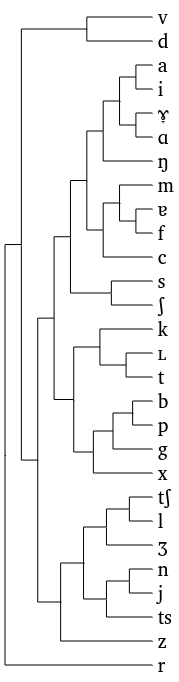

Embedding for bul:
 - Creating embedding for bul
 -- Using existing embedding file for bul
 - Create PCA plot for encoding embedding-bul-pca.


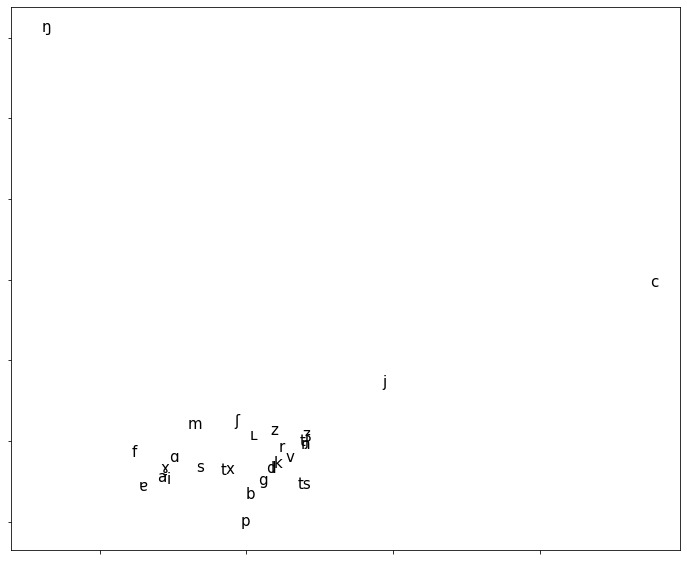

 - Creating tree using Neighbour joining, saving to .nw and .pdf


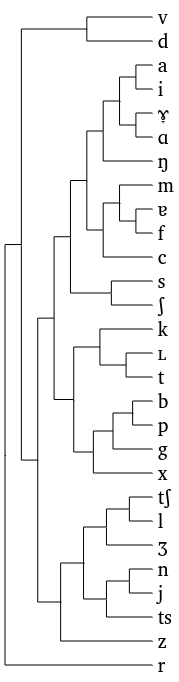

Embedding for bul:
 - Creating embedding for bul
 -- Using existing embedding file for bul
 - Create PCA plot for encoding embedding-bul-pca.


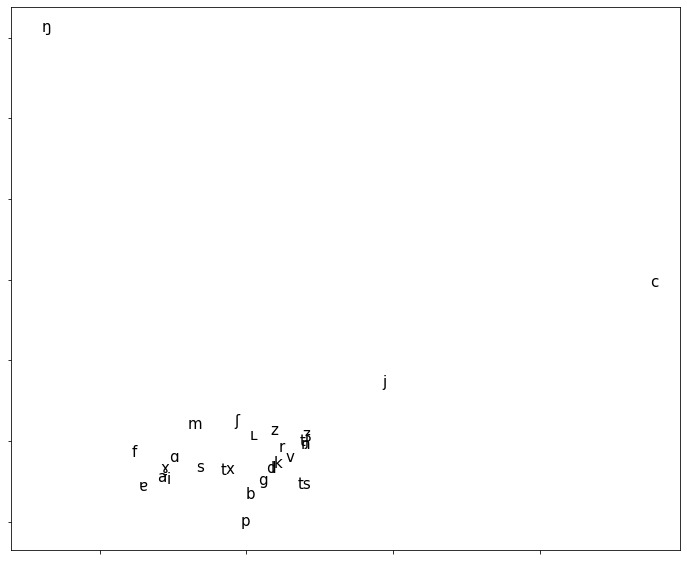

 - Creating tree using Neighbour joining, saving to .nw and .pdf


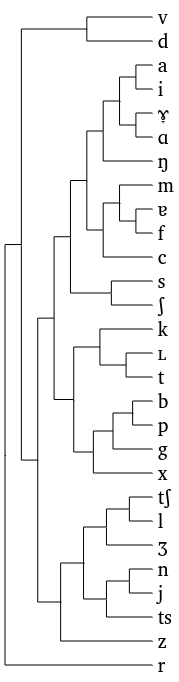

Embedding for bul:
 - Creating embedding for bul
 -- Using existing embedding file for bul
 - Create PCA plot for encoding embedding-bul-pca.


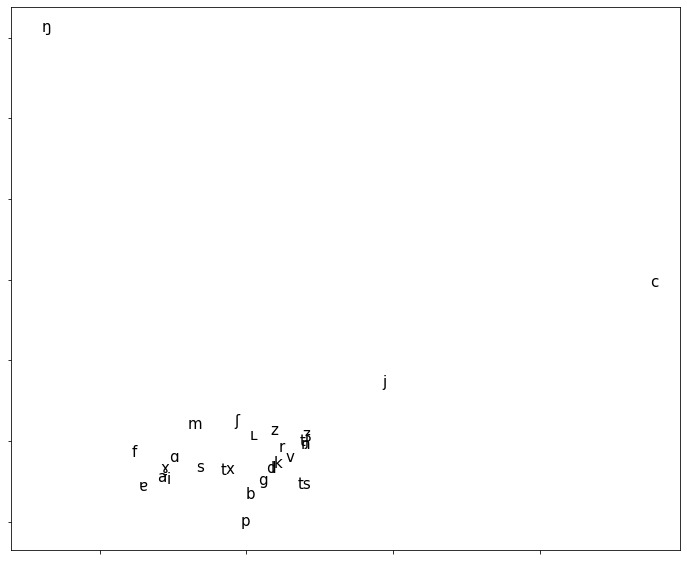

 - Creating tree using Neighbour joining, saving to .nw and .pdf


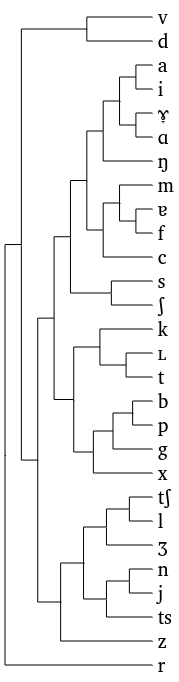

Embedding for rus:
 - Creating embedding for rus
 -- Using existing embedding file for rus
 - Create PCA plot for encoding embedding-rus-pca.


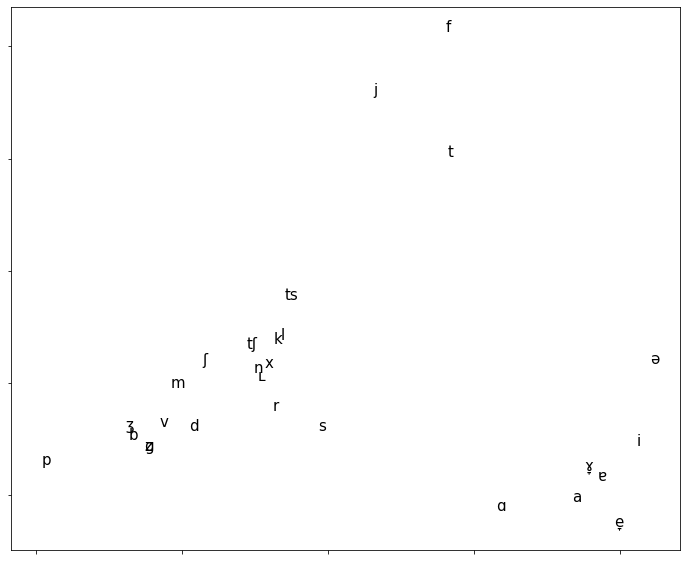

 - Creating tree using Neighbour joining, saving to .nw and .pdf


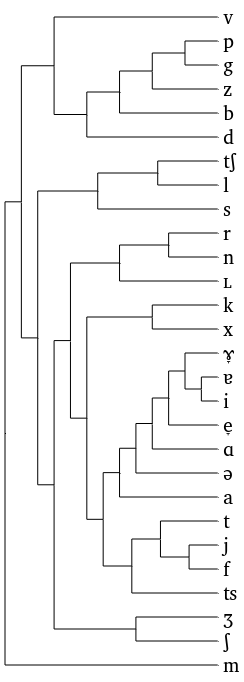

Embedding for rus:
 - Creating embedding for rus
 -- Using existing embedding file for rus
 - Create PCA plot for encoding embedding-rus-pca.


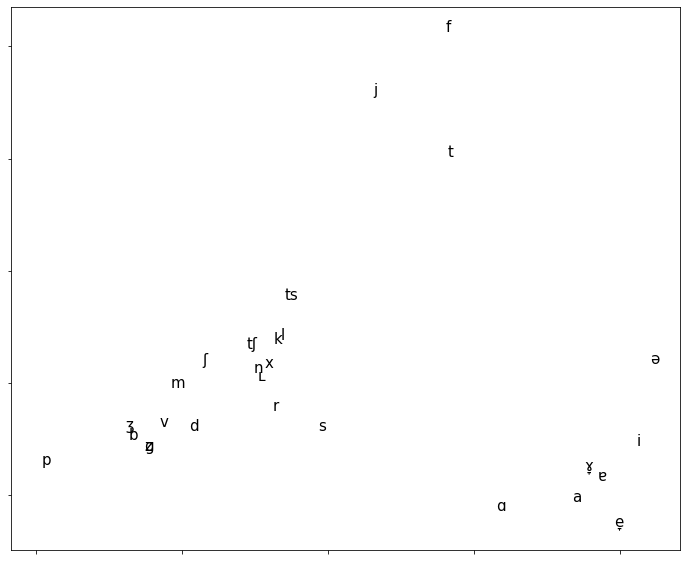

 - Creating tree using Neighbour joining, saving to .nw and .pdf


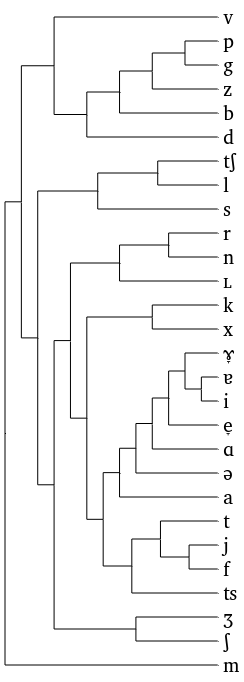

Embedding for rus:
 - Creating embedding for rus
 -- Using existing embedding file for rus
 - Create PCA plot for encoding embedding-rus-pca.


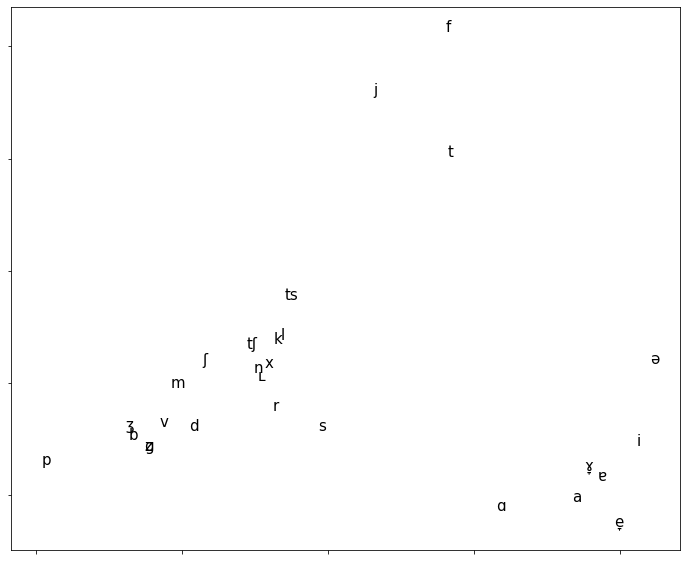

 - Creating tree using Neighbour joining, saving to .nw and .pdf


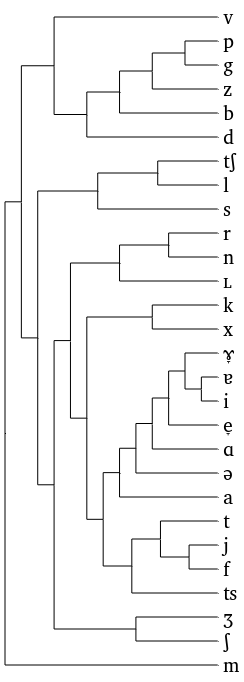

Embedding for rus:
 - Creating embedding for rus
 -- Using existing embedding file for rus
 - Create PCA plot for encoding embedding-rus-pca.


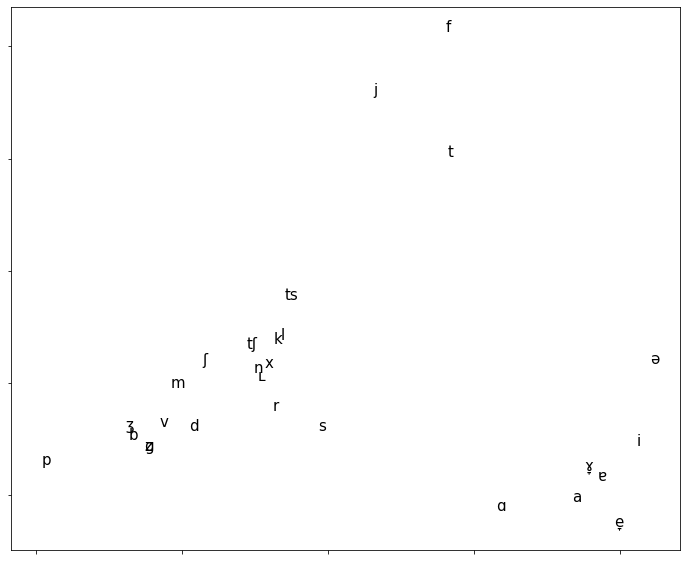

 - Creating tree using Neighbour joining, saving to .nw and .pdf


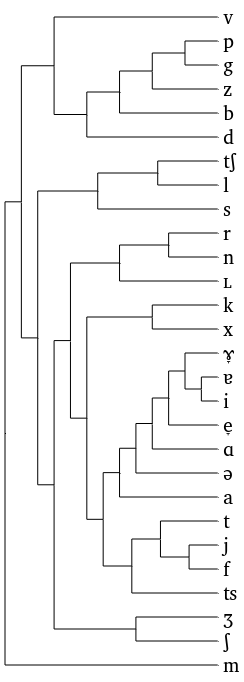

Embedding for rus:
 - Creating embedding for rus
 -- Using existing embedding file for rus
 - Create PCA plot for encoding embedding-rus-pca.


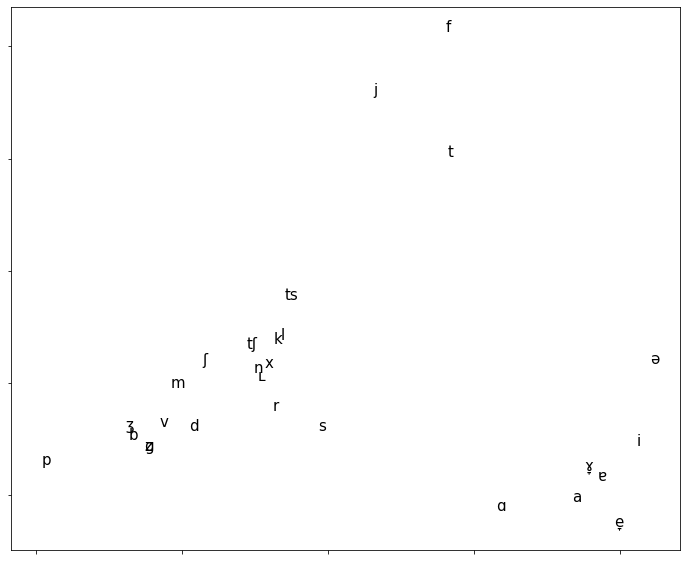

 - Creating tree using Neighbour joining, saving to .nw and .pdf


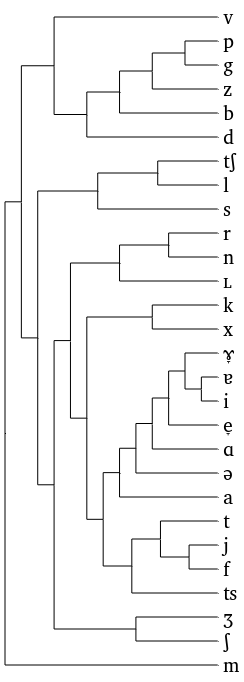

Embedding for rus:
 - Creating embedding for rus
 -- Using existing embedding file for rus
 - Create PCA plot for encoding embedding-rus-pca.


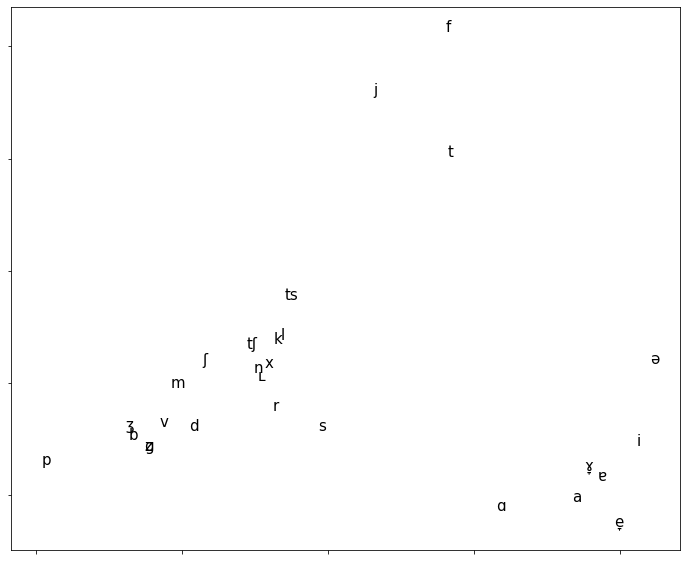

 - Creating tree using Neighbour joining, saving to .nw and .pdf


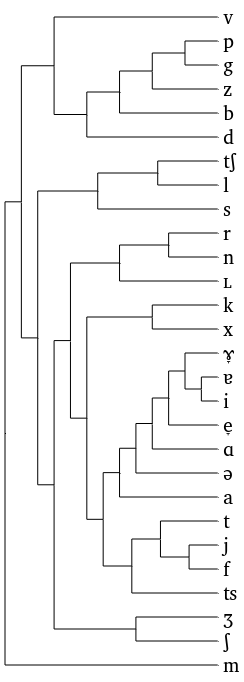

Embedding for rus:
 - Creating embedding for rus
 -- Using existing embedding file for rus
 - Create PCA plot for encoding embedding-rus-pca.


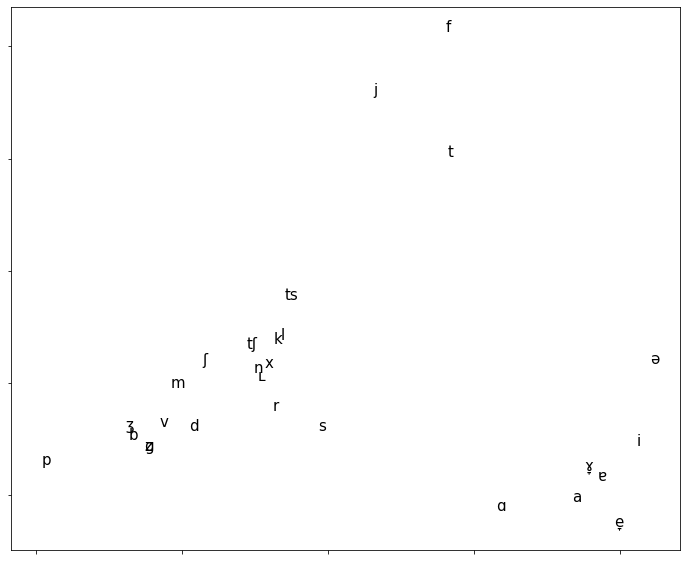

 - Creating tree using Neighbour joining, saving to .nw and .pdf


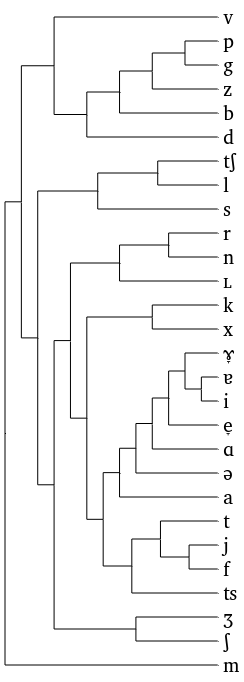

Embedding for rus:
 - Creating embedding for rus
 -- Using existing embedding file for rus
 - Create PCA plot for encoding embedding-rus-pca.


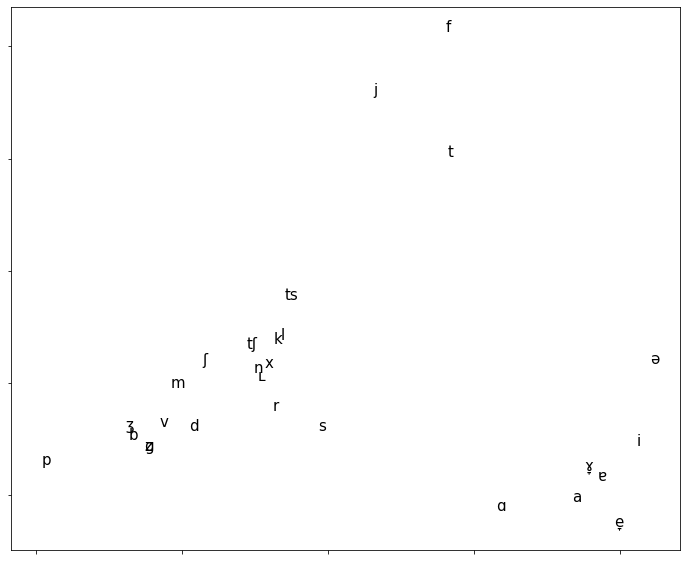

 - Creating tree using Neighbour joining, saving to .nw and .pdf


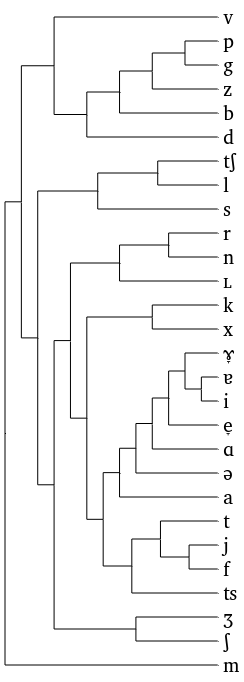

Embedding for bel:
 - Creating embedding for bel
 -- Using existing embedding file for bel
 - Create PCA plot for encoding embedding-bel-pca.


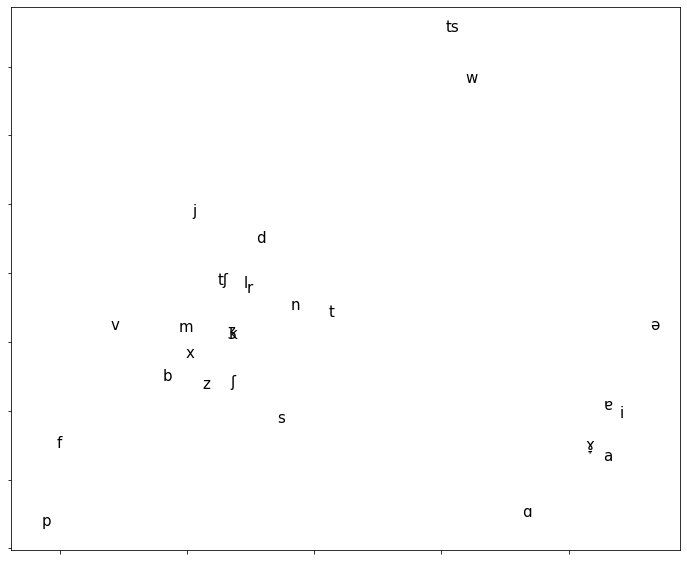

 - Creating tree using Neighbour joining, saving to .nw and .pdf


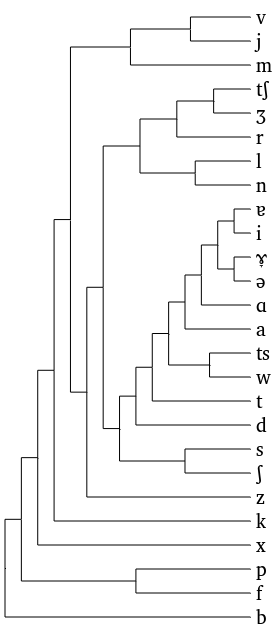

Embedding for bel:
 - Creating embedding for bel
 -- Using existing embedding file for bel
 - Create PCA plot for encoding embedding-bel-pca.


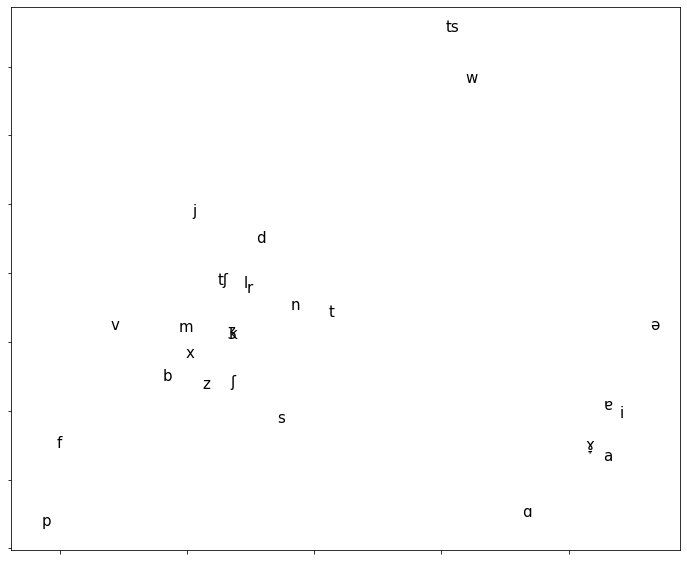

 - Creating tree using Neighbour joining, saving to .nw and .pdf


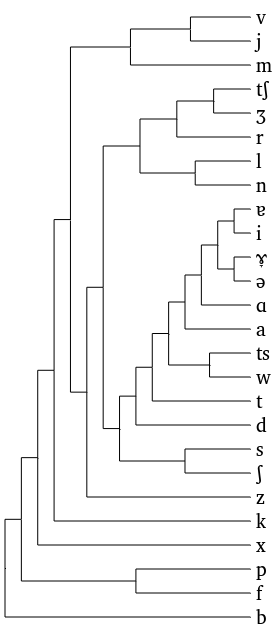

Embedding for bel:
 - Creating embedding for bel
 -- Using existing embedding file for bel
 - Create PCA plot for encoding embedding-bel-pca.


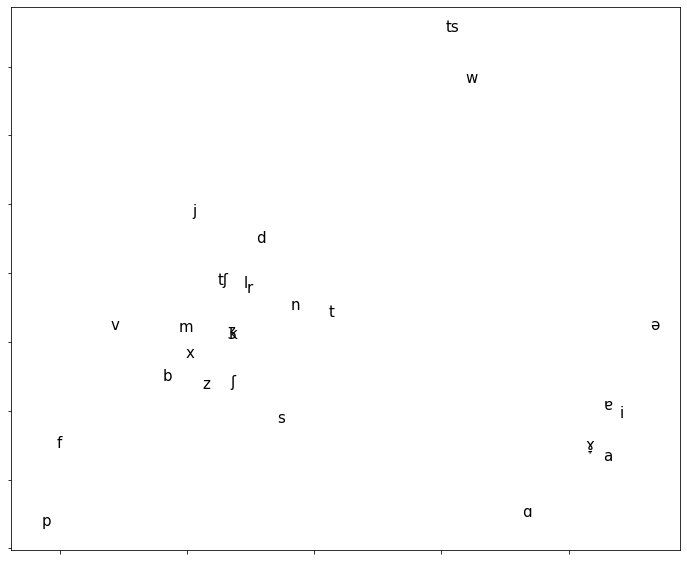

 - Creating tree using Neighbour joining, saving to .nw and .pdf


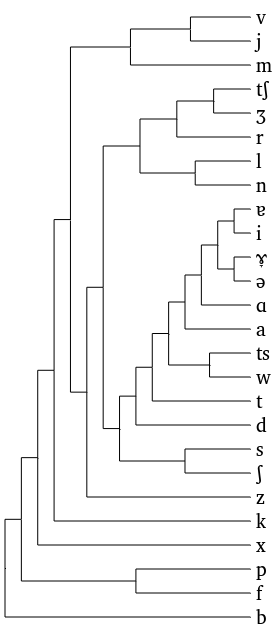

Embedding for bel:
 - Creating embedding for bel
 -- Using existing embedding file for bel
 - Create PCA plot for encoding embedding-bel-pca.


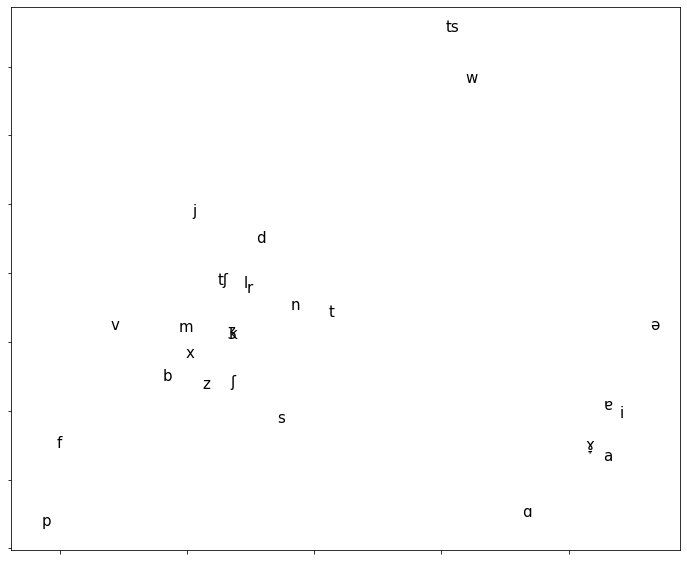

 - Creating tree using Neighbour joining, saving to .nw and .pdf


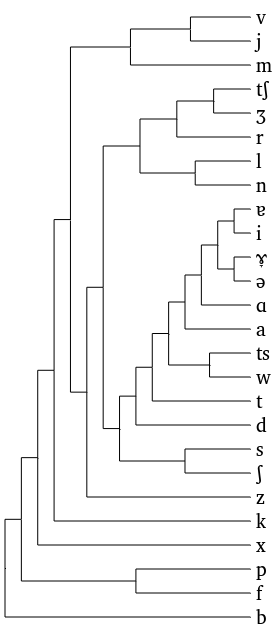

Embedding for bel:
 - Creating embedding for bel
 -- Using existing embedding file for bel
 - Create PCA plot for encoding embedding-bel-pca.


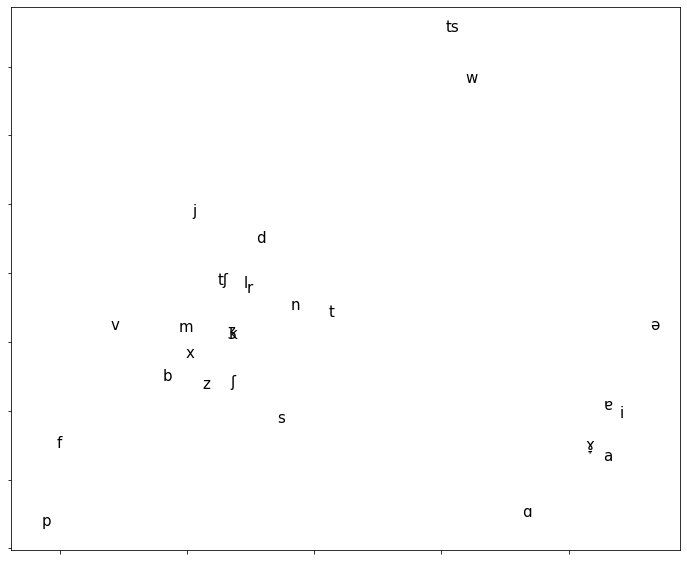

 - Creating tree using Neighbour joining, saving to .nw and .pdf


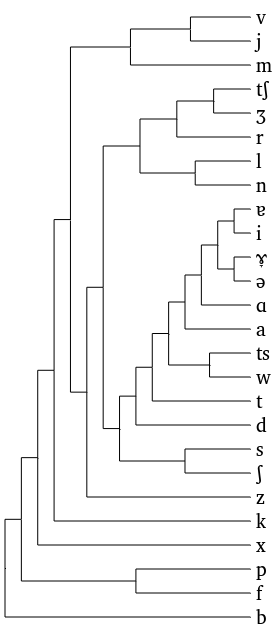

Embedding for bel:
 - Creating embedding for bel
 -- Using existing embedding file for bel
 - Create PCA plot for encoding embedding-bel-pca.


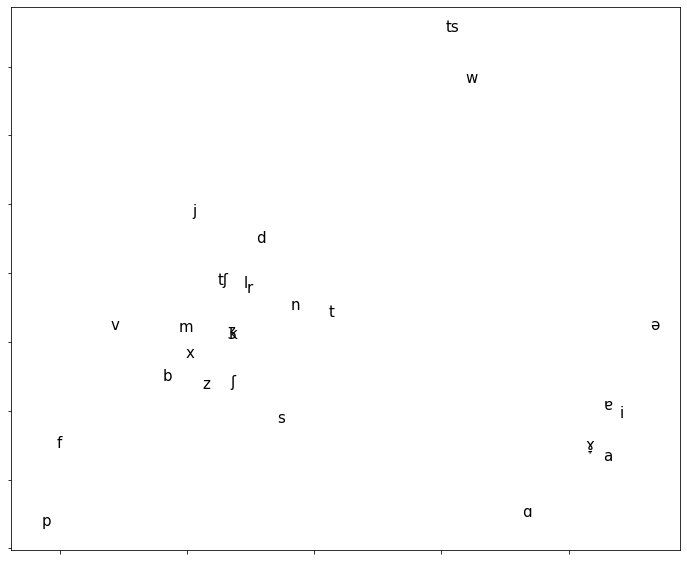

 - Creating tree using Neighbour joining, saving to .nw and .pdf


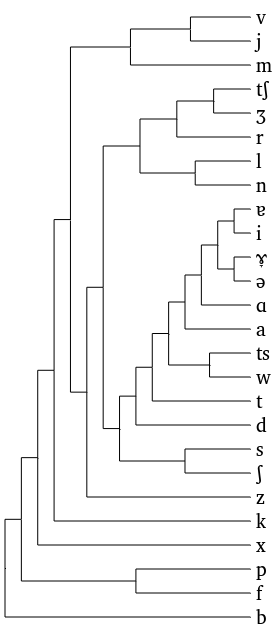

Embedding for bel:
 - Creating embedding for bel
 -- Using existing embedding file for bel
 - Create PCA plot for encoding embedding-bel-pca.


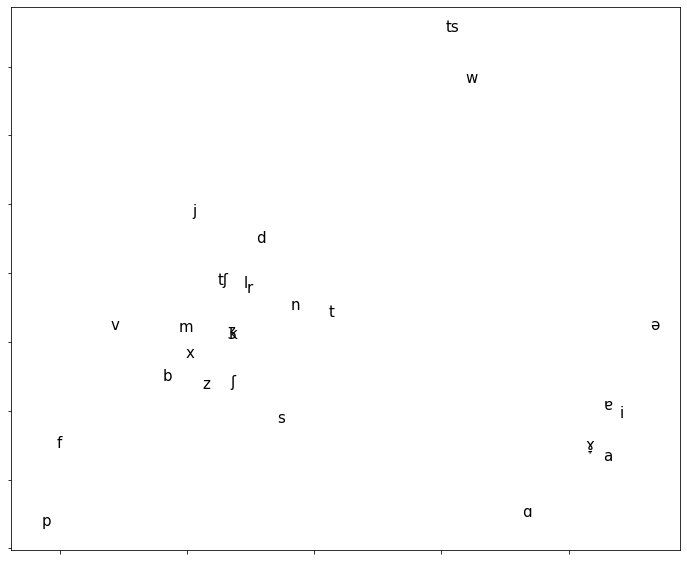

 - Creating tree using Neighbour joining, saving to .nw and .pdf


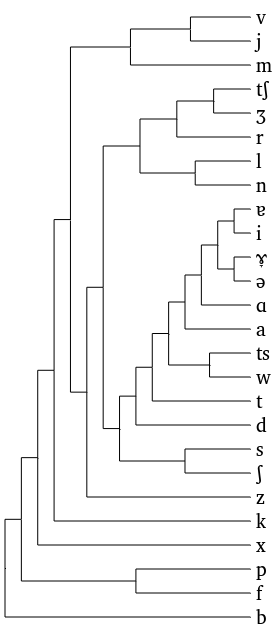

Embedding for bel:
 - Creating embedding for bel
 -- Using existing embedding file for bel
 - Create PCA plot for encoding embedding-bel-pca.


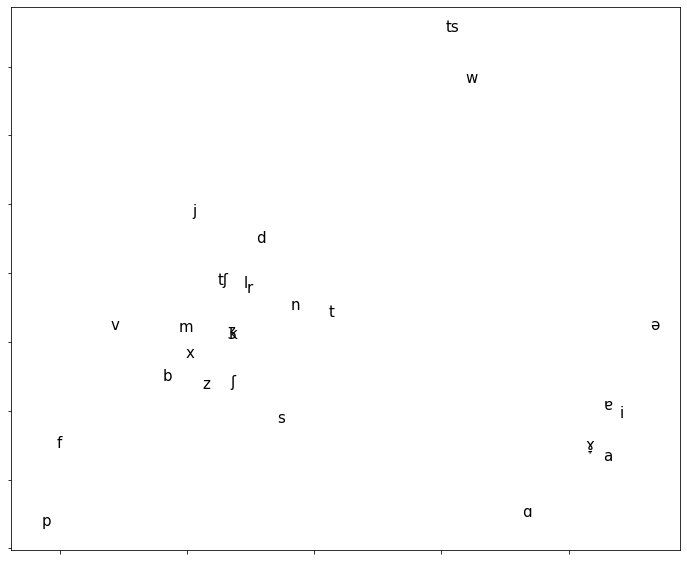

 - Creating tree using Neighbour joining, saving to .nw and .pdf


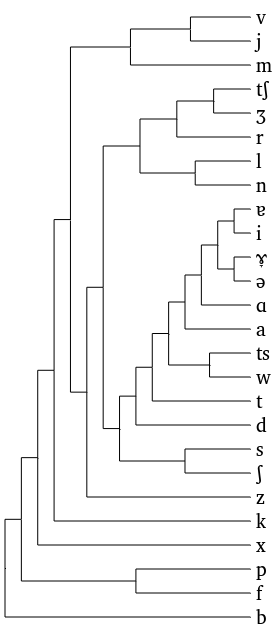

Embedding for ukr:
 - Creating embedding for ukr
 -- Using existing embedding file for ukr
 - Create PCA plot for encoding embedding-ukr-pca.


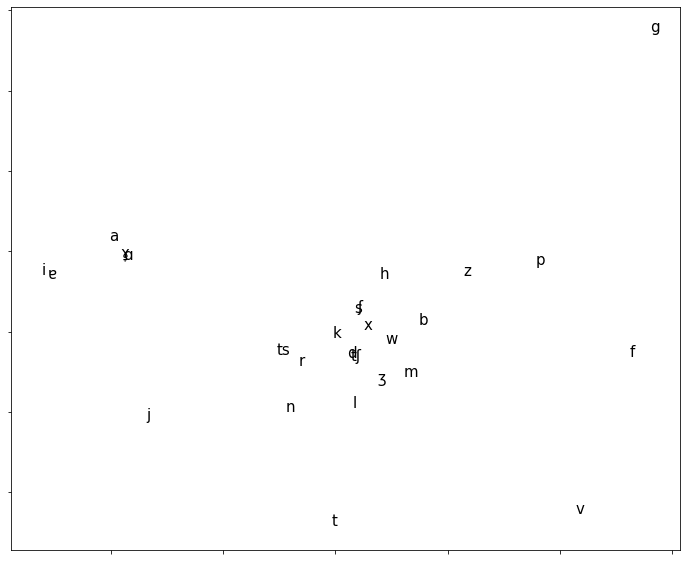

 - Creating tree using Neighbour joining, saving to .nw and .pdf


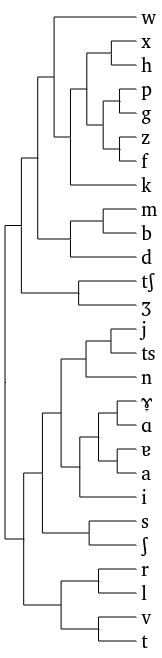

Embedding for ukr:
 - Creating embedding for ukr
 -- Using existing embedding file for ukr
 - Create PCA plot for encoding embedding-ukr-pca.


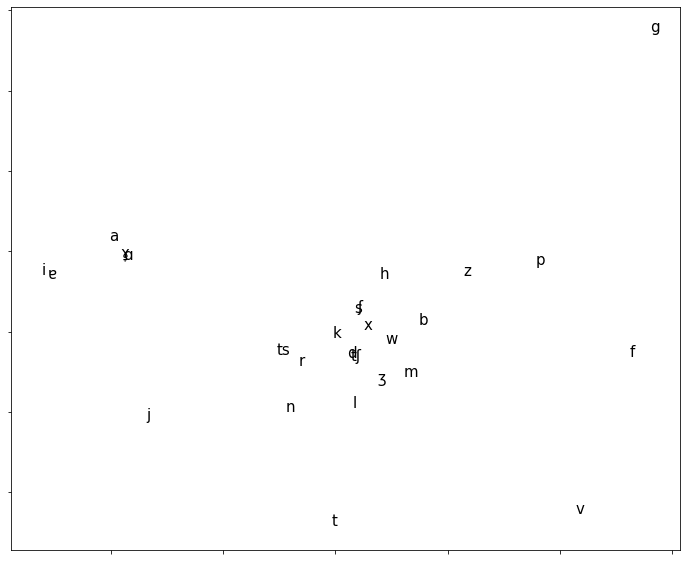

 - Creating tree using Neighbour joining, saving to .nw and .pdf


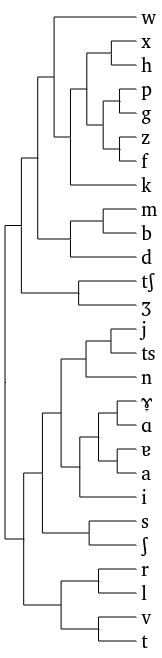

Embedding for ukr:
 - Creating embedding for ukr
 -- Using existing embedding file for ukr
 - Create PCA plot for encoding embedding-ukr-pca.


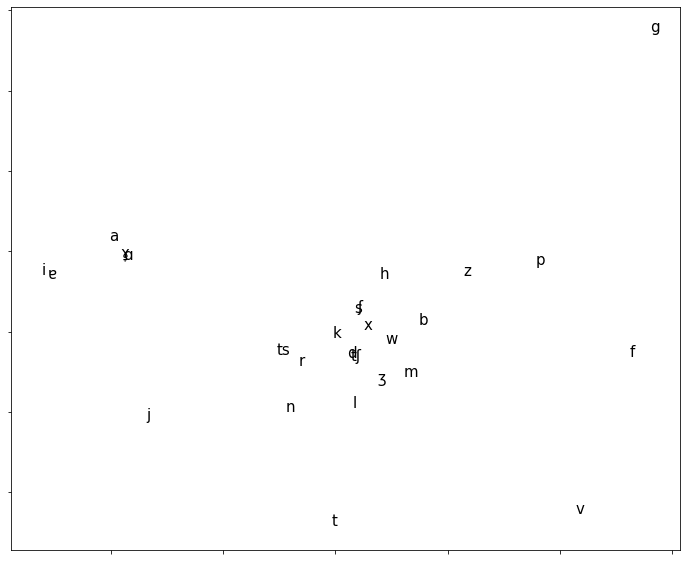

 - Creating tree using Neighbour joining, saving to .nw and .pdf


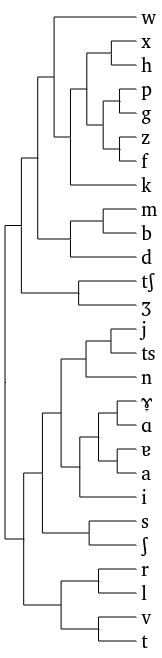

Embedding for ukr:
 - Creating embedding for ukr
 -- Using existing embedding file for ukr
 - Create PCA plot for encoding embedding-ukr-pca.


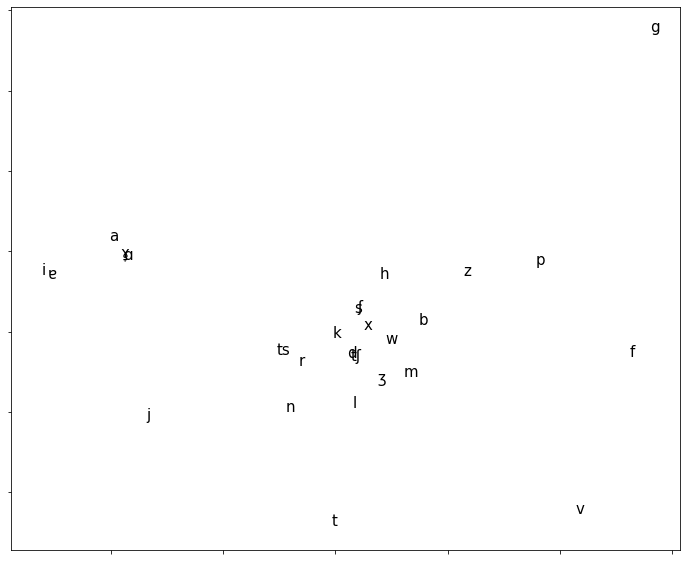

 - Creating tree using Neighbour joining, saving to .nw and .pdf


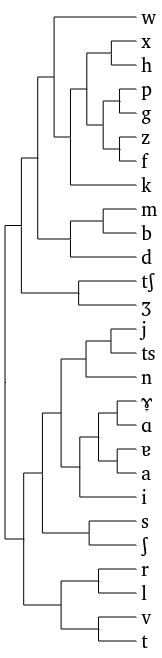

Embedding for ukr:
 - Creating embedding for ukr
 -- Using existing embedding file for ukr
 - Create PCA plot for encoding embedding-ukr-pca.


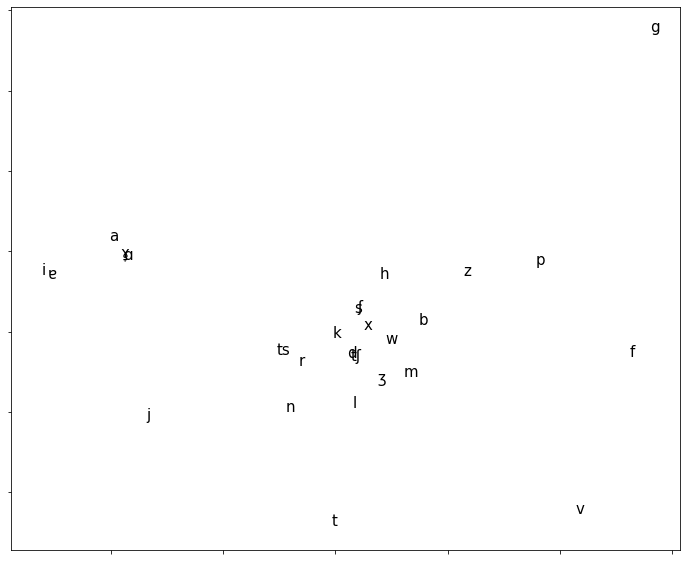

 - Creating tree using Neighbour joining, saving to .nw and .pdf


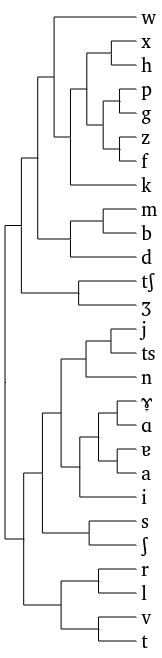

Embedding for ukr:
 - Creating embedding for ukr
 -- Using existing embedding file for ukr
 - Create PCA plot for encoding embedding-ukr-pca.


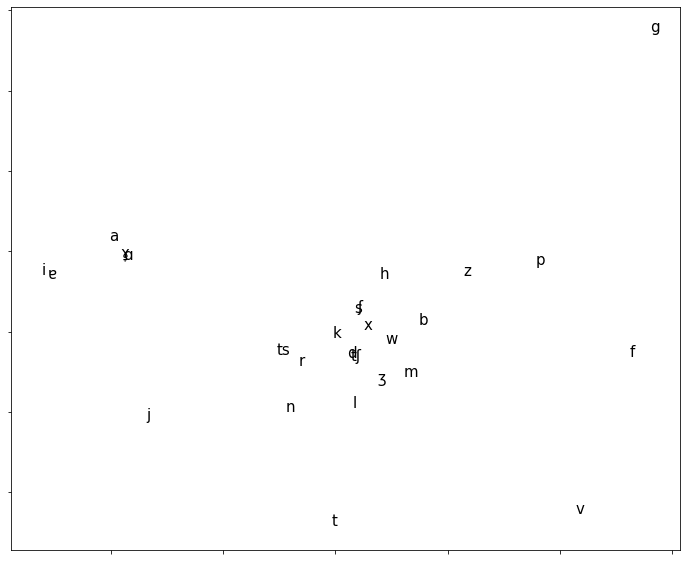

 - Creating tree using Neighbour joining, saving to .nw and .pdf


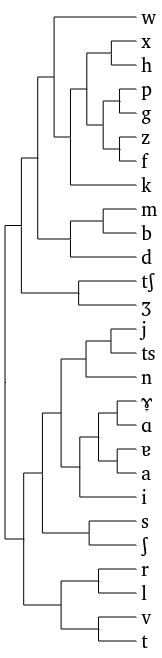

Embedding for ukr:
 - Creating embedding for ukr
 -- Using existing embedding file for ukr
 - Create PCA plot for encoding embedding-ukr-pca.


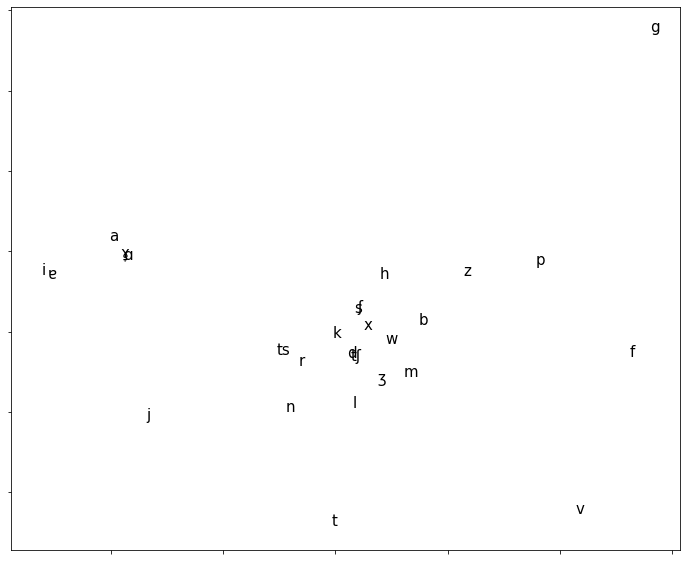

 - Creating tree using Neighbour joining, saving to .nw and .pdf


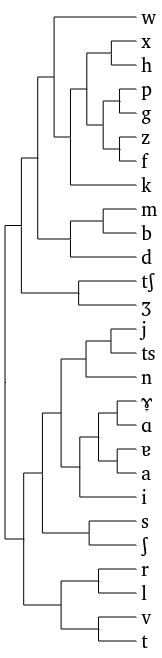

Embedding for ukr:
 - Creating embedding for ukr
 -- Using existing embedding file for ukr
 - Create PCA plot for encoding embedding-ukr-pca.


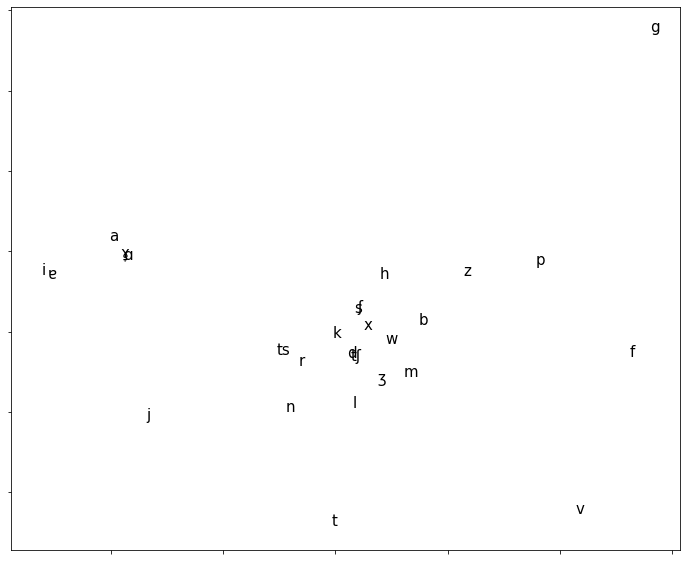

 - Creating tree using Neighbour joining, saving to .nw and .pdf


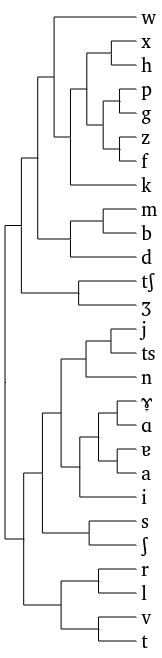

Embedding for pol:
 - Creating embedding for pol
 -- Using existing embedding file for pol
 - Create PCA plot for encoding embedding-pol-pca.


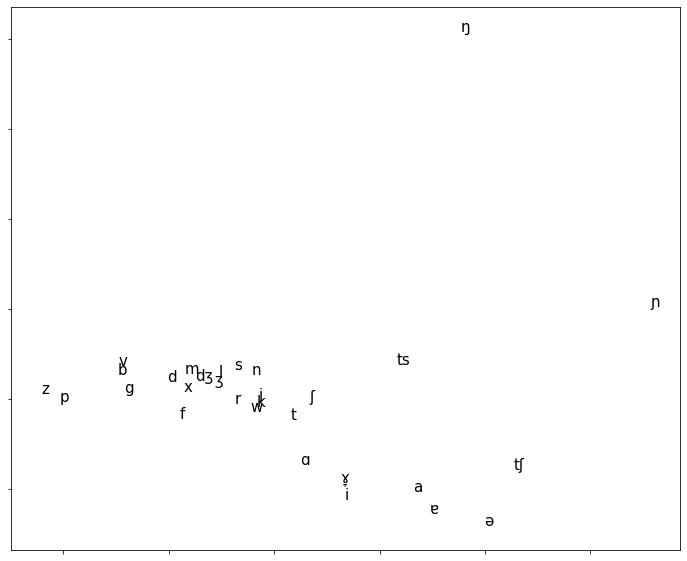

 - Creating tree using Neighbour joining, saving to .nw and .pdf


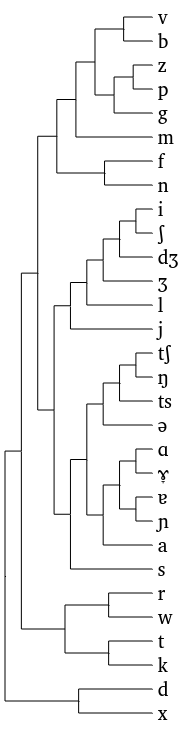

Embedding for pol:
 - Creating embedding for pol
 -- Using existing embedding file for pol
 - Create PCA plot for encoding embedding-pol-pca.


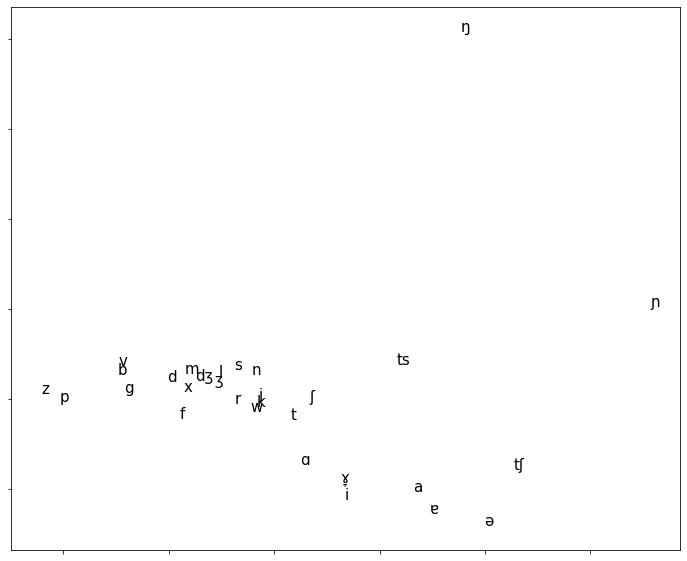

 - Creating tree using Neighbour joining, saving to .nw and .pdf


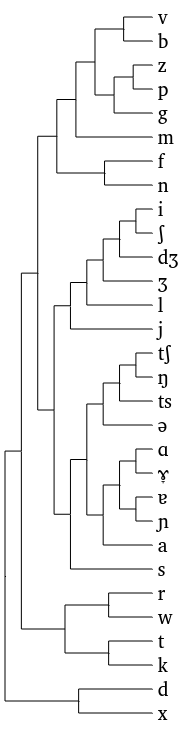

Embedding for pol:
 - Creating embedding for pol
 -- Using existing embedding file for pol
 - Create PCA plot for encoding embedding-pol-pca.


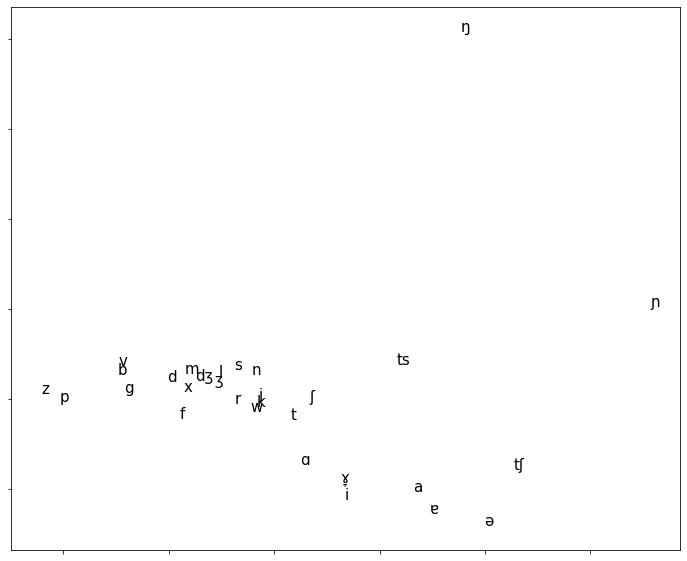

 - Creating tree using Neighbour joining, saving to .nw and .pdf


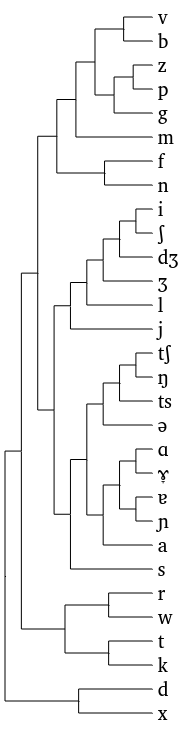

Embedding for pol:
 - Creating embedding for pol
 -- Using existing embedding file for pol
 - Create PCA plot for encoding embedding-pol-pca.


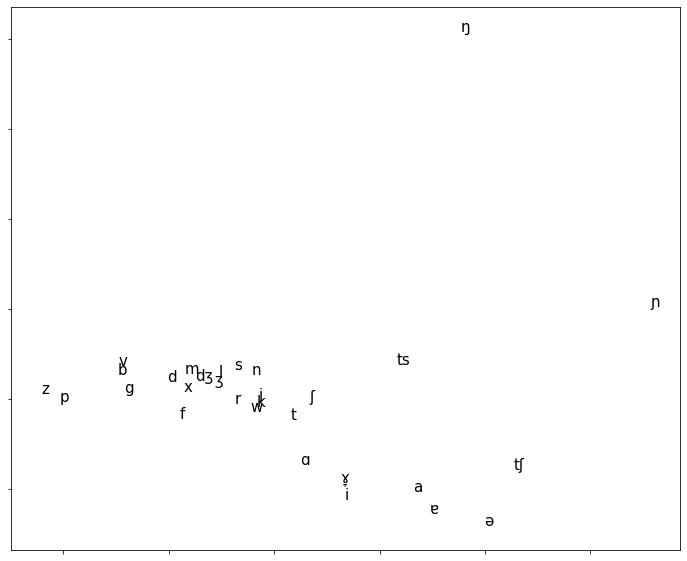

 - Creating tree using Neighbour joining, saving to .nw and .pdf


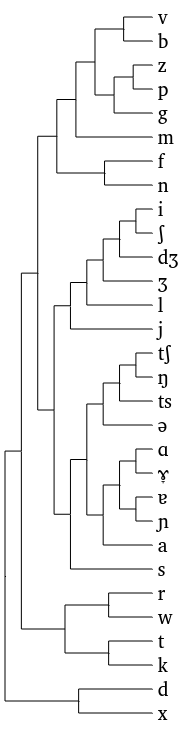

Embedding for pol:
 - Creating embedding for pol
 -- Using existing embedding file for pol
 - Create PCA plot for encoding embedding-pol-pca.


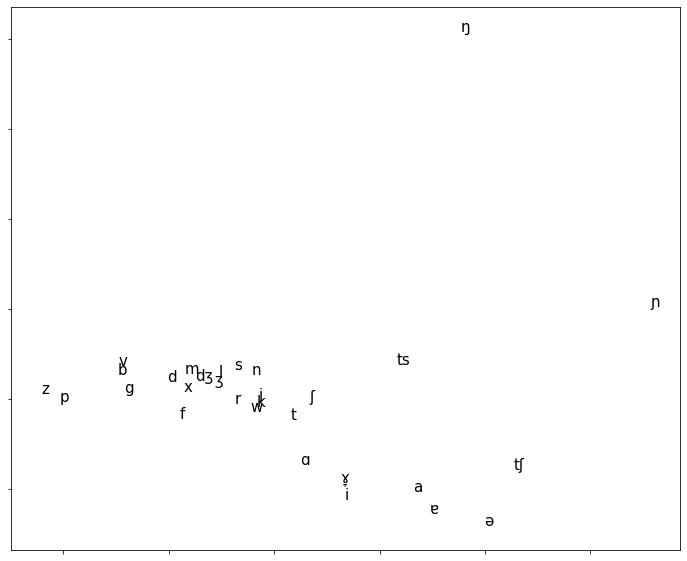

 - Creating tree using Neighbour joining, saving to .nw and .pdf


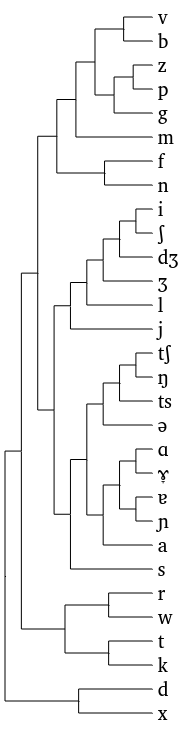

Embedding for pol:
 - Creating embedding for pol
 -- Using existing embedding file for pol
 - Create PCA plot for encoding embedding-pol-pca.


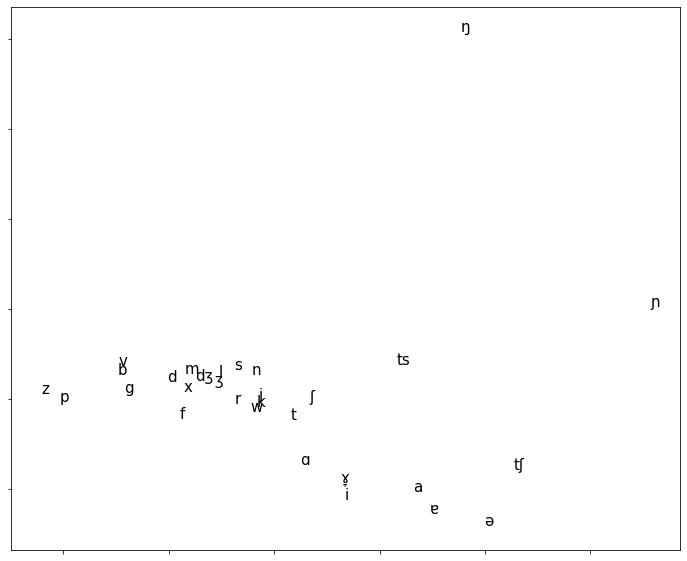

 - Creating tree using Neighbour joining, saving to .nw and .pdf


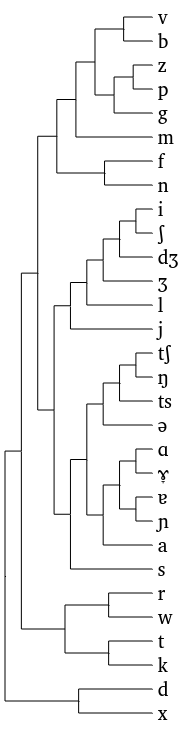

Embedding for pol:
 - Creating embedding for pol
 -- Using existing embedding file for pol
 - Create PCA plot for encoding embedding-pol-pca.


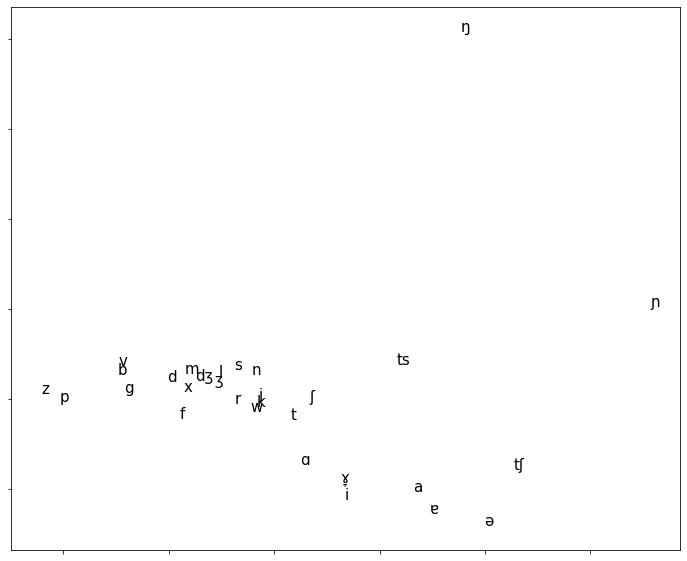

 - Creating tree using Neighbour joining, saving to .nw and .pdf


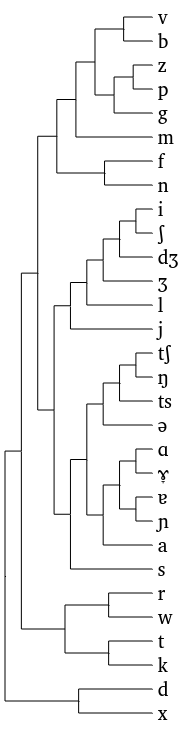

Embedding for pol:
 - Creating embedding for pol
 -- Using existing embedding file for pol
 - Create PCA plot for encoding embedding-pol-pca.


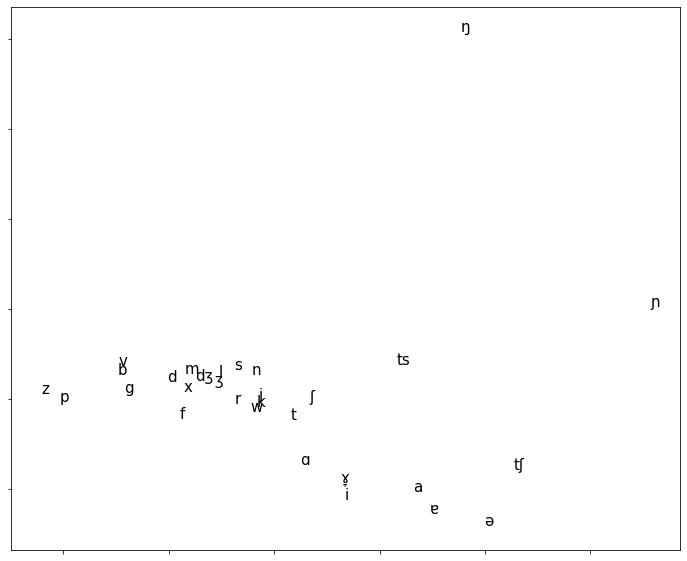

 - Creating tree using Neighbour joining, saving to .nw and .pdf


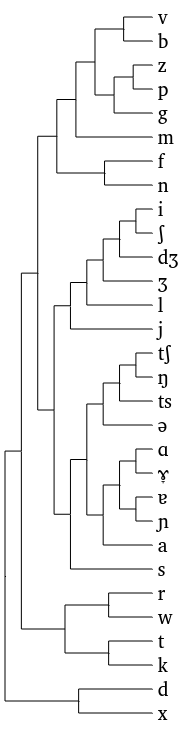

Embedding for slk:
 - Creating embedding for slk
 -- Using existing embedding file for slk
 - Create PCA plot for encoding embedding-slk-pca.


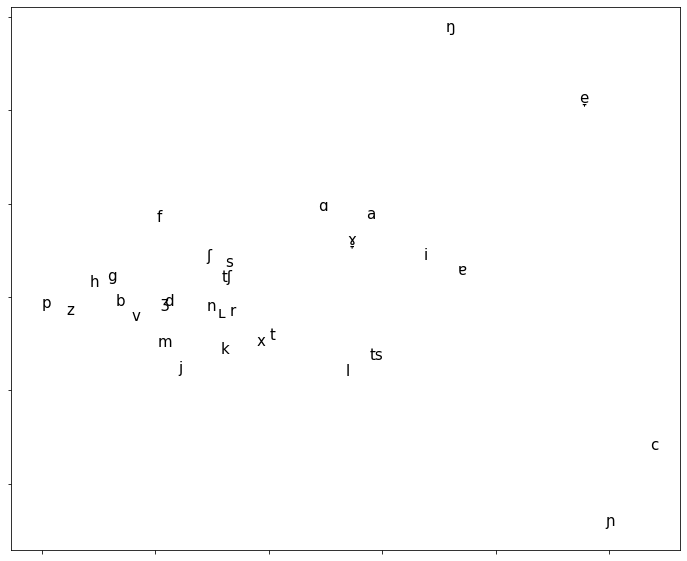

 - Creating tree using Neighbour joining, saving to .nw and .pdf


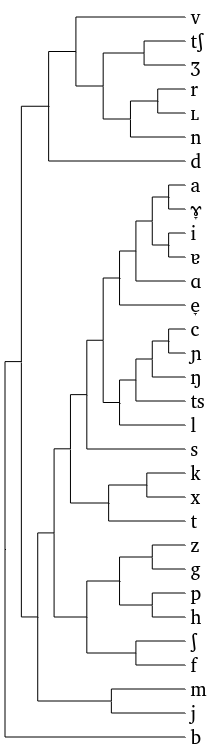

Embedding for slk:
 - Creating embedding for slk
 -- Using existing embedding file for slk
 - Create PCA plot for encoding embedding-slk-pca.


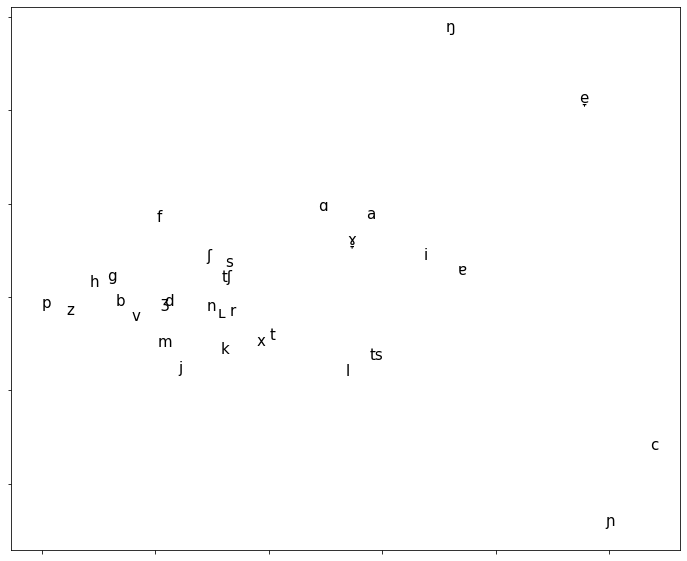

 - Creating tree using Neighbour joining, saving to .nw and .pdf


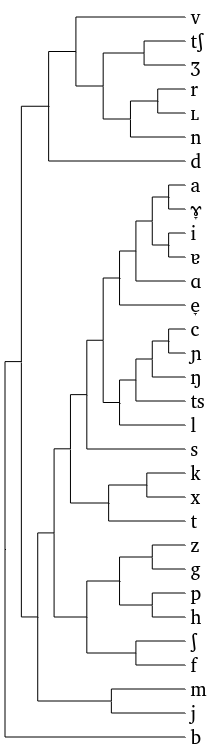

Embedding for slk:
 - Creating embedding for slk
 -- Using existing embedding file for slk
 - Create PCA plot for encoding embedding-slk-pca.


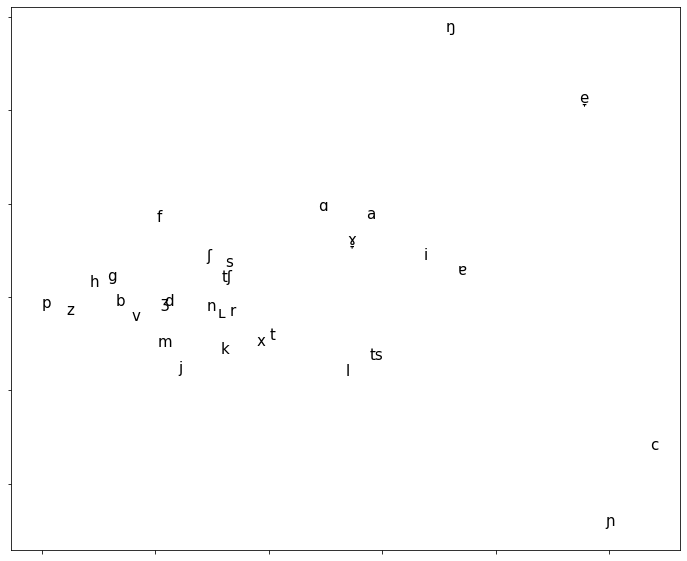

 - Creating tree using Neighbour joining, saving to .nw and .pdf


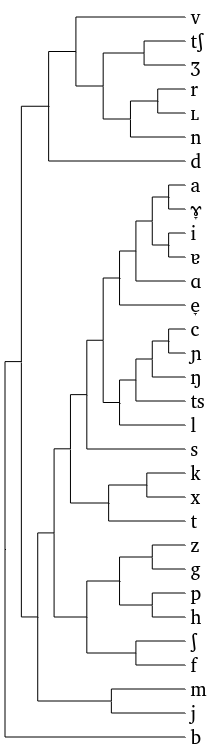

Embedding for slk:
 - Creating embedding for slk
 -- Using existing embedding file for slk
 - Create PCA plot for encoding embedding-slk-pca.


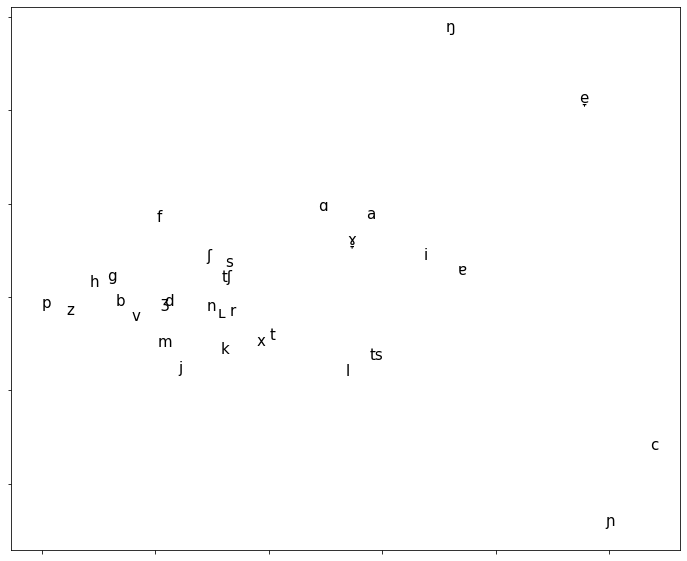

 - Creating tree using Neighbour joining, saving to .nw and .pdf


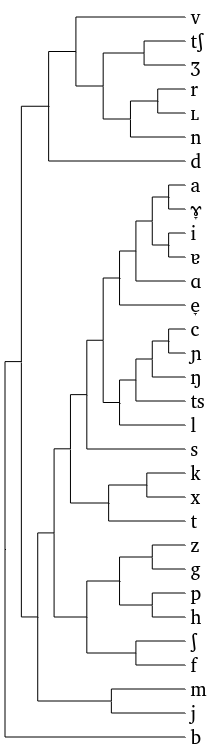

Embedding for slk:
 - Creating embedding for slk
 -- Using existing embedding file for slk
 - Create PCA plot for encoding embedding-slk-pca.


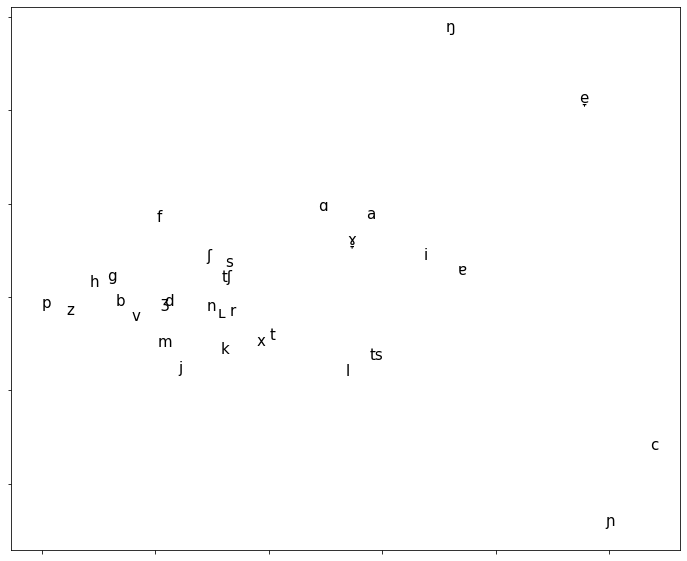

 - Creating tree using Neighbour joining, saving to .nw and .pdf


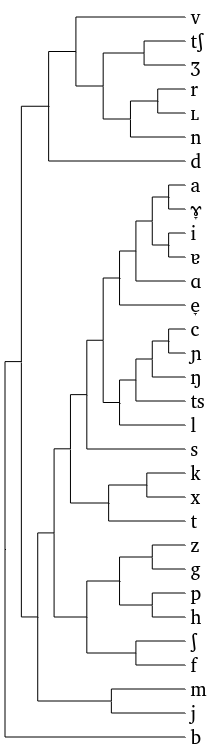

Embedding for slk:
 - Creating embedding for slk
 -- Using existing embedding file for slk
 - Create PCA plot for encoding embedding-slk-pca.


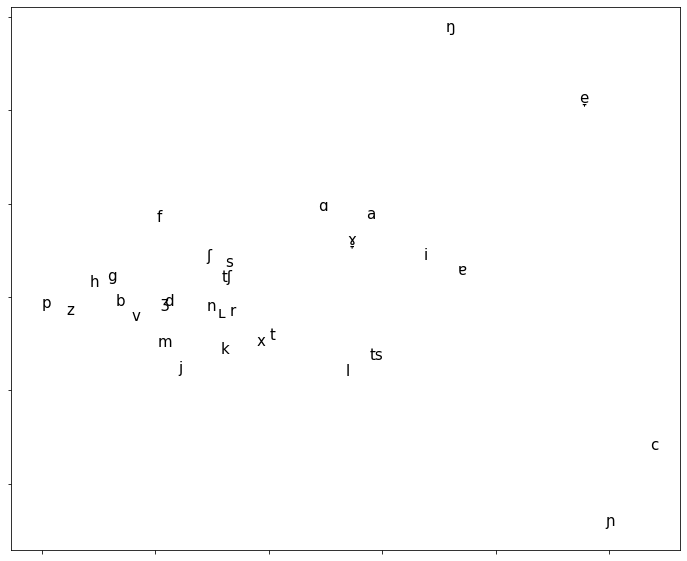

 - Creating tree using Neighbour joining, saving to .nw and .pdf


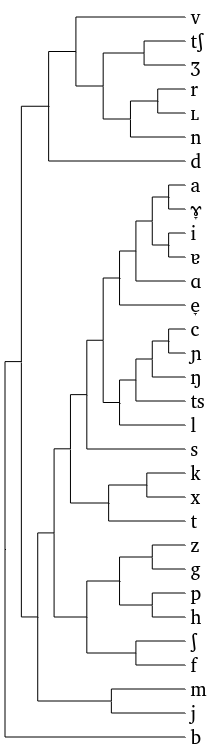

Embedding for slk:
 - Creating embedding for slk
 -- Using existing embedding file for slk
 - Create PCA plot for encoding embedding-slk-pca.


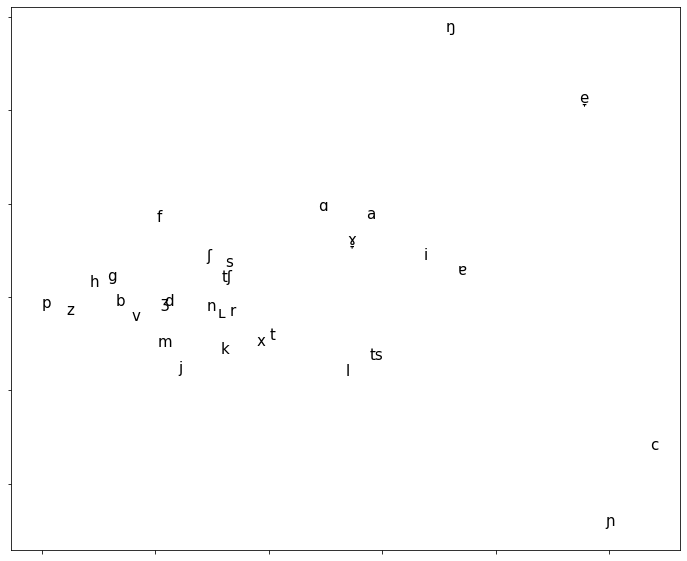

 - Creating tree using Neighbour joining, saving to .nw and .pdf


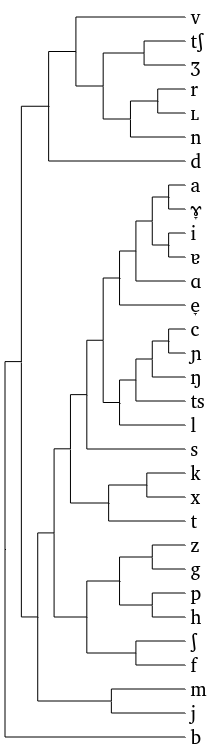

Embedding for slk:
 - Creating embedding for slk
 -- Using existing embedding file for slk
 - Create PCA plot for encoding embedding-slk-pca.


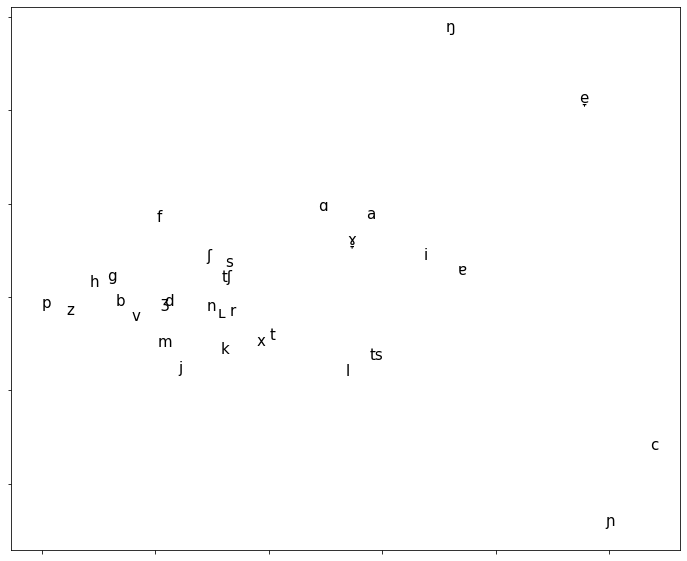

 - Creating tree using Neighbour joining, saving to .nw and .pdf


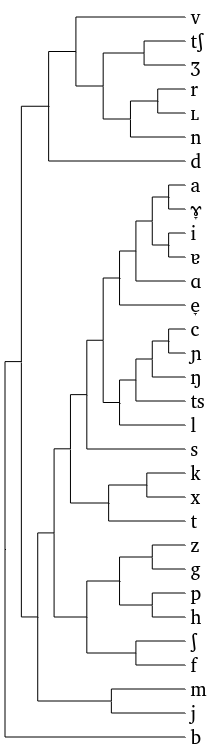

Embedding for slv:
 - Creating embedding for slv
 -- Using existing embedding file for slv
 - Create PCA plot for encoding embedding-slv-pca.


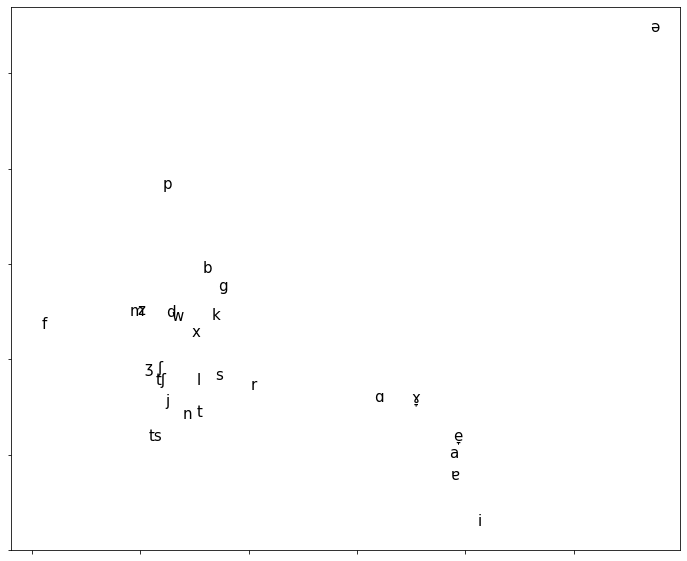

 - Creating tree using Neighbour joining, saving to .nw and .pdf


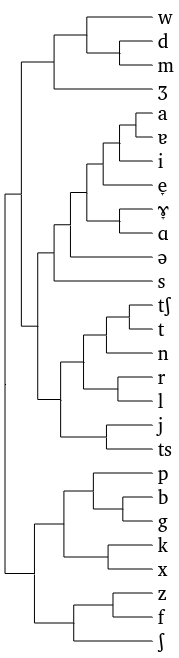

Embedding for slv:
 - Creating embedding for slv
 -- Using existing embedding file for slv
 - Create PCA plot for encoding embedding-slv-pca.


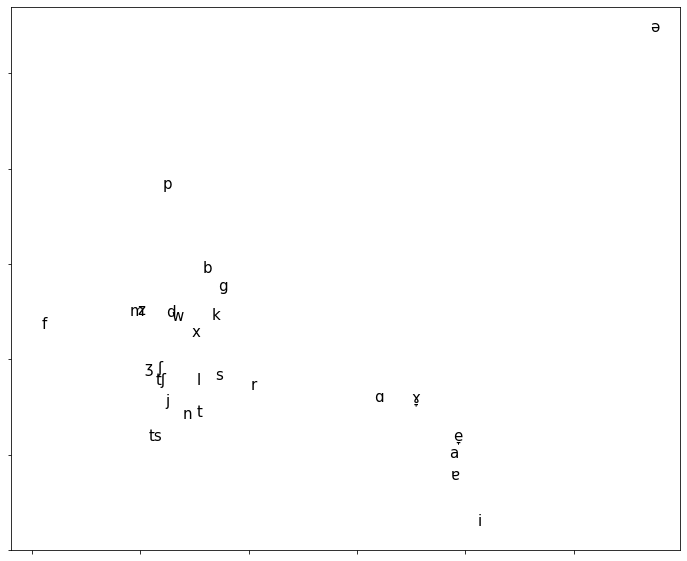

 - Creating tree using Neighbour joining, saving to .nw and .pdf


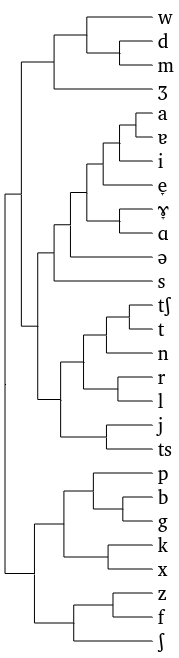

Embedding for slv:
 - Creating embedding for slv
 -- Using existing embedding file for slv
 - Create PCA plot for encoding embedding-slv-pca.


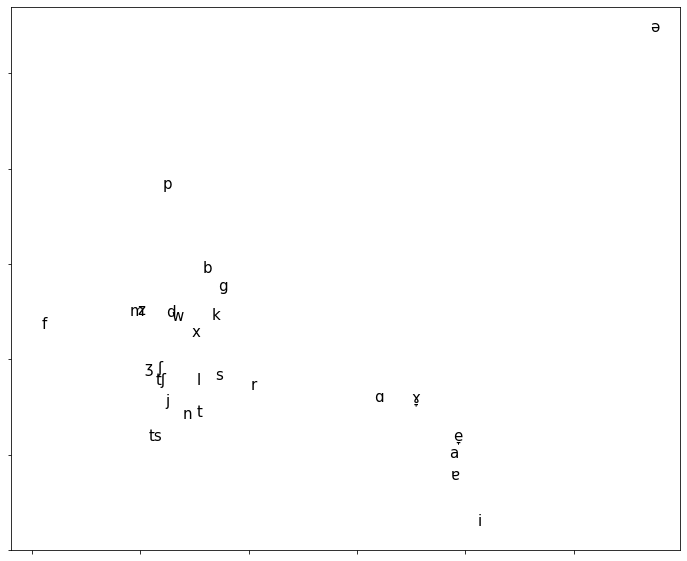

 - Creating tree using Neighbour joining, saving to .nw and .pdf


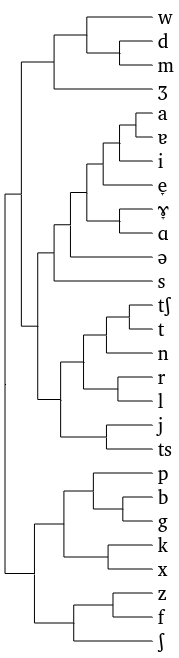

Embedding for slv:
 - Creating embedding for slv
 -- Using existing embedding file for slv
 - Create PCA plot for encoding embedding-slv-pca.


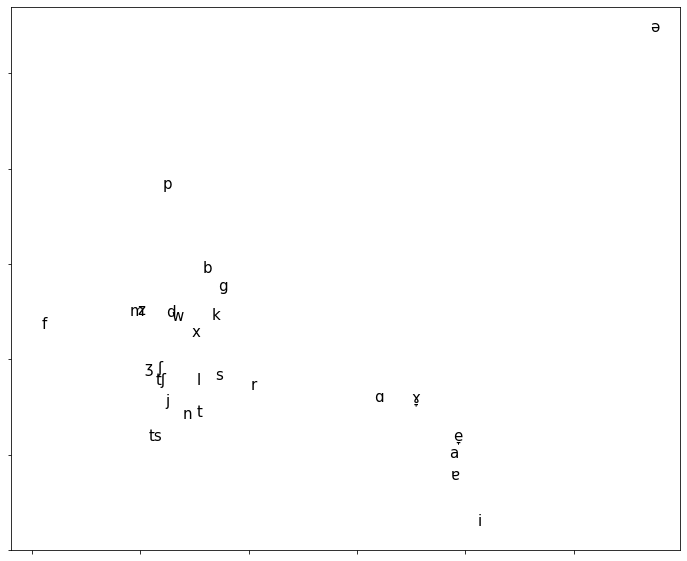

 - Creating tree using Neighbour joining, saving to .nw and .pdf


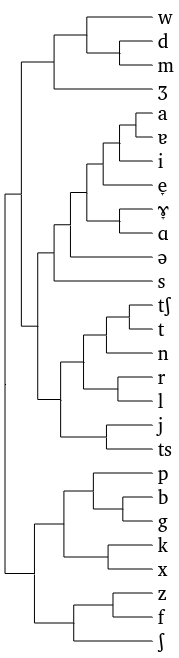

Embedding for slv:
 - Creating embedding for slv
 -- Using existing embedding file for slv
 - Create PCA plot for encoding embedding-slv-pca.


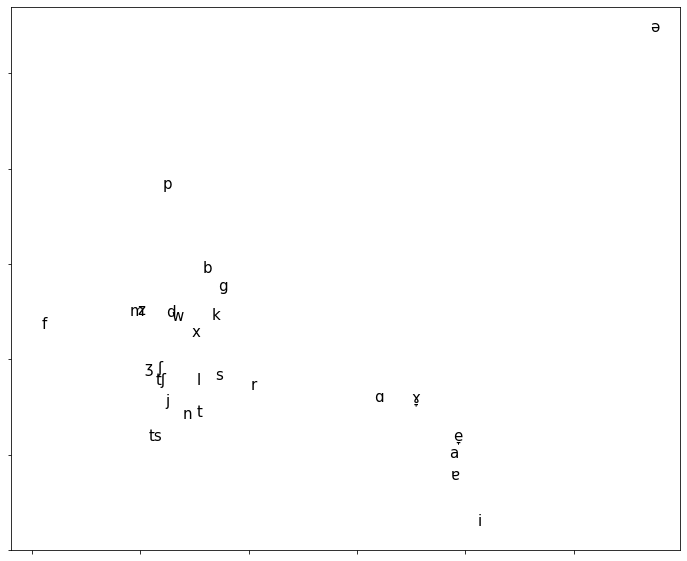

 - Creating tree using Neighbour joining, saving to .nw and .pdf


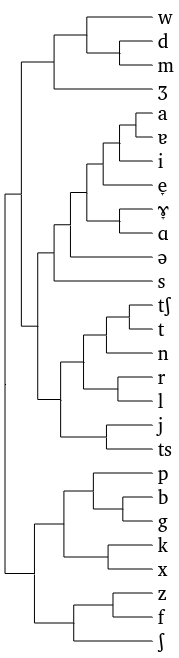

Embedding for slv:
 - Creating embedding for slv
 -- Using existing embedding file for slv
 - Create PCA plot for encoding embedding-slv-pca.


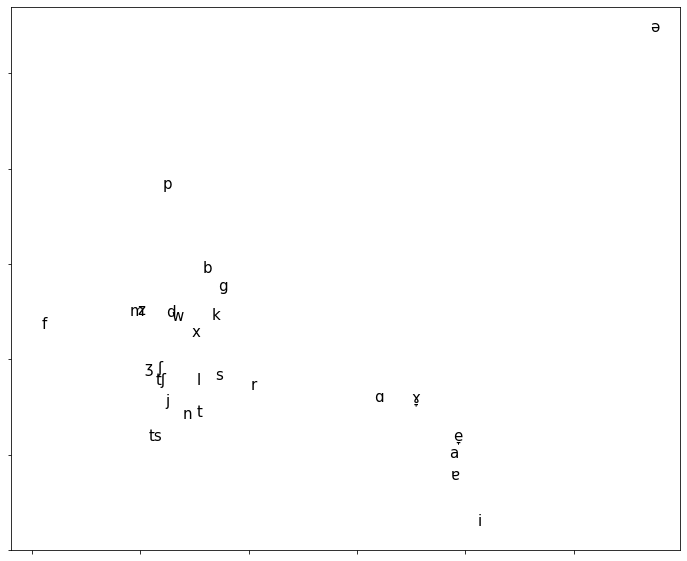

 - Creating tree using Neighbour joining, saving to .nw and .pdf


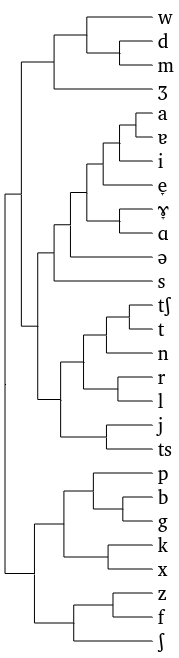

Embedding for slv:
 - Creating embedding for slv
 -- Using existing embedding file for slv
 - Create PCA plot for encoding embedding-slv-pca.


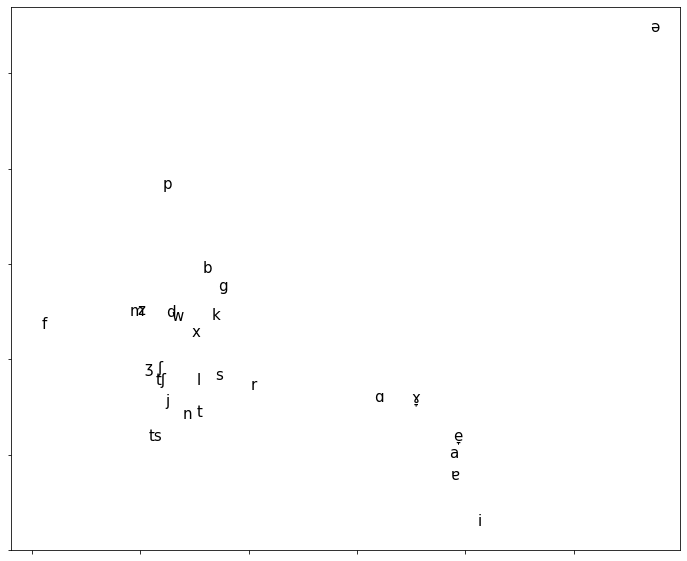

 - Creating tree using Neighbour joining, saving to .nw and .pdf


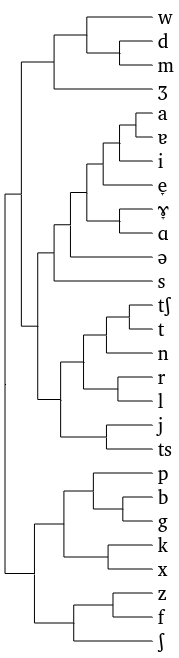

Embedding for slv:
 - Creating embedding for slv
 -- Using existing embedding file for slv
 - Create PCA plot for encoding embedding-slv-pca.


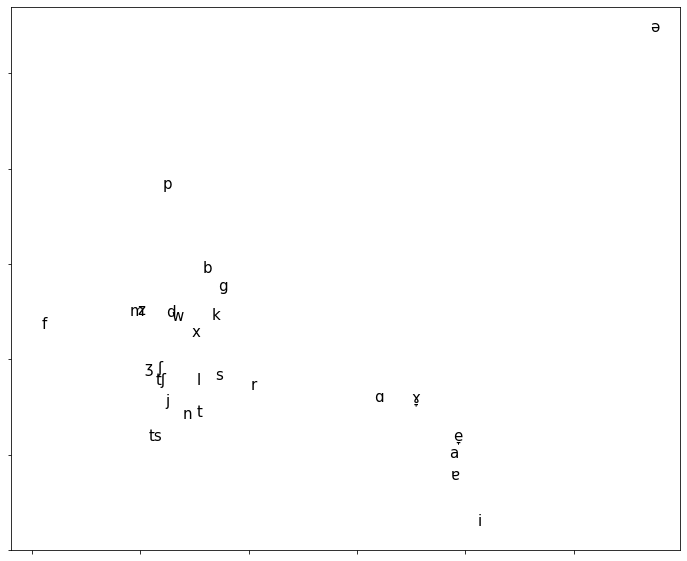

 - Creating tree using Neighbour joining, saving to .nw and .pdf


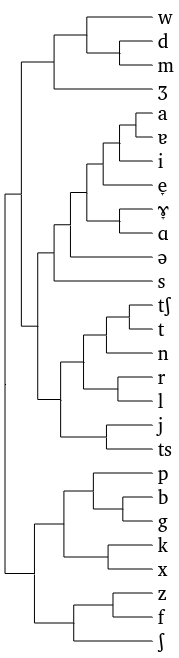

Embedding for hrv:
 - Creating embedding for hrv
 -- Using existing embedding file for hrv
 - Create PCA plot for encoding embedding-hrv-pca.


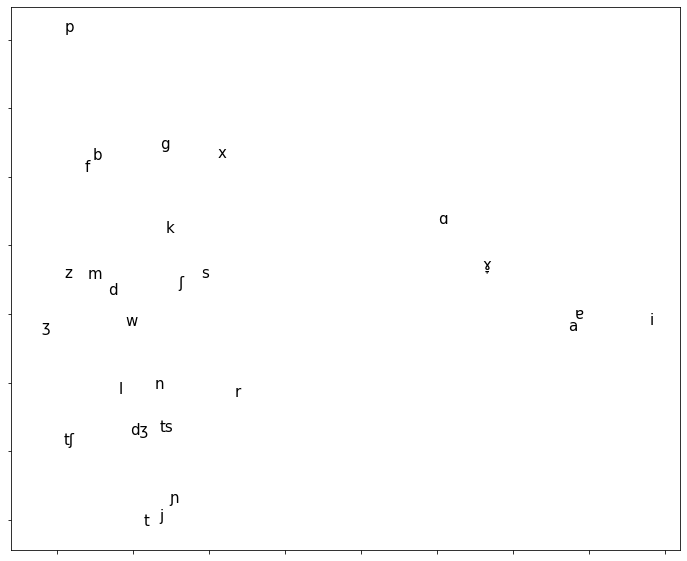

 - Creating tree using Neighbour joining, saving to .nw and .pdf


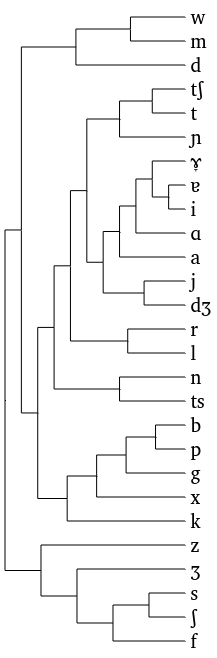

Embedding for hrv:
 - Creating embedding for hrv
 -- Using existing embedding file for hrv
 - Create PCA plot for encoding embedding-hrv-pca.


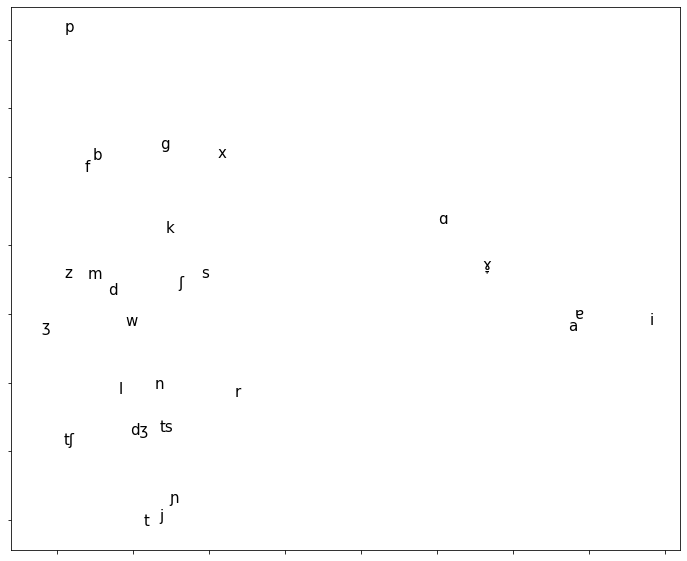

 - Creating tree using Neighbour joining, saving to .nw and .pdf


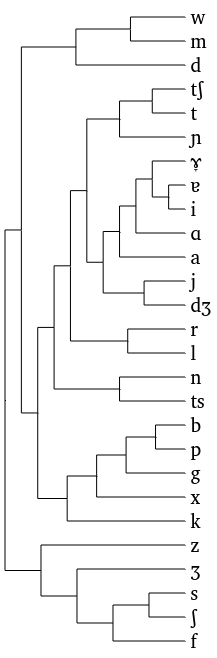

Embedding for hrv:
 - Creating embedding for hrv
 -- Using existing embedding file for hrv
 - Create PCA plot for encoding embedding-hrv-pca.


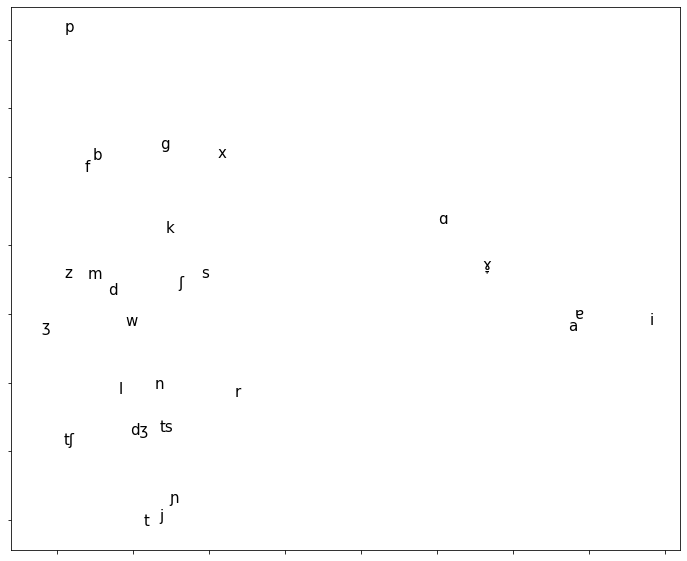

 - Creating tree using Neighbour joining, saving to .nw and .pdf


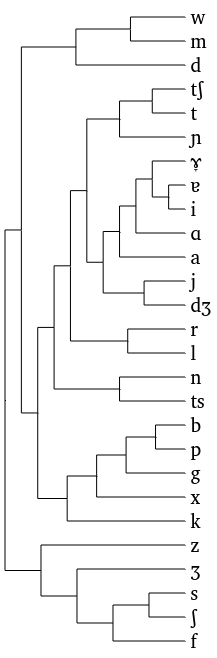

Embedding for hrv:
 - Creating embedding for hrv
 -- Using existing embedding file for hrv
 - Create PCA plot for encoding embedding-hrv-pca.


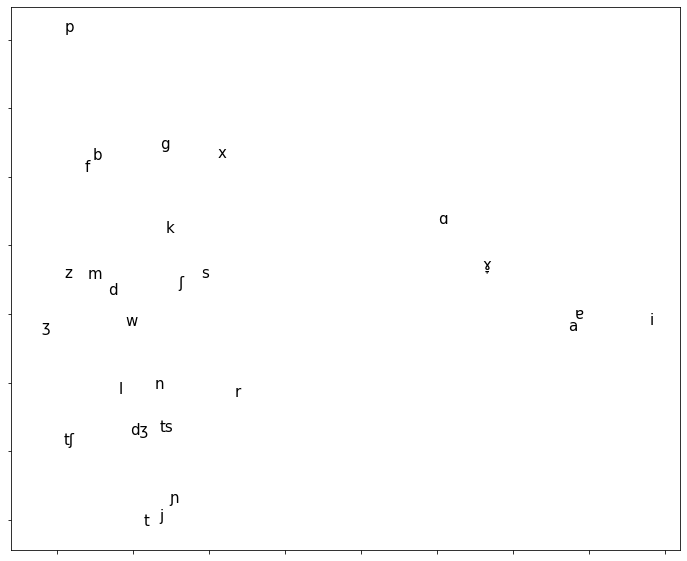

 - Creating tree using Neighbour joining, saving to .nw and .pdf


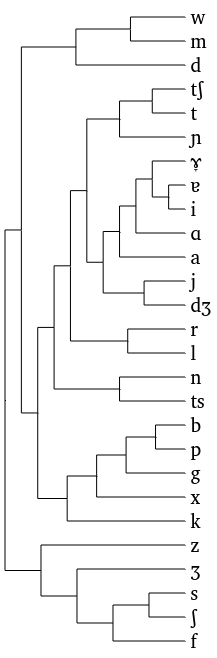

Embedding for hrv:
 - Creating embedding for hrv
 -- Using existing embedding file for hrv
 - Create PCA plot for encoding embedding-hrv-pca.


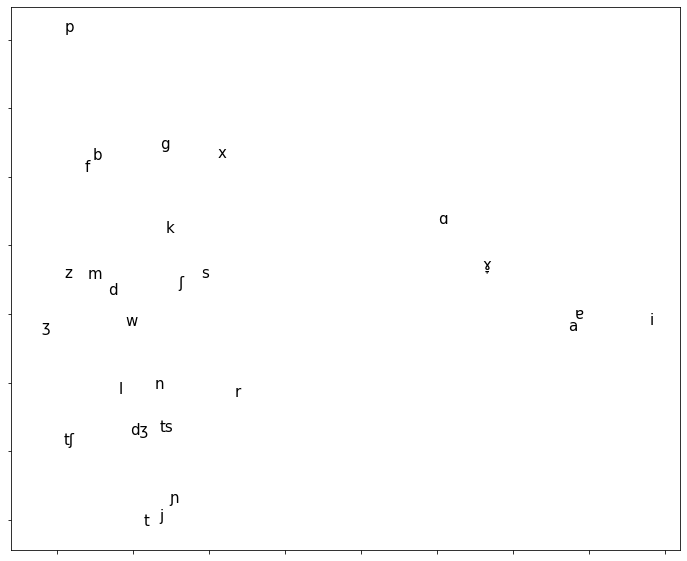

 - Creating tree using Neighbour joining, saving to .nw and .pdf


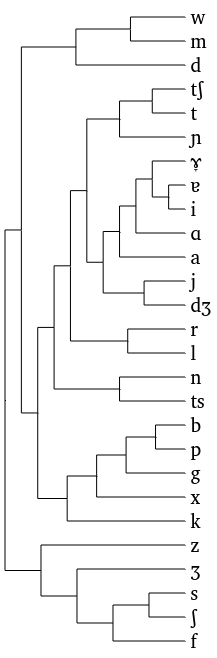

Embedding for hrv:
 - Creating embedding for hrv
 -- Using existing embedding file for hrv
 - Create PCA plot for encoding embedding-hrv-pca.


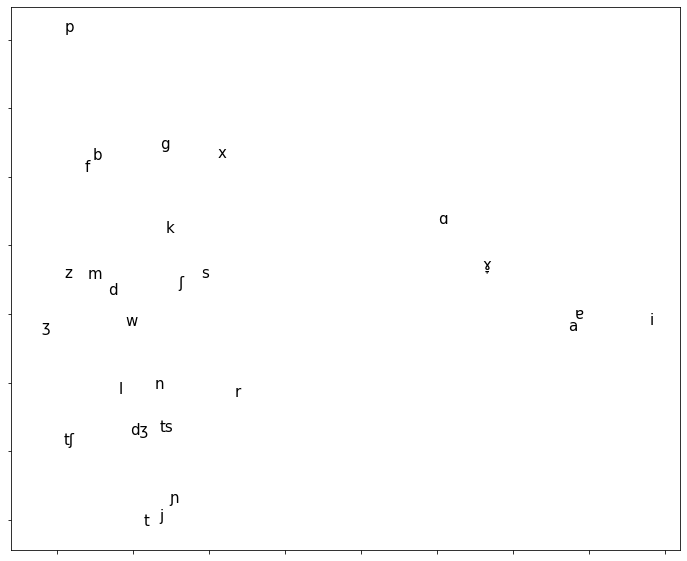

 - Creating tree using Neighbour joining, saving to .nw and .pdf


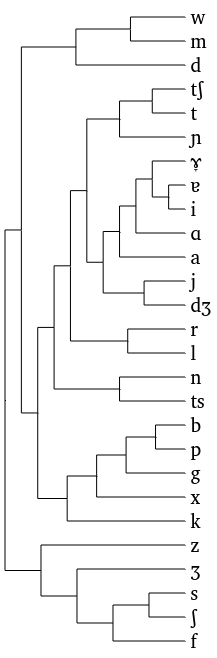

Embedding for hrv:
 - Creating embedding for hrv
 -- Using existing embedding file for hrv
 - Create PCA plot for encoding embedding-hrv-pca.


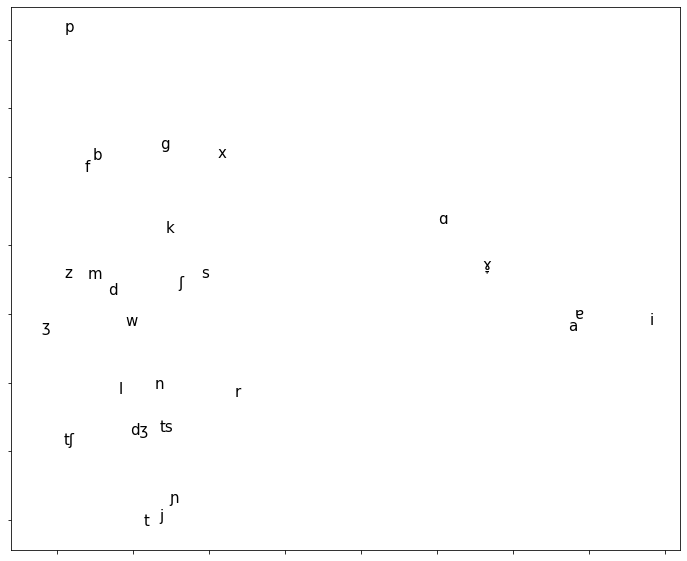

 - Creating tree using Neighbour joining, saving to .nw and .pdf


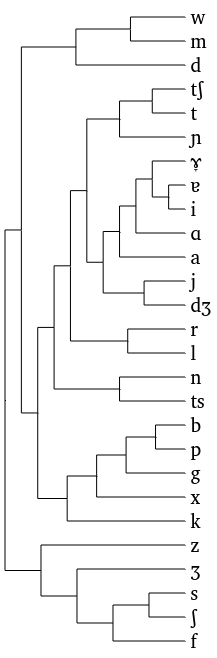

Embedding for hrv:
 - Creating embedding for hrv
 -- Using existing embedding file for hrv
 - Create PCA plot for encoding embedding-hrv-pca.


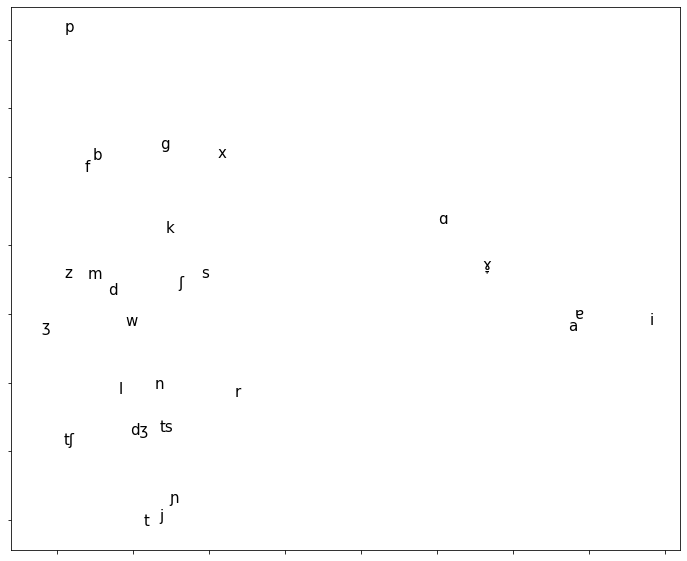

 - Creating tree using Neighbour joining, saving to .nw and .pdf


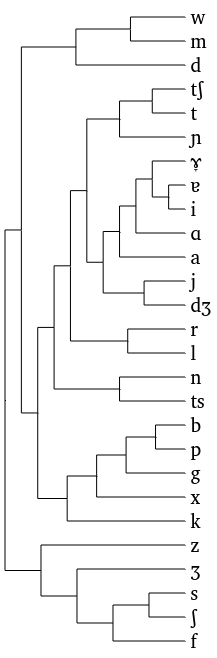

In [2]:
from dataset import data
from visualize import visualize
from tree import cluster
from util.asjp2ipa import asjp_to_ipa

tree_style = config["ete_tree_style"]

print("Phonetic matrix from Brown (2008):")
# Perform PCA on phonetic feature matrix from Brown (2008)
phon_matrix_red, phon_phonemes = visualize.dim_reduction(feature_matrix_phon)
# If enabled, convert ASJP phonemes to IPA for plot
if config["view_embedding_ipa"]:
    phon_phonemes = [asjp_to_ipa(p) for p in phon_phonemes]
# Visualize phonetic feature PCA using plot
visualize.visualize_encoding(phon_matrix_red, phon_phonemes, "phonetic-pca", config)
# Hierarchically cluster distances between phonemes in phonetic feature matrix
tree = cluster.cluster_phonemes_encoding(feature_matrix_phon, phon_phonemes, "phonetic", config)

display(tree.render("%%inline", tree_style=tree_style))

for lang_pair in lang_pairs:
    lang_a = lang_pair[0]
    print(f"Embedding for {lang_a}:")
    # Create embedding for every first language in language pair
    emb_matrix = data.create_embedding(lang_a, [output_path_cognates_train, output_path_cognates_valtest], config)
    # Perform PCA on embedding matrix
    emb_matrix_red, emb_phonemes = visualize.dim_reduction(emb_matrix)
    # If enabled, convert ASJP phonemes to IPA for plot
    if config["view_embedding_ipa"]:
        emb_phonemes = [asjp_to_ipa(p) for p in emb_phonemes]
    # Visualize embedding PCA using plot
    visualize.visualize_encoding(emb_matrix_red, emb_phonemes, f"embedding-{lang_pair[0]}-pca", config)
    
    # Hierarchically cluster distances between phonemes in embedding matrix
    tree = cluster.cluster_phonemes_encoding(emb_matrix, emb_phonemes, f"embedding-{lang_pair[0]}", config)
    display(tree.render("%%inline", tree_style=tree_style))
    

#### Close-up: constrast occurrences of phonemes in data
Interesting patterns in the phoneme encoding visualizations, can be looked up in the data. In the Dutch embedding encoding, we saw that *t* and *d*, closely related phonemes, are quite remote in the embedding space. How do the words with *t* and *d*, on which the embedding encoding is based, look in Dutch?

In [3]:

lang = "nld"
# Read in TSV file with data
df = pd.read_csv(output_path_cognates_train, sep="\t", engine="python", skipfooter=3, index_col=False)
df_lang = df[df["DOCULECT"] == lang]

for phoneme in ["d", "t"]:
    print(phoneme)
    words_with_phoneme = df_lang[df_lang["ASJP"].str.contains(phoneme)]
    total = len(words_with_phoneme)
    print(f"Total number of occurrences: {total}")
    
    # Compute locations of phonemes in word
    locations = df_lang["ASJP"].str.find(phoneme)
    locations = locations[locations != -1]
    # Compute relative frequencies
    locations_relfreq = locations.value_counts(normalize=True)
    print("Relative frequencies of locations:")
    print(locations_relfreq)
    # Look up words with most frequent location
    most_freq_location = int(locations.mode())
    words_in_most_freq_loc = words_with_phoneme[words_with_phoneme["ASJP"].str.find(phoneme) == most_freq_location]
    print(f"Words with {phoneme} where {phoneme} has most frequent location in word ({most_freq_location}):")
    print(words_in_most_freq_loc)
    print("")
    


d
Total number of occurrences: 206
Relative frequencies of locations:
0     0.300971
3     0.257282
2     0.169903
4     0.087379
5     0.058252
6     0.053398
7     0.038835
8     0.014563
1     0.014563
10    0.004854
Name: ASJP, dtype: float64
Words with d where d has most frequent location in word (0):
           ID DOCULECT GLOTTOCODE      CONCEPT WORD_FORM      RAWIPA  \
2089    59962      nld   dutc1256      Arzt::N    dokter      dɔktər   
7242    59849      nld   dutc1256      Dach::N       dak         dɑk   
7360    59923      nld   dutc1256     Decke::N     deken      ˈdeːkə   
7485    59871      nld   dutc1256    Deckel::N    deksel      dɛksəl   
7603    60020      nld   dutc1256  Dezember::N  december  deˑˈsɛmbər   
...       ...      ...        ...          ...       ...         ...   
108633  60339      nld   dutc1256   trinken::V   drinken      drɪnkə   
108746  60058      nld   dutc1256   trocken::A     droog       droːx   
108862  60299      nld   dutc1256  trocknen:




### Show number of cognates in training data
Show the number of cognate word pairs per language pair in the training data, and calculate cliques of languages with a minimum of 100 shared cognates. These cliques can later be used, to have a group of languages with a large shared number of cognates, to perform prediction on.

In [4]:
cog_per_lang, cliques = data.compute_n_cognates(lang_pairs, output_path_cognates_train, langs=languages, cognates_threshold=100, config=config)
print("Cognates per language: ")
print(cog_per_lang)
print("Cliques: ")
for c in cliques:
    print(c)

Calculate number of cognates per language...


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Calculate cliques...
Cognates per language: 
            Cognates
(ces, slk)       997
(slk, ces)       997
(bel, ukr)       907
(ukr, bel)       907
(bel, rus)       828
...              ...
(ukr, slv)       176
(bel, slv)       171
(slv, bel)       171
(rus, slv)       170
(slv, rus)       170

[72 rows x 1 columns]
Cliques: 
['hrv', 'ces', 'slv', 'slk', 'pol', 'ukr', 'bel', 'rus', 'bul']


## Pairwise word prediction
Choose a model to run to perform word prediction: structured perceptron or RNN encoder-decoder. Structured perceptron has the shortest run time. The results of the model run latest for a language pair are saved, and can be used for subsequent applications in the notebook (e.g. phylogenetic tree reconstruction).

### Word prediction using structured perceptron

In [5]:
from prediction import prediction

for lang_pair in lang_pairs:
    lang_a, lang_b = lang_pair
    print("Performing structured perceptron word prediction for pair (" + lang_a + ", " + lang_b + ")")
    prediction.word_prediction_seq(lang_a, lang_b, train[lang_pair], val[lang_pair], test[lang_pair], conversion_key[lang_pair], results_path[lang_pair], distances_path + ".txt", config)
        

Performing structured perceptron word prediction for pair (ces, bul)
Create SeqModel instance.
Train sequential model.
Training ...
Duration = 19.16
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zvEdnout             vdigna               zvEdnopa             0.62
posouvat             tikam                posoxva              1.00
yEhla                igLa                 dEgLa                0.40
misto                masto                mista                0.40
lini                 morzElif             lina                 0.88
sto                  sto                  sta                  0.33
nEhEt                nokot                sEga                 1.00
trupka               troba                trupka               0.50
bux                  bok                  bux                  0.67
zapadnout            zalaza               zapadnopa            0.56
plEcE                plESti               pLoya   

Duration = 16.76
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
ohE5                 agon                 agoy                 0.25
rukaf                rukaf                ruka                 0.20
CEkatna              aZ3dat               Cokatna              0.86
zmizEt               y3sCeznut            zmizat               0.78
bodnout              ukaLot               bodnaut              0.86
slovo                sLov3                sLov3                0.00
bliski               blizkiy              bL3sk3               0.71
kaSlat               kaSlit               kasLat               0.50
fxazEtsE             vxadit               vxazatst             0.50
bohati               bagat3y              borat3               0.43
sEbrat               sabrat               sibrat               0.17
zdrEda               srida                zdreda               0.50
rox                  rok                  rax 

Duration = 17.88
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zvolit               v3brac               zvolic               0.83
potpalit             zapalic              paspalic             0.25
zdribro              srEbra               zar3bra              0.43
spravni              praviln3             sprawn3              0.50
plinout              praxodzic            plinasc              0.78
pobrEZi              uzbarEZa             pabroZ3              0.62
briklopit            nakr3c               br3klopic            0.78
topitsE              tanuc                tapadza              0.71
pisEk                pasok                pistk                0.40
yErap                ZuravEl              vErka                0.86
smrt                 smErc                smEc                 0.20
zvyEtlo              svatlo               zvEstla              0.57
Ctiri                Cat3r3               st3r

Duration = 17.18
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
mrznout              mErznuti             mEznati              0.25
CEkatna              CEkati               CEkatna              0.29
zvEdnout             pidnati              zwErnati             0.50
klEsat               spadati              klEsti               0.71
plinout              proxoditi            plinati              0.67
napl5it              napowniti            naplati              0.44
komar                komar                komar                0.00
zmizEt               zniknuti             zmizat               0.62
yEzEro               ozEro                yazEro               0.33
sul                  sil                  sti                  0.67
zrno                 zErno                zrna                 0.40
drahi                dorohiy              drahi                0.43
kapka                krapla               krok

Duration = 18.32
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
oblak                obwok                obwak                0.20
drEvo                dZEvo                drovo                0.40
nahlE                naglE                nagw3                0.40
dva                  dva                  dva                  0.00
SEdivi               Sar3                 SEd3v3               0.67
ZElEzo               ZElazo               ZElEzo               0.17
rozhovor             rozmova              rozgovor             0.38
kamarat              kolEga               kamaraC              0.71
drast                tSoSC                draSC                0.60
lEtat                lataC                lEtaC                0.20
zElEni               ZElon3               zElEn3               0.33
pam5ET               pamiEnC              pamiEC               0.14
opTEZovat            dokuCaC              opiE

Duration = 19.48
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
maslo                masLo                masLo                0.00
podivatsEna          pozrieTsana          podivaTsEna          0.45
ciTit                5uxaT                citiT                0.80
matka                matka                matka                0.00
noviNka              noviNka              novieka              0.14
fstoupit             fstupiT              fstrupiT             0.12
pasEk                stuha                pasEk                1.00
batsE                baTsa                baTsa                0.00
kraCEt               kraCaT               kraCiT               0.17
policE               rEgaL                poLica               1.00
vlna                 vLna                 vLna                 0.00
CErni                Cierni               CErni                0.33
zamEk                zamka                zamE

Duration = 17.77
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
fSExno               wsE                  wsEgno               0.50
vElicE               zElo                 wElicE               0.67
zvyEtli              swEtEl               zayEtli              0.71
viuCovat             pouCEwati            wixCowat             0.56
zvyEt                swEt                 zwEti                0.40
tohlE                to                   togla                0.60
griCEt               kriCati              kriCEt               0.29
oblak                oblak                oblak                0.00
hrat                 igratisE             grat                 0.50
ya                   yaz                  ya                   0.33
h5it                 gniti                gnat                 0.40
kray                 kray                 kray                 0.00
vrana                wrana                wran

Duration = 19.10
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
vdigna               zvEdnout             vdihna               0.75
tikam                posouvat             dikat                0.75
igLa                 yEhla                zhla                 0.40
masto                misto                masto                0.20
morzElif             lini                 moraslof             1.00
sto                  sto                  sto                  0.00
nokot                nEhEt                nokot                0.60
troba                trupka               droba                0.67
bok                  bux                  bra                  0.67
zalaza               zapadnout            zalaza               0.67
ramo                 ramEno               ramo                 0.33
prikazka             pohatka              prikazat             0.75
oblEkasE             oblEkatsE            oblE

Duration = 17.45
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zaStita              z3Sitit              zaSExat              0.57
pribava              dabavit              pr3bava              0.71
praf                 prav3y               praf                 0.50
razmaxam             maxat                razmexat             0.50
igraya               y3grat               vgrat                0.33
masto                mest3                masto                0.40
vator                vetir                vator                0.40
xvana                sxvatit              xven3                0.71
CEtvortok            Citverk              Citvortok            0.33
nakodE               kuda                 nakodi               0.67
padna                spadat               padn3                0.50
suxoZiliE            suxaZ3liy3           suxoZiliy            0.30
soEdina              ab3y3dinit           skid

Duration = 18.32
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
rEzEn                skibka               razEn                1.00
svEta                svacic               svEtc                0.50
vinagi               zawsod3              v3naxi               1.00
kraCa                kroC3c               kraCa                0.50
son                  son                  sac                  0.67
yadEnE               yEZa                 yadzna               0.67
yama                 yama                 yama                 0.00
Lopata               lapata               lopatc               0.33
imE                  ima                  zma                  0.33
vortasE              varoCatca            vorSasc              0.56
umEL                 umEl3                umEl                 0.20
prECa                pEraSkadZac          prECa                0.73
glEdam               paxladzEc            xlEd

Duration = 18.53
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
pLosok               ploskiy              plosok               0.43
zop                  zub                  zna                  0.67
gLadok               hladEnkiy            hladuk               0.44
livada               luka                 lowada               0.67
yaycE                yaycE                krEca                0.80
SEstdEsEt            SyisdEsat            SEsodEsat            0.33
Ezik                 mowa                 wzik                 1.00
blEsta               bliSCati             blEsxa               0.62
pritEZavam           mati                 pratEZawat           0.80
zaStita              zaxistiti            zaSCixa              0.67
prEstana             pErEstati            pristina             0.56
figura               fihura               wahura               0.33
zaguba               zahubiti             zahu

Duration = 19.81
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
ZElazo               ZElazo               ZElaZE               0.33
yaycE                yayko                yayaC                0.40
strELa               stSawa               strowa               0.33
lEta                 lECEC                lEga                 0.60
nos                  nos                  naC                  0.67
zEma                 ZEmia                zEma                 0.40
trEva                trava                trova                0.20
sEstra               Sostra               SEstra               0.17
furaZka              Capka                varaska              0.57
tura                 posajiC              gura                 0.86
prodam               spSEdaC              prodaC               0.43
podarok              podarunEk            podarok              0.33
utrE                 yutro                utr3

Duration = 20.98
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
nof                  novi                 noL                  0.50
mEsEc                mEsiac               mEsEc                0.33
vdigna               zdvihnuT             udihna               0.50
igLa                 ihLa                 zhLa                 0.25
ti                   ti                   ti                   0.00
lEkar                LEkar                LEkaT                0.20
vorva                isT                  voriT                0.80
Lovariba             xitaTribi            Lovariba             0.56
sopruga              ZEna                 sopruha              0.86
ovca                 ofca                 oviT                 0.75
CovEk                CLovEk               CovEk                0.17
ta                   i                    ta                   1.00
buCa                 huCaT                buCa

Duration = 18.54
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
oko                  oko                  oko                  0.00
imE                  imE                  zmE                  0.33
grop                 grob                 grop                 0.25
star                 star                 star                 0.00
vECE                 ZE                   weCE                 0.75
skriya               skriti               skriya               0.33
osEmdEsEt            osEmdEsEt            osEmdEsEt            0.00
skriya               skriti               skriya               0.33
mola                 prositi              mola                 0.86
naprava              narEditi             naprawi              0.62
ti                   ti                   ti                   0.00
kriLo                krilo                krilo                0.00
vCEra                wCEray               oC3r

Duration = 16.79
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
agon                 ohE5                 rhli                 0.75
rukaf                rukaf                ruka                 0.20
aZ3dat               CEkatna              oZidat               0.86
y3sCeznut            zmizEt               yinCEznit            0.78
ukaLot               bodnout              ukalEt               0.86
sLov3                slovo                slovi                0.20
blizkiy              bliski               blizat               0.50
kaSlit               kaSlat               kovlit               0.50
vxadit               fxazEtsE             vzadit               0.75
bagat3y              bohati               brhat                0.33
sabrat               sEbrat               sobrat               0.17
srida                zdrEda               srida                0.50
rok                  rox                  rEk 

Duration = 17.11
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
z3Sitit              zaStita              ziSEta               0.43
dabavit              pribava              dobova               0.57
prav3y               praf                 prava                0.40
maxat                razmaxam             maxa                 0.50
y3grat               igraya               izgra                0.50
mest3                masto                mEsta                0.40
vetir                vator                vEtra                0.60
sxvatit              xvana                sxva                 0.60
Citverk              CEtvortok            CEtvEra              0.44
kuda                 nakodE               kuda                 0.67
spadat               padna                spoda                0.60
suxaZ3liy3           suxoZiliE            suxoZila             0.22
ab3y3dinit           soEdina              obiy

Duration = 15.48
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
sen3                 sEna                 sEn3                 0.25
vizat                vazac                vazac                0.00
pr3xadit             praxodzic            pr3xadac             0.44
Ladon                dalon                ladon                0.40
p3dnimatsi           padnimatca           padnamatci           0.20
osin                 vosEn                psin                 0.60
visoL3y              vasol3               vEsol3               0.17
gnat                 xnac                 xnac                 0.00
siniy                sini                 sini                 0.00
pridmet              pradmEt              pradmEc              0.14
sprasit              sp3tac               sprasic              0.57
zoL3t3               zolata               zol3c                0.50
atkr3t3y             adC3nEn3             stkr

Duration = 15.70
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zatem                zhodom               zatim                0.67
kruk                 kruk                 kruk                 0.00
p3Laskat             poloskati            poloskat             0.11
day3t                doyiti               diyat                0.50
t3siC3               tisaCa               tisECa               0.17
spina                spina                spina                0.00
pamit                pamyat               pomit                0.50
stat                 stati                stat                 0.20
dat                  dati                 dat                  0.25
sr3vat               zriwati              zrowat               0.29
piro                 pEro                 pEro                 0.00
vkusn3y              smaCniy              wkusniy              0.57
zakonCit             zakinCiti            zako

Duration = 16.62
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
figur3               figura               lEgur3               0.50
kuric3               kura                 kuroc3               0.50
sCitat               liC3C                sxmiaC               0.83
pLavitsi             topniEC              pwoviCSC             0.75
p3ymat               zwapaC               pr3maC               0.67
siln3y               Siln3                piln3                0.20
v3zvratitsi          vruCiC               v3zaroviCSC          0.64
korin                koZE5                koro5                0.40
mokr3y               mokr3                mukr3                0.20
razn3y               ruZn3                rozn3                0.40
sL3S3t               sw3SEC               swoS3C               0.33
za                   za                   za                   0.00
daZdit               padaC                daZj

Duration = 17.75
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
prasnutsi            zobudiTsa            prasnuTsT            0.78
stayat               staT                 stayaT               0.33
atrez3t              otkroyiT             strEziT              0.50
vnizu                doLu                 vnEza                1.00
skor3                skoro                skori                0.20
strilat              strielaT             strELaT              0.38
suda                 tadE                 suda                 0.75
sidet                sEdieT               sEdiT                0.17
spadat               kLEsaT               spodaT               0.67
S3stdisat            SEzCdEsiat           SistiesaT            0.70
zima                 zima                 zEma                 0.25
ras                  ras                  raT                  0.33
grom                 hrom                 hrEm

Duration = 15.92
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
napoLnit             napolniti            nopolati             0.33
kto                  kdo                  kto                  0.33
pLoskiy              plosk                ploski               0.17
maguCiy              moCan                moguCi               0.67
kriCat               kriCati              krECat               0.29
aZ3dat               priCakowati          oZedat               0.82
p3sadit              posaditi             posodri              0.38
zap3t                zapad                zapri                0.40
s3roy                surow                sxro                 0.40
zvanit               zwoniti              zwEnCi               0.43
dva                  dwa                  dwa                  0.00
daska                dEska                daska                0.20
star3y               star                 stor

Duration = 17.95
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
skibka               rEzEn                skizka               0.83
svacic               svEta                svoya                0.40
zawsod3              vinagi               zafusta              1.00
kroC3c               kraCa                kroSta               0.50
son                  son                  sta                  0.67
yEZa                 yadEnE               vEZa                 0.83
yama                 yama                 yama                 0.00
lapata               Lopata               Lopota               0.17
ima                  imE                  ima                  0.33
varoCatca            vortasE              voroCasta            0.44
umEl3                umEL                 umELa                0.20
pEraSkadZac          prECa                pErESkodZa           0.60
paxladzEc            glEdam               pogL

Duration = 15.92
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
sEna                 sen3                 sen3                 0.00
vazac                vizat                vazat                0.20
praxodzic            pr3xadit             pragodrit            0.44
dalon                Ladon                daLon                0.40
padnimatca           p3dnimatsi           padnimatst           0.20
vosEn                osin                 vosen                0.40
vasol3               visoL3y              vasoL3               0.29
xnac                 gnat                 gnat                 0.00
sini                 siniy                sini                 0.20
pradmEt              pridmet              pradmet              0.14
sp3tac               sprasit              sp3tat               0.57
zolata               zoL3t3               zoLat3               0.17
adC3nEn3             atkr3t3y             atCi

Duration = 16.21
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
laZac                lEZati               laZat                0.33
s3r3                 siriy                siri                 0.20
varowka              virowka              wErowka              0.29
suxaZ3lE             suxoZila             suhaZili             0.38
mod                  mEd                  mod                  0.33
kr3Cac               kriCati              kriCat               0.14
pr3ysci              priyti               priyati              0.14
suSa                 suSa                 suSa                 0.00
inEy                 yiniy                zniy                 0.40
darma                darma                dErma                0.20
drawnina             drowa                drownina             0.38
liC3c                liCiti               liCit                0.17
nalic                naliti               nali

Performing structured perceptron word prediction for pair (bel, pol)
Create SeqModel instance.
Train sequential model.
Training ...
Duration = 17.20
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zxubic               zgubiC               zgubiC               0.00
srEbra               srEbro               Srobra               0.50
lapatka              wopata               lapotka              0.57
ZuravEl              Zurav                Surovil              0.57
razdzalic            pojEliC              rozazaliC            0.56
kropla               kropla               kropwa               0.17
son                  sEn                  so5                  0.67
liniya               linia                liniya               0.17
kapac                kopaC                kapaC                0.20
zayac                zayonc               zayaC                0.50
baC3c                zobaC3C              baC3C   

Duration = 19.10
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
vuxa                 uxo                  vuxa                 0.50
inEy                 inovaT               kniT                 0.67
padzEsat             pECdEsiat            podvEsaT             0.56
visEc                visieT               visiT                0.17
kroC3c               kraCaT               kroCiT               0.33
xranica              hranica              hrEniT               0.43
padxanac             popudiT              podLEnaT             0.62
caZki                TaSki                saZiT                0.80
navina               noviNka              novina               0.29
r3savac              krEsLiT              risavaT              0.71
pr3b3c               doraziT              pribiT               0.57
uxaru                horE                 uxieT                1.00
zab3c                zabudnuT             zabi

Duration = 16.44
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zxnisci              zgniti               zgnisti              0.14
maxutn3              moCan                moguti               0.67
v3                   wi                   wi                   0.00
nakr3wka             pokrow               nak3rEka             0.75
znac                 znati                znat                 0.20
Sto                  kay                  Sto                  1.00
Sastac               SElEstEti            Sastri               0.56
sani                 sani                 sEni                 0.25
plaCo                pleCE                plaCa                0.40
slap3                slEp                 slapi                0.40
xavar3c              goworiti             gaw3rwi              0.50
xluxi                glux                 gluSi                0.40
xuCac                zwEnEti              guCa

Duration = 17.51
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
mErznuti             mrznout              mErznit              0.43
CEkati               CEkatna              CEkat                0.29
pidnati              zvEdnout             pidnat               0.62
spadati              klEsat               spadat               0.67
proxoditi            plinout              proxodit             0.62
napowniti            napl5it              napovnit             0.38
komar                komar                komat                0.20
zniknuti             zmizEt               zniknit              0.57
ozEro                yEzEro               ozdro                0.50
sil                  sul                  sEl                  0.33
zErno                zrno                 zdrno                0.20
dorohiy              drahi                dorox                0.80
krapla               kapka                krap

Duration = 18.47
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
ploskiy              pLosok               pLoska               0.33
zub                  zop                  zda                  0.67
hladEnkiy            gLadok               gLadEna              0.43
luka                 livada               luka                 0.67
yaycE                yaycE                yancE                0.20
SyisdEsat            SEstdEsEt            iyastEsra            0.67
mowa                 Ezik                 mova                 1.00
bliSCati             blEsta               blEStra              0.29
mati                 pritEZavam           ma                   0.90
zaxistiti            zaStita              zaxist               0.57
pErEstati            prEstana             pErostra             0.50
fihura               figura               vEgora               0.50
zahubiti             zaguba               zago

Duration = 15.72
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zhodom               zatem                zgadom               0.50
kruk                 kruk                 kruk                 0.00
poloskati            p3Laskat             poLaskat             0.12
doyiti               day3t                doy3t                0.20
tisaCa               t3siC3               tisat                0.67
spina                spina                spin3                0.20
pamyat               pamit                pamnat               0.33
stati                stat                 stat                 0.00
dati                 dat                  dat                  0.00
zriwati              sr3vat               zrovat               0.33
pEro                 piro                 pir3                 0.25
smaCniy              vkusn3y              smaCn3y              0.57
zakinCiti            zakonCit             zaki

Duration = 16.19
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
lEZati               laZac                lEZac                0.20
siriy                s3r3                 str3                 0.25
virowka              varowka              vErowka              0.14
suxoZila             suxaZ3lE             suxoZ3la             0.25
mEd                  mod                  mad                  0.33
kriCati              kr3Cac               kraCac               0.17
priyti               pr3ysci              pr3                  0.57
suSa                 suSa                 suSa                 0.00
yiniy                inEy                 yEn3                 1.00
darma                darma                darma                0.00
zhotowiti            zxatavac             zxacavic             0.25
drowa                drawnina             drava                0.50
liCiti               liC3c                liC3

Duration = 17.59
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zahubiti             zgubiC               zagubiC              0.14
lito                 lato                 liC                  0.75
pina                 piana                pina                 0.20
ZurawEl              Zurav                muraviC              0.43
pirnati              zanuZaCSE            piEnaC               0.78
ptax                 ptak                 piEx                 0.75
rozum                rozum                rozna                0.40
svitlo               Sfiatwo              SfiEwo               0.29
sisti                uSoSC                stSC                 0.60
hrati                graC                 graC                 0.00
dobriy               dobr3                drbr3                0.20
dE                   gjE                  dE                   0.67
Siya                 S3ya                 SC  

Duration = 18.87
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
smaZiti              praZiT               smaZiT               0.33
kray                 kray                 kra                  0.25
dati                 daT                  daT                  0.00
piC                  pEc                  piT                  0.67
Cuti                 poCuvaT              CiT                  0.71
rizati               strihaT              rizaT                0.43
sowok                Lopata               sovok                0.83
vidro                vEdro                vEdra                0.20
vidrazu              zarovE5              vEdraza              1.00
koliwatisa           koLisaT              koLiestiT            0.33
nEdila               nEdEla               nEdELa               0.17
baCiti               vidieT               baCiT                0.67
piymati              uLoviT               prEm

Duration = 16.82
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
kolino               kolEno               kolEno               0.00
znati                znati                znati                0.00
Comu                 zakay                Coma                 0.80
kin                  kon                  kEn                  0.33
rizniy               razliCEn             rEzni                0.62
zaxid                zapad                zaxod                0.40
pokriti              pokriti              pokrEti              0.14
yiskra               iskra                yiskra               0.17
kinCitisa            konCatisE            krECatisa            0.33
sto                  sto                  sti                  0.33
krow                 kri                  krow                 0.50
zakinCiti            dokonCati            zakrECati            0.44
ploskiy              plosk                plos

Duration = 18.24
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
dZEvo                drEvo                drEvo                0.00
naglE                nahlE                nahlE                0.00
dva                  dva                  dva                  0.00
Sar3                 SEdivi               Spri                 0.67
ZElazo               ZElEzo               ZElazo               0.17
rozmova              rozhovor             rozmova              0.38
kolEga               kamarat              kolEha               0.71
tSoSC                drast                trost                0.40
lataC                lEtat                latat                0.20
ZElon3               zElEni               ZEloni               0.33
pamiEnC              pam5ET               pam5Ena              0.29
dokuCaC              opTEZovat            dokuCat              0.78
tononC               topitsE              tono

Duration = 19.17
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
ZElazo               ZElazo               ZElaza               0.17
yayko                yaycE                yayka                0.40
stSawa               strELa               straLa               0.17
nos                  nos                  not                  0.33
ZEmia                zEma                 Zamra                0.60
trava                trEva                trava                0.20
Sostra               sEstra               sostra               0.17
Capka                furaZka              Capka                0.57
posajiC              tura                 postda               0.83
spSEdaC              prodam               sprEda               0.50
podarunEk            podarok              podaruCEk            0.33
yutro                utrE                 yutra                0.40
ulEpS3C              podobra              glEy

Duration = 16.44
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
figura               figur3               vigrat               0.67
kura                 kuric3               kuS3                 0.50
liC3C                sCitat               lit3                 0.67
topniEC              pLavitsi             kapnit               0.75
zwapaC               p3ymat               sLapat               0.67
Siln3                siln3y               siln3                0.17
vruCiC               v3zvratitsi          vruCit               0.64
koZE5                korin                kaZ3                 0.80
mokr3                mokr3y               mokr3                0.17
ruZn3                razn3y               ruZn3                0.50
sw3SEC               sL3S3t               sL3sit               0.33
za                   za                   st                   1.00
padaC                daZdit               pada

Duration = 17.16
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zgubiC               zxubic               zxubic               0.00
srEbro               srEbra               svEbra               0.17
wopata               lapatka              lapata               0.14
Zurav                ZuravEl              Zorac                0.57
pojEliC              razdzalic            padolic              0.44
kropla               kropla               krapla               0.17
sEn                  son                  sEn                  0.33
linia                liniya               linic                0.33
kopaC                kapac                kapac                0.00
zayonc               zayac                zayona               0.50
zobaC3C              baC3c                zabaC3c              0.29
vEzEw                vuzEl                vEzEl                0.20
prubovaC             prabavac             prub

Duration = 17.22
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zgubiC               zahubiti             zhubri               0.38
lato                 lito                 lati                 0.50
piana                pina                 pidna                0.20
Zurav                ZurawEl              rurti                0.71
zanuZaCSE            pirnati              zanuZati             0.62
ptak                 ptax                 prak                 0.50
rozum                rozum                rozum                0.00
Sfiatwo              svitlo               svistlo              0.14
uSoSC                sisti                usoSi                0.80
graC                 hrati                hrat                 0.20
dobr3                dobriy               dobri                0.17
gjE                  dE                   hi                   1.00
S3ya                 Siya                 siya

Duration = 19.44
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
pEnjiC               huCaT                pEnieT               0.83
gniazdo              hniezdo              hniazdo              0.14
sw3n3                sLavni               sLini                0.33
gZ3p                 hrip                 hria                 0.25
podniESC             zdvihnuT             podniesT             0.75
novina               noviNka              novEna               0.43
wokiEC               LakET                LNkieT               0.50
obroCiC              obratiT              obroCiT              0.29
oxroniC              xraniT               oxroniT              0.29
zaproSiC             pozvaT               zaprosiT             0.75
woviCr3b3            xitaTribi            LoviTribi            0.44
piontEk              piatok               pieftEk              0.43
pSExov3vaC           usxovaT              prEx

Duration = 17.60
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
vwaca                nasilE               wlaCa                1.00
kipiEC               kipEti               kup3ri               0.50
zasnonC              zaspati              zasnoni              0.43
Sfinia               swina                spEnka               0.50
pot                  pod                  pod                  0.00
drZEC                drgEtati             drEdi                0.50
zgniC                zgniti               zgati                0.33
m3                   mi                   mi                   0.00
ptak                 ptica                plak                 0.80
zako5C3C             dokonCati            zakoneCi             0.56
plosaC               plEsati              plosti               0.29
pomoc                pomoC                pomok                0.20
maswo                maslo                masl

Duration = 20.40
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
novi                 nof                  novi                 0.50
mEsiac               mEsEc                mEsiza               0.50
zdvihnuT             vdigna               zdvigna              0.29
ihLa                 igLa                 igLa                 0.00
ti                   ti                   ta                   0.50
LEkar                lEkar                lEkra                0.40
isT                  vorva                iza                  0.80
xitaTribi            Lovariba             xituvraba            0.67
ZEna                 sopruga              ZEna                 0.86
ofca                 ovca                 oyca                 0.25
CLovEk               CovEk                vLovEk               0.33
i                    ta                   n                    1.00
huCaT                buCa                 guCa

Duration = 17.96
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zobudiTsa            prasnutsi            zabud3tst            0.78
staT                 stayat               stat                 0.33
otkroyiT             atrez3t              pikroyat             0.75
doLu                 vnizu                doL3                 1.00
skoro                skor3                skor3                0.00
strielaT             strilat              str3t                0.43
tadE                 suda                 tadi                 0.75
sEdieT               sidet                sed3t                0.40
kLEsaT               spadat               kLosat               0.67
SEzCdEsiat           S3stdisat            SozidesLat           0.50
zima                 zima                 z3ma                 0.25
ras                  ras                  rat                  0.33
hrom                 grom                 gram

Duration = 18.75
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
uxo                  vuxa                 uxa                  0.25
inovaT               inEy                 inavac               0.67
pECdEsiat            padzEsat             pEZdEskac            0.56
visieT               visEc                visisc               0.33
kraCaT               kroC3c               kraCac               0.33
hranica              xranica              xraniZa              0.14
popudiT              padxanac             papad3c              0.50
TaSki                caZki                paSki                0.40
noviNka              navina               navinka              0.14
krEsLiT              r3savac              krEslic              0.71
doraziT              pr3b3c               dorazic              0.71
horE                 uxaru                xora                 0.60
zabudnuT             zab3c                zabu

Duration = 18.62
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
praZiT               smaZiti              praZka               0.71
kray                 kray                 kriy                 0.25
daT                  dati                 dat                  0.25
pEc                  piC                  pEc                  0.67
poCuvaT              Cuti                 poCuwat              0.71
strihaT              rizati               strihat              0.57
Lopata               sowok                lopati               0.83
vEdro                vidro                wEdro                0.40
zarovE5              vidrazu              zarowy               0.86
koLisaT              koliwatisa           kolisat              0.40
nEdEla               nEdila               nEdEla               0.17
vidieT               baCiti               vidati               0.67
uLoviT               piymati              wlow

Duration = 19.26
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
huCaT                pEnjiC               gukaC                0.83
hniezdo              gniazdo              gniEzdo              0.14
sLavni               sw3n3                swovn3               0.33
hrip                 gZ3p                 gZ3m                 0.25
zdvihnuT             podniESC             zdvignuC             0.75
noviNka              novina               nov3Nka              0.43
LakET                wokiEC               lakiC                0.50
obratiT              obroCiC              obrat3C              0.43
xraniT               oxroniC              kroniC               0.29
pozvaT               zaproSiC             pozvaC               0.75
xitaTribi            woviCr3b3            x3taCS3b3            0.56
piatok               piontEk              pistok               0.43
usxovaT              pSExov3vaC           usxo

Duration = 19.34
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
ya                   yaz                  ya                   0.33
boLieT               bolEti               bolati               0.17
zdravie              zdrawyE              zdrawEk              0.29
otkroyiT             odrEzati             oskroyti             0.62
kriCaT               kriCati              kriCat               0.14
LabuT                labod                labri                0.40
pLoxi                plan                 ploxi                0.60
mEso                 mEso                 mEso                 0.00
ostrieS              ostriZ               ostrEko              0.43
skriT                skriti               sk3ri                0.50
smrT                 sm3rt                smri                 0.40
opraviT              poprawiti            oprawCi              0.33
SumieT               SuStEti              Suma

Duration = 18.39
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
wsE                  fSExno               fsE                  0.67
zElo                 vElicE               zdlo                 0.83
swEtEl               zvyEtli              dvEtsl               0.57
pouCEwati            viuCovat             pouCEvat             0.38
swEt                 zvyEt                dvEt                 0.40
to                   tohlE                to                   0.60
kriCati              griCEt               kriCat               0.33
oblak                oblak                oulEk                0.40
igratisE             hrat                 zhratusE             0.50
yaz                  ya                   yit                  0.67
gniti                h5it                 hnit                 0.25
kray                 kray                 kray                 0.00
wrana                vrana                vran

Duration = 17.24
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
zgniti               zxnisci              zxnic                0.29
moCan                maxutn3              muCac                0.71
wi                   v3                   vi                   0.50
pokrow               nakr3wka             pokrac               0.75
znati                znac                 znac                 0.00
kay                  Sto                  kra                  1.00
SElEstEti            Sastac               SElEscEc             0.62
sani                 sani                 sac                  0.50
pleCE                plaCo                ploCa                0.40
slEp                 slap3                slka                 0.60
goworiti             xavar3c              xovor3c              0.29
glux                 xluxi                xlux                 0.20
zwEnEti              xuCac                zvEn

Duration = 19.66
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
yaz                  ya                   yaT                  0.33
bolEti               boLieT               boLiT                0.17
zdrawyE              zdravie              zdraviT              0.14
odrEzati             otkroyiT             odrEzaT              0.62
kriCati              kriCaT               kriCaT               0.00
labod                LabuT                Labot                0.40
mEso                 mEso                 mEsa                 0.25
ostriZ               ostrieS              ostriT               0.29
skriti               skriT                skriT                0.00
sm3rt                smrT                 striT                0.40
poprawiti            opraviT              popraviT             0.12
SuStEti              SumieT               SuStiT               0.50
brEg                 brEx                 brEx

Duration = 20.99
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
nE                   nE                   nE                   0.00
srEdina              zdrEt                sTEdina              0.86
osamdEsEt            osmdEsat             osamdEsEt            0.22
kapa                 CEpicE               kapa                 0.83
wrElo                pramEn               vrElo                0.83
kisEo                kisEli               kisEt                0.33
ukus                 fkus                 ukut                 0.50
StEta                Skoda                STEt                 0.80
miS                  miS                  miS                  0.00
pruZiti              podat                pruZit               0.67
dEsitisE             daritsE              dEspitst             0.50
priwEzati            brivazat             privEzat             0.25
strana               strana               stra

Duration = 18.54
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
kucati               stuCat               kurat                0.50
za                   za                   z3                   0.50
patka                utk3                 patk3                0.40
zlato                zoL3t3               zLat3                0.33
drugi                drugoy               drug3                0.33
mraz                 maros                mir3                 0.60
star                 star3y               str3                 0.33
morE                 mori                 mori                 0.00
zaspati              zasnut               zaspat               0.33
ili                  lib3                 p3                   0.75
natrag               abratn3              natrat               0.57
dan                  den                  dan                  0.33
put                  put                  pat 

Duration = 19.57
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
k5iga                kniZka               knixa                0.33
Cist                 Cistiy               Cisa                 0.50
pEC                  piC                  pla                  0.67
yEsti                yisti                mEsti                0.40
pasti                upasti               pisti                0.33
kapa                 Sapka                kapa                 0.40
pliwati              plawati              pliwati              0.14
razgowor             rozmowa              ruzhowxa             0.38
sipati               naliti               strati               0.67
plECi                plECE                plECi                0.20
trECi                trEtiy               troCi                0.50
nokat                nihot                nokri                0.80
koriEn               korin                kori

Duration = 22.97
Predict using sequential model and show results.
INPUT                TARGET               PREDICTION           DISTANCE
pEpEo                popoL                pEpro                0.60
dEsitisE             staTsa               dEstaTsa             0.25
CEsto                Casto                CEsto                0.20
grom                 hrom                 hrom                 0.00
sutra                zaytra               sutra                0.50
yug                  yux                  yux                  0.00
goworiti             hovoriT              hovoriT              0.00
potpora              opora                pospora              0.29
patka                kaCka                patka                0.40
dEwEtdEsEt           dEvECdEsiat          dEvEzdEsaT           0.27
kriZ                 kriS                 kriT                 0.25
yEzEro               yazEro               yEzEro               0.17
sto                  sto                  sto 

### Word prediction using encoder-decoder
To enable GPU support, refer to the [Theano documentation](http://deeplearning.net/software/theano/tutorial/using_gpu.html), and restart the first cell.

In [ ]:
from prediction import prediction

for lang_pair in lang_pairs:
    lang_a,lang_b = lang_pair
    print("Performing RNN word prediction for pair (" + lang_a + ", " + lang_b + ")")
    prediction.word_prediction_rnn(lang_a, lang_b, (max_len[lang_a], max_len[lang_b]), train[lang_pair], val[lang_pair], test[lang_pair], conversion_key[lang_pair], (voc_size[i_enc][lang_a],voc_size[o_enc][lang_b]), results_path[lang_pair], distances_path + ".txt", context_vectors_path[lang_pair] + ".p", config["output_encoding"], config)


Performing RNN word prediction for pair (ces, bul)
Create RNN instance.
Building network ...
max_len in: 13, max_len out: 13,  voc_size in: 61, voc_size out: 29, batch_size: 1, hidden: 400
- Encoder one direction. # params: 554800, shape: (1, 400)
- Concat layer encoder. # params: 1109600, shape: (1, 800)
- Encoder total (after dense). # params: 1430000, shape: (1, 400)
- Decoder input before reshape. shape: (1, 5200)
- Decoder input after reshape. shape: (1, 400, 13)
- Decoder. # params: 2391200, shape: (1, 13, 400)
- Reshape layer. # params = decoder, shape: (13, 400)
- Output layer. # params: 2402829, shape: (13, 29)
- Target reshape layer. shape: (13, 29)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 13.99, distance = 0.73, duration = 6.33
Epoch  2 validation loss = 14.00, distance = 0.71, duration = 6.38
Epoch  3 validation loss = 13.56, distance = 0.68, duration = 6.45
Epoch  4 validation loss = 13.91, distance = 0

- Target reshape layer. shape: (13, 29)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.29, distance = 0.74, duration = 5.43
Epoch  2 validation loss = 14.17, distance = 0.75, duration = 5.46
Epoch  3 validation loss = 14.65, distance = 0.71, duration = 5.53
Epoch  4 validation loss = 14.65, distance = 0.71, duration = 5.59
Epoch  5 validation loss = 14.94, distance = 0.71, duration = 5.68
Epoch  6 validation loss = 15.25, distance = 0.71, duration = 5.75
Epoch  7 validation loss = 15.46, distance = 0.69, duration = 5.80
Epoch  8 validation loss = 15.54, distance = 0.67, duration = 5.81
Epoch  9 validation loss = 15.73, distance = 0.68, duration = 5.93
Epoch 10 validation loss = 15.97, distance = 0.67, duration = 5.99
Epoch 11 validation loss = 16.09, distance = 0.67, duration = 6.17
Epoch 12 validation loss = 16.03, distance = 0.68, duration = 6.15
Epoch 13 validation loss = 16.14, distance = 0.68, duration = 6.21
Epoc

- Target reshape layer. shape: (13, 27)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.27, distance = 0.86, duration = 5.73
Epoch  2 validation loss = 13.57, distance = 0.82, duration = 5.77
Epoch  3 validation loss = 13.46, distance = 0.78, duration = 5.83
Epoch  4 validation loss = 13.56, distance = 0.76, duration = 5.88
Epoch  5 validation loss = 13.21, distance = 0.76, duration = 5.88
Epoch  6 validation loss = 13.48, distance = 0.75, duration = 5.93
Epoch  7 validation loss = 13.59, distance = 0.75, duration = 5.96
Epoch  8 validation loss = 13.74, distance = 0.76, duration = 6.05
Epoch  9 validation loss = 13.85, distance = 0.74, duration = 6.08
Epoch 10 validation loss = 14.07, distance = 0.72, duration = 6.14
Epoch 11 validation loss = 14.13, distance = 0.73, duration = 6.19
Epoch 12 validation loss = 14.13, distance = 0.73, duration = 6.40
Epoch 13 validation loss = 14.22, distance = 0.72, duration = 6.51
Epoc

- Target reshape layer. shape: (14, 28)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 14.90, distance = 0.78, duration = 5.87
Epoch  2 validation loss = 14.53, distance = 0.77, duration = 5.93
Epoch  3 validation loss = 14.51, distance = 0.74, duration = 5.94
Epoch  4 validation loss = 14.50, distance = 0.73, duration = 6.03
Epoch  5 validation loss = 15.00, distance = 0.73, duration = 6.08
Epoch  6 validation loss = 14.87, distance = 0.70, duration = 6.10
Epoch  7 validation loss = 15.31, distance = 0.71, duration = 6.15
Epoch  8 validation loss = 15.29, distance = 0.71, duration = 6.24
Epoch  9 validation loss = 15.31, distance = 0.70, duration = 6.27
Epoch 10 validation loss = 15.52, distance = 0.68, duration = 6.27
Epoch 11 validation loss = 15.63, distance = 0.70, duration = 6.35
Epoch 12 validation loss = 15.78, distance = 0.69, duration = 6.53
Epoch 13 validation loss = 15.70, distance = 0.70, duration = 6.57
Epoc

- Target reshape layer. shape: (15, 31)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.89, distance = 0.87, duration = 6.41
Epoch  2 validation loss = 15.03, distance = 0.86, duration = 6.45
Epoch  3 validation loss = 14.96, distance = 0.80, duration = 6.56
Epoch  4 validation loss = 14.50, distance = 0.78, duration = 6.64
Epoch  5 validation loss = 14.91, distance = 0.74, duration = 6.66
Epoch  6 validation loss = 14.97, distance = 0.72, duration = 6.72
Epoch  7 validation loss = 14.73, distance = 0.73, duration = 6.79
Epoch  8 validation loss = 14.77, distance = 0.73, duration = 6.84
Epoch  9 validation loss = 14.95, distance = 0.74, duration = 6.93
Epoch 10 validation loss = 14.97, distance = 0.74, duration = 6.95
Epoch 11 validation loss = 15.15, distance = 0.73, duration = 7.03
Epoch 12 validation loss = 15.23, distance = 0.72, duration = 7.14
Epoch 13 validation loss = 14.89, distance = 0.73, duration = 7.16
Epoc

- Target reshape layer. shape: (12, 32)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 13.37, distance = 0.71, duration = 6.60
Epoch  2 validation loss = 12.59, distance = 0.69, duration = 6.67
Epoch  3 validation loss = 12.63, distance = 0.63, duration = 6.76
Epoch  4 validation loss = 12.16, distance = 0.62, duration = 6.83
Epoch  5 validation loss = 12.04, distance = 0.63, duration = 6.91
Epoch  6 validation loss = 12.21, distance = 0.61, duration = 7.00
Epoch  7 validation loss = 12.34, distance = 0.63, duration = 7.13
Epoch  8 validation loss = 12.51, distance = 0.61, duration = 7.21
Epoch  9 validation loss = 12.67, distance = 0.62, duration = 7.29
Epoch 10 validation loss = 12.72, distance = 0.61, duration = 7.36
Epoch 11 validation loss = 13.08, distance = 0.63, duration = 7.36
Epoch 12 validation loss = 12.77, distance = 0.62, duration = 7.46
Epoch 13 validation loss = 13.00, distance = 0.61, duration = 7.56
Epoc

- Target reshape layer. shape: (13, 28)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 13.17, distance = 0.77, duration = 5.42
Epoch  2 validation loss = 12.97, distance = 0.78, duration = 5.46
Epoch  3 validation loss = 12.95, distance = 0.74, duration = 5.52
Epoch  4 validation loss = 12.91, distance = 0.76, duration = 5.57
Epoch  5 validation loss = 12.38, distance = 0.75, duration = 5.62
Epoch  6 validation loss = 12.15, distance = 0.76, duration = 5.69
Epoch  7 validation loss = 12.71, distance = 0.71, duration = 5.75
Epoch  8 validation loss = 13.56, distance = 0.71, duration = 5.82
Epoch  9 validation loss = 12.73, distance = 0.71, duration = 5.90
Epoch 10 validation loss = 12.85, distance = 0.71, duration = 5.97
Epoch 11 validation loss = 12.96, distance = 0.72, duration = 6.03
Epoch 12 validation loss = 13.26, distance = 0.71, duration = 6.14
Epoch 13 validation loss = 13.12, distance = 0.70, duration = 6.27
Epoc

- Target reshape layer. shape: (13, 31)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 14.63, distance = 0.90, duration = 6.42
Epoch  2 validation loss = 15.27, distance = 0.80, duration = 6.45
Epoch  3 validation loss = 15.13, distance = 0.82, duration = 6.51
Epoch  4 validation loss = 15.48, distance = 0.77, duration = 6.61
Epoch  5 validation loss = 15.56, distance = 0.77, duration = 6.70
Epoch  6 validation loss = 15.30, distance = 0.76, duration = 6.76
Epoch  7 validation loss = 15.60, distance = 0.77, duration = 6.81
Epoch  8 validation loss = 15.83, distance = 0.76, duration = 6.90
Epoch  9 validation loss = 15.75, distance = 0.76, duration = 6.97
Epoch 10 validation loss = 16.17, distance = 0.75, duration = 7.05
Epoch 11 validation loss = 16.31, distance = 0.75, duration = 7.16
Epoch 12 validation loss = 16.23, distance = 0.76, duration = 7.26
Epoch 13 validation loss = 16.53, distance = 0.75, duration = 7.36
Epoc

- Target reshape layer. shape: (13, 29)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.57, distance = 0.86, duration = 5.79
Epoch  2 validation loss = 14.54, distance = 0.83, duration = 5.87
Epoch  3 validation loss = 14.69, distance = 0.76, duration = 5.95
Epoch  4 validation loss = 14.44, distance = 0.75, duration = 6.03
Epoch  5 validation loss = 14.45, distance = 0.75, duration = 6.07
Epoch  6 validation loss = 14.41, distance = 0.73, duration = 6.11
Epoch  7 validation loss = 14.66, distance = 0.73, duration = 6.16
Epoch  8 validation loss = 14.87, distance = 0.72, duration = 6.24
Epoch  9 validation loss = 14.87, distance = 0.72, duration = 6.32
Epoch 10 validation loss = 15.38, distance = 0.73, duration = 6.33
Epoch 11 validation loss = 15.61, distance = 0.73, duration = 6.39
Epoch 12 validation loss = 15.65, distance = 0.72, duration = 6.46
Epoch 13 validation loss = 15.94, distance = 0.73, duration = 6.54
Epoc

- Target reshape layer. shape: (13, 27)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 17.13, distance = 0.75, duration = 6.05
Epoch  2 validation loss = 16.46, distance = 0.90, duration = 6.12
Epoch  3 validation loss = 15.30, distance = 0.80, duration = 6.17
Epoch  4 validation loss = 14.87, distance = 0.80, duration = 6.23
Epoch  5 validation loss = 14.75, distance = 0.79, duration = 6.31
Epoch  6 validation loss = 15.41, distance = 0.80, duration = 6.37
Epoch  7 validation loss = 15.40, distance = 0.79, duration = 6.46
Epoch  8 validation loss = 15.35, distance = 0.77, duration = 6.51
Epoch  9 validation loss = 15.73, distance = 0.77, duration = 6.62
Epoch 10 validation loss = 15.88, distance = 0.76, duration = 6.68
Epoch 11 validation loss = 16.01, distance = 0.77, duration = 6.68
Epoch 12 validation loss = 16.23, distance = 0.75, duration = 6.76
Epoch 13 validation loss = 16.25, distance = 0.76, duration = 6.84
Epoc

- Target reshape layer. shape: (14, 28)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 16.35, distance = 0.84, duration = 6.05
Epoch  2 validation loss = 16.15, distance = 0.80, duration = 6.08
Epoch  3 validation loss = 16.52, distance = 0.79, duration = 6.15
Epoch  4 validation loss = 15.66, distance = 0.77, duration = 6.24
Epoch  5 validation loss = 16.02, distance = 0.75, duration = 6.33
Epoch  6 validation loss = 15.83, distance = 0.73, duration = 6.39
Epoch  7 validation loss = 15.96, distance = 0.75, duration = 6.49
Epoch  8 validation loss = 15.90, distance = 0.73, duration = 6.60
Epoch  9 validation loss = 16.35, distance = 0.73, duration = 6.58
Epoch 10 validation loss = 16.47, distance = 0.73, duration = 6.63
Epoch 11 validation loss = 16.62, distance = 0.74, duration = 6.71
Epoch 12 validation loss = 16.58, distance = 0.73, duration = 6.80
Epoch 13 validation loss = 16.77, distance = 0.73, duration = 6.87
Epoc

- Target reshape layer. shape: (15, 31)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 17.02, distance = 0.86, duration = 6.61
Epoch  2 validation loss = 16.32, distance = 0.83, duration = 6.66
Epoch  3 validation loss = 16.04, distance = 0.85, duration = 6.75
Epoch  4 validation loss = 15.88, distance = 0.81, duration = 6.80
Epoch  5 validation loss = 15.81, distance = 0.81, duration = 6.88
Epoch  6 validation loss = 15.82, distance = 0.81, duration = 6.95
Epoch  7 validation loss = 16.61, distance = 0.81, duration = 6.97
Epoch  8 validation loss = 16.58, distance = 0.80, duration = 7.01
Epoch  9 validation loss = 17.02, distance = 0.80, duration = 7.08
Epoch 10 validation loss = 17.24, distance = 0.82, duration = 7.17
Epoch 11 validation loss = 17.46, distance = 0.81, duration = 7.26
Epoch 12 validation loss = 17.53, distance = 0.79, duration = 7.34
Epoch 13 validation loss = 18.00, distance = 0.81, duration = 7.46
Epoc

- Target reshape layer. shape: (12, 32)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.70, distance = 0.96, duration = 6.61
Epoch  2 validation loss = 14.64, distance = 0.85, duration = 6.66
Epoch  3 validation loss = 13.97, distance = 0.81, duration = 6.73
Epoch  4 validation loss = 13.29, distance = 0.79, duration = 6.80
Epoch  5 validation loss = 13.78, distance = 0.77, duration = 6.88
Epoch  6 validation loss = 13.52, distance = 0.75, duration = 6.96
Epoch  7 validation loss = 13.89, distance = 0.75, duration = 7.04
Epoch  8 validation loss = 13.86, distance = 0.74, duration = 7.15
Epoch  9 validation loss = 14.23, distance = 0.73, duration = 7.21
Epoch 10 validation loss = 14.41, distance = 0.74, duration = 7.34
Epoch 11 validation loss = 14.63, distance = 0.75, duration = 7.45
Epoch 12 validation loss = 14.70, distance = 0.73, duration = 7.49
Epoch 13 validation loss = 14.93, distance = 0.75, duration = 7.59
Epoc

- Target reshape layer. shape: (13, 28)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 14.42, distance = 0.88, duration = 5.79
Epoch  2 validation loss = 13.27, distance = 0.82, duration = 5.81
Epoch  3 validation loss = 12.39, distance = 0.76, duration = 5.80
Epoch  4 validation loss = 12.37, distance = 0.81, duration = 5.86
Epoch  5 validation loss = 13.28, distance = 0.77, duration = 5.92
Epoch  6 validation loss = 13.20, distance = 0.76, duration = 6.00
Epoch  7 validation loss = 13.18, distance = 0.77, duration = 6.15
Epoch  8 validation loss = 13.33, distance = 0.76, duration = 6.15
Epoch  9 validation loss = 13.76, distance = 0.78, duration = 6.19
Epoch 10 validation loss = 13.30, distance = 0.78, duration = 6.26
Epoch 11 validation loss = 13.74, distance = 0.76, duration = 6.35
Epoch 12 validation loss = 13.52, distance = 0.76, duration = 6.48
Epoch 13 validation loss = 13.70, distance = 0.76, duration = 6.56
Epoc

- Target reshape layer. shape: (13, 31)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 13.62, distance = 0.87, duration = 5.44
Epoch  2 validation loss = 13.64, distance = 0.82, duration = 5.48
Epoch  3 validation loss = 13.55, distance = 0.74, duration = 5.53
Epoch  4 validation loss = 13.82, distance = 0.75, duration = 5.58
Epoch  5 validation loss = 13.94, distance = 0.72, duration = 5.67
Epoch  6 validation loss = 13.97, distance = 0.73, duration = 5.68
Epoch  7 validation loss = 14.49, distance = 0.71, duration = 5.73
Epoch  8 validation loss = 14.42, distance = 0.70, duration = 5.83
Epoch  9 validation loss = 14.44, distance = 0.70, duration = 5.91
Epoch 10 validation loss = 14.95, distance = 0.70, duration = 5.97
Epoch 11 validation loss = 14.89, distance = 0.70, duration = 6.03
Epoch 12 validation loss = 14.95, distance = 0.72, duration = 6.12
Epoch 13 validation loss = 14.83, distance = 0.70, duration = 6.18
Epoc

- Target reshape layer. shape: (13, 29)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 14.34, distance = 0.79, duration = 5.78
Epoch  2 validation loss = 13.19, distance = 0.74, duration = 5.81
Epoch  3 validation loss = 13.67, distance = 0.71, duration = 5.86
Epoch  4 validation loss = 13.17, distance = 0.73, duration = 5.93
Epoch  5 validation loss = 13.33, distance = 0.69, duration = 5.99
Epoch  6 validation loss = 13.76, distance = 0.69, duration = 6.04
Epoch  7 validation loss = 13.79, distance = 0.69, duration = 6.10
Epoch  8 validation loss = 13.84, distance = 0.70, duration = 6.16
Epoch  9 validation loss = 13.87, distance = 0.69, duration = 6.22
Epoch 10 validation loss = 13.85, distance = 0.68, duration = 6.29
Epoch 11 validation loss = 13.90, distance = 0.69, duration = 6.37
Epoch 12 validation loss = 14.24, distance = 0.69, duration = 6.47
Epoch 13 validation loss = 14.48, distance = 0.69, duration = 6.53
Epoc

- Target reshape layer. shape: (13, 27)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.19, distance = 0.72, duration = 5.51
Epoch  2 validation loss = 12.29, distance = 0.82, duration = 5.56
Epoch  3 validation loss = 12.04, distance = 0.79, duration = 5.62
Epoch  4 validation loss = 11.00, distance = 0.67, duration = 5.64
Epoch  5 validation loss = 10.93, distance = 0.66, duration = 5.64
Epoch  6 validation loss = 10.80, distance = 0.66, duration = 5.69
Epoch  7 validation loss = 10.95, distance = 0.64, duration = 5.75
Epoch  8 validation loss = 10.92, distance = 0.66, duration = 5.83
Epoch  9 validation loss = 10.90, distance = 0.64, duration = 5.88
Epoch 10 validation loss = 10.93, distance = 0.64, duration = 5.91
Epoch 11 validation loss = 10.90, distance = 0.64, duration = 6.01
Epoch 12 validation loss = 10.93, distance = 0.64, duration = 6.08
Epoch 13 validation loss = 10.78, distance = 0.65, duration = 6.14
Epoc

- Target reshape layer. shape: (14, 28)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 14.25, distance = 0.70, duration = 5.50
Epoch  2 validation loss = 13.92, distance = 0.65, duration = 5.58
Epoch  3 validation loss = 12.86, distance = 0.63, duration = 5.59
Epoch  4 validation loss = 13.57, distance = 0.64, duration = 5.62
Epoch  5 validation loss = 12.74, distance = 0.62, duration = 5.68
Epoch  6 validation loss = 12.65, distance = 0.60, duration = 5.72
Epoch  7 validation loss = 12.52, distance = 0.60, duration = 5.77
Epoch  8 validation loss = 12.65, distance = 0.62, duration = 5.83
Epoch  9 validation loss = 12.33, distance = 0.59, duration = 5.87
Epoch 10 validation loss = 12.60, distance = 0.59, duration = 5.93
Epoch 11 validation loss = 12.52, distance = 0.60, duration = 5.99
Epoch 12 validation loss = 12.65, distance = 0.59, duration = 6.05
Epoch 13 validation loss = 12.49, distance = 0.59, duration = 6.11
Epoc

- Target reshape layer. shape: (15, 31)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 16.69, distance = 0.92, duration = 5.80
Epoch  2 validation loss = 15.78, distance = 0.87, duration = 5.91
Epoch  3 validation loss = 15.78, distance = 0.81, duration = 5.88
Epoch  4 validation loss = 15.43, distance = 0.80, duration = 5.92
Epoch  5 validation loss = 15.29, distance = 0.78, duration = 5.98
Epoch  6 validation loss = 15.61, distance = 0.77, duration = 6.02
Epoch  7 validation loss = 15.66, distance = 0.77, duration = 6.08
Epoch  8 validation loss = 15.64, distance = 0.75, duration = 6.13
Epoch  9 validation loss = 16.01, distance = 0.75, duration = 6.20
Epoch 10 validation loss = 16.15, distance = 0.74, duration = 6.26
Epoch 11 validation loss = 16.12, distance = 0.74, duration = 6.40
Epoch 12 validation loss = 16.49, distance = 0.74, duration = 6.44
Epoch 13 validation loss = 16.53, distance = 0.73, duration = 6.50
Epoc

- Target reshape layer. shape: (12, 32)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.87, distance = 0.88, duration = 6.16
Epoch  2 validation loss = 15.02, distance = 0.83, duration = 5.84
Epoch  3 validation loss = 14.87, distance = 0.78, duration = 5.87
Epoch  4 validation loss = 15.10, distance = 0.78, duration = 5.88
Epoch  5 validation loss = 14.87, distance = 0.79, duration = 5.94
Epoch  6 validation loss = 14.92, distance = 0.78, duration = 5.99
Epoch  7 validation loss = 15.40, distance = 0.78, duration = 6.07
Epoch  8 validation loss = 15.29, distance = 0.78, duration = 6.14
Epoch  9 validation loss = 15.40, distance = 0.77, duration = 6.20
Epoch 10 validation loss = 15.63, distance = 0.77, duration = 6.25
Epoch 11 validation loss = 15.63, distance = 0.78, duration = 6.41
Epoch 12 validation loss = 15.48, distance = 0.77, duration = 6.46
Epoch 13 validation loss = 15.78, distance = 0.76, duration = 6.44
Epoc

- Target reshape layer. shape: (13, 28)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 11.72, distance = 0.87, duration = 4.89
Epoch  2 validation loss = 11.42, distance = 0.88, duration = 4.92
Epoch  3 validation loss = 11.26, distance = 0.86, duration = 4.99
Epoch  4 validation loss = 10.95, distance = 0.82, duration = 5.01
Epoch  5 validation loss = 11.46, distance = 0.81, duration = 5.05
Epoch  6 validation loss = 11.08, distance = 0.84, duration = 5.09
Epoch  7 validation loss = 10.82, distance = 0.84, duration = 5.14
Epoch  8 validation loss = 10.57, distance = 0.82, duration = 5.19
Epoch  9 validation loss = 11.08, distance = 0.82, duration = 5.29
Epoch 10 validation loss = 11.04, distance = 0.83, duration = 5.34
Epoch 11 validation loss = 11.00, distance = 0.81, duration = 5.40
Epoch 12 validation loss = 10.95, distance = 0.83, duration = 5.46
Epoch 13 validation loss = 10.97, distance = 0.83, duration = 5.51
Epoc

- Target reshape layer. shape: (13, 31)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.80, distance = 0.74, duration = 5.71
Epoch  2 validation loss = 13.98, distance = 0.73, duration = 5.76
Epoch  3 validation loss = 14.06, distance = 0.72, duration = 5.82
Epoch  4 validation loss = 13.97, distance = 0.68, duration = 5.88
Epoch  5 validation loss = 14.00, distance = 0.70, duration = 5.93
Epoch  6 validation loss = 14.24, distance = 0.68, duration = 6.03
Epoch  7 validation loss = 14.45, distance = 0.68, duration = 6.10
Epoch  8 validation loss = 14.64, distance = 0.69, duration = 6.16
Epoch  9 validation loss = 14.63, distance = 0.69, duration = 6.26
Epoch 10 validation loss = 14.95, distance = 0.69, duration = 6.31
Epoch 11 validation loss = 14.76, distance = 0.68, duration = 6.34
Epoch 12 validation loss = 14.94, distance = 0.70, duration = 6.44
Epoch 13 validation loss = 14.93, distance = 0.68, duration = 6.57
Epoc

- Target reshape layer. shape: (13, 29)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.08, distance = 0.77, duration = 6.13
Epoch  2 validation loss = 14.54, distance = 0.75, duration = 6.29
Epoch  3 validation loss = 13.83, distance = 0.72, duration = 6.24
Epoch  4 validation loss = 14.38, distance = 0.72, duration = 6.28
Epoch  5 validation loss = 14.36, distance = 0.72, duration = 6.26
Epoch  6 validation loss = 14.58, distance = 0.70, duration = 6.32
Epoch  7 validation loss = 14.87, distance = 0.71, duration = 6.39
Epoch  8 validation loss = 14.70, distance = 0.70, duration = 6.43
Epoch  9 validation loss = 14.93, distance = 0.70, duration = 6.53
Epoch 10 validation loss = 14.83, distance = 0.69, duration = 6.64
Epoch 11 validation loss = 15.21, distance = 0.69, duration = 6.67
Epoch 12 validation loss = 15.47, distance = 0.69, duration = 6.75
Epoch 13 validation loss = 15.42, distance = 0.69, duration = 6.90
Epoc

- Target reshape layer. shape: (13, 29)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 13.04, distance = 0.70, duration = 5.48
Epoch  2 validation loss = 12.69, distance = 0.73, duration = 5.52
Epoch  3 validation loss = 12.31, distance = 0.67, duration = 5.57
Epoch  4 validation loss = 12.14, distance = 0.62, duration = 5.62
Epoch  5 validation loss = 11.98, distance = 0.64, duration = 5.72
Epoch  6 validation loss = 11.92, distance = 0.61, duration = 5.66
Epoch  7 validation loss = 12.28, distance = 0.61, duration = 5.71
Epoch  8 validation loss = 12.25, distance = 0.62, duration = 5.76
Epoch  9 validation loss = 12.31, distance = 0.62, duration = 5.81
Epoch 10 validation loss = 12.57, distance = 0.61, duration = 5.86
Epoch 11 validation loss = 12.78, distance = 0.60, duration = 5.90
Epoch 12 validation loss = 12.64, distance = 0.60, duration = 5.97
Epoch 13 validation loss = 12.71, distance = 0.60, duration = 6.00
Epoc

- Target reshape layer. shape: (14, 28)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.07, distance = 0.70, duration = 6.07
Epoch  2 validation loss = 12.84, distance = 0.67, duration = 6.01
Epoch  3 validation loss = 12.34, distance = 0.61, duration = 6.62
Epoch  4 validation loss = 12.09, distance = 0.59, duration = 6.33
Epoch  5 validation loss = 11.71, distance = 0.58, duration = 6.12
Epoch  6 validation loss = 11.48, distance = 0.54, duration = 6.08
Epoch  7 validation loss = 11.50, distance = 0.55, duration = 6.17
Epoch  8 validation loss = 11.35, distance = 0.54, duration = 6.24
Epoch  9 validation loss = 11.44, distance = 0.53, duration = 6.30
Epoch 10 validation loss = 11.18, distance = 0.53, duration = 6.36
Epoch 11 validation loss = 11.04, distance = 0.54, duration = 6.44
Epoch 12 validation loss = 11.06, distance = 0.53, duration = 7.10
Epoch 13 validation loss = 10.94, distance = 0.53, duration = 6.86
Epoc

- Target reshape layer. shape: (15, 31)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 16.21, distance = 0.88, duration = 5.99
Epoch  2 validation loss = 15.89, distance = 0.77, duration = 5.99
Epoch  3 validation loss = 15.42, distance = 0.72, duration = 6.17
Epoch  4 validation loss = 15.13, distance = 0.76, duration = 6.15
Epoch  5 validation loss = 14.92, distance = 0.72, duration = 6.18
Epoch  6 validation loss = 15.39, distance = 0.70, duration = 6.25
Epoch  7 validation loss = 15.39, distance = 0.71, duration = 6.31
Epoch  8 validation loss = 14.93, distance = 0.69, duration = 6.36
Epoch  9 validation loss = 15.60, distance = 0.70, duration = 6.48
Epoch 10 validation loss = 15.50, distance = 0.69, duration = 6.50
Epoch 11 validation loss = 15.89, distance = 0.69, duration = 6.59
Epoch 12 validation loss = 15.94, distance = 0.69, duration = 7.04
Epoch 13 validation loss = 16.12, distance = 0.68, duration = 6.84
Epoc

- Target reshape layer. shape: (12, 32)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.39, distance = 0.86, duration = 5.97
Epoch  2 validation loss = 15.87, distance = 0.85, duration = 5.96
Epoch  3 validation loss = 15.17, distance = 0.75, duration = 6.09
Epoch  4 validation loss = 15.02, distance = 0.73, duration = 6.14
Epoch  5 validation loss = 15.34, distance = 0.77, duration = 6.19
Epoch  6 validation loss = 15.36, distance = 0.72, duration = 6.24
Epoch  7 validation loss = 15.40, distance = 0.70, duration = 6.31
Epoch  8 validation loss = 15.45, distance = 0.72, duration = 6.39
Epoch  9 validation loss = 15.71, distance = 0.71, duration = 6.46
Epoch 10 validation loss = 15.56, distance = 0.70, duration = 6.52
Epoch 11 validation loss = 15.86, distance = 0.71, duration = 6.60
Epoch 12 validation loss = 16.00, distance = 0.72, duration = 6.68
Epoch 13 validation loss = 15.99, distance = 0.70, duration = 6.75
Epoc

- Target reshape layer. shape: (13, 28)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 12.72, distance = 0.72, duration = 5.10
Epoch  2 validation loss = 12.31, distance = 0.71, duration = 5.16
Epoch  3 validation loss = 12.44, distance = 0.65, duration = 5.25
Epoch  4 validation loss = 12.09, distance = 0.65, duration = 5.31
Epoch  5 validation loss = 12.97, distance = 0.64, duration = 5.51
Epoch  6 validation loss = 12.69, distance = 0.62, duration = 5.46
Epoch  7 validation loss = 12.86, distance = 0.65, duration = 5.48
Epoch  8 validation loss = 13.72, distance = 0.65, duration = 5.47
Epoch  9 validation loss = 13.59, distance = 0.63, duration = 5.76
Epoch 10 validation loss = 13.70, distance = 0.64, duration = 5.61
Epoch 11 validation loss = 13.82, distance = 0.66, duration = 5.59
Epoch 12 validation loss = 13.81, distance = 0.64, duration = 5.63
Epoch 13 validation loss = 13.72, distance = 0.65, duration = 5.67
Epoc

- Target reshape layer. shape: (13, 31)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 14.43, distance = 0.81, duration = 5.81
Epoch  2 validation loss = 14.03, distance = 0.76, duration = 5.84
Epoch  3 validation loss = 13.81, distance = 0.73, duration = 5.91
Epoch  4 validation loss = 13.44, distance = 0.72, duration = 5.95
Epoch  5 validation loss = 13.39, distance = 0.68, duration = 6.01
Epoch  6 validation loss = 13.28, distance = 0.67, duration = 6.07
Epoch  7 validation loss = 13.43, distance = 0.66, duration = 6.12
Epoch  8 validation loss = 13.71, distance = 0.67, duration = 6.19
Epoch  9 validation loss = 13.76, distance = 0.65, duration = 6.28
Epoch 10 validation loss = 13.54, distance = 0.65, duration = 6.32
Epoch 11 validation loss = 14.04, distance = 0.65, duration = 6.38
Epoch 12 validation loss = 14.15, distance = 0.64, duration = 6.56
Epoch 13 validation loss = 13.93, distance = 0.64, duration = 6.71
Epoc

- Target reshape layer. shape: (13, 29)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 16.69, distance = 0.74, duration = 6.13
Epoch  2 validation loss = 15.06, distance = 0.70, duration = 6.19
Epoch  3 validation loss = 14.61, distance = 0.71, duration = 6.25
Epoch  4 validation loss = 14.10, distance = 0.71, duration = 6.33
Epoch  5 validation loss = 14.32, distance = 0.71, duration = 6.38
Epoch  6 validation loss = 14.24, distance = 0.69, duration = 6.57
Epoch  7 validation loss = 14.28, distance = 0.67, duration = 6.54
Epoch  8 validation loss = 14.25, distance = 0.69, duration = 6.57
Epoch  9 validation loss = 14.08, distance = 0.67, duration = 6.61
Epoch 10 validation loss = 14.35, distance = 0.67, duration = 6.69
Epoch 11 validation loss = 14.06, distance = 0.68, duration = 6.76
Epoch 12 validation loss = 13.99, distance = 0.68, duration = 6.82
Epoch 13 validation loss = 14.00, distance = 0.67, duration = 6.88
Epoc

- Target reshape layer. shape: (13, 29)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 13.75, distance = 0.78, duration = 5.49
Epoch  2 validation loss = 13.71, distance = 0.75, duration = 5.53
Epoch  3 validation loss = 13.20, distance = 0.68, duration = 5.58
Epoch  4 validation loss = 12.76, distance = 0.69, duration = 5.63
Epoch  5 validation loss = 12.60, distance = 0.68, duration = 5.73
Epoch  6 validation loss = 12.47, distance = 0.68, duration = 5.83
Epoch  7 validation loss = 12.51, distance = 0.67, duration = 5.84
Epoch  8 validation loss = 12.51, distance = 0.67, duration = 5.85
Epoch  9 validation loss = 12.44, distance = 0.67, duration = 5.98
Epoch 10 validation loss = 12.60, distance = 0.66, duration = 5.96
Epoch 11 validation loss = 12.29, distance = 0.66, duration = 6.01
Epoch 12 validation loss = 12.45, distance = 0.66, duration = 6.09
Epoch 13 validation loss = 11.40, distance = 0.65, duration = 6.15
Epoc

- Target reshape layer. shape: (13, 27)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 13.48, distance = 0.71, duration = 5.96
Epoch  2 validation loss = 11.17, distance = 0.73, duration = 6.02
Epoch  3 validation loss = 11.18, distance = 0.62, duration = 6.08
Epoch  4 validation loss = 10.63, distance = 0.63, duration = 6.13
Epoch  5 validation loss = 10.00, distance = 0.61, duration = 6.15
Epoch  6 validation loss = 10.05, distance = 0.58, duration = 6.21
Epoch  7 validation loss = 10.04, distance = 0.58, duration = 6.24
Epoch  8 validation loss = 9.64, distance = 0.60, duration = 6.25
Epoch  9 validation loss = 9.95, distance = 0.58, duration = 6.28
Epoch 10 validation loss = 9.90, distance = 0.58, duration = 6.32
Epoch 11 validation loss = 9.76, distance = 0.58, duration = 6.38
Epoch 12 validation loss = 10.11, distance = 0.58, duration = 6.43
Epoch 13 validation loss = 9.82, distance = 0.58, duration = 6.48
Epoch 14 

- Target reshape layer. shape: (15, 31)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 14.43, distance = 0.85, duration = 6.31
Epoch  2 validation loss = 14.77, distance = 0.78, duration = 6.37
Epoch  3 validation loss = 14.38, distance = 0.75, duration = 6.42
Epoch  4 validation loss = 14.47, distance = 0.74, duration = 6.47
Epoch  5 validation loss = 14.17, distance = 0.76, duration = 6.52
Epoch  6 validation loss = 14.00, distance = 0.74, duration = 6.62
Epoch  7 validation loss = 13.86, distance = 0.74, duration = 6.66
Epoch  8 validation loss = 14.15, distance = 0.73, duration = 6.74
Epoch  9 validation loss = 13.96, distance = 0.71, duration = 6.81
Epoch 10 validation loss = 14.29, distance = 0.71, duration = 6.77
Epoch 11 validation loss = 14.20, distance = 0.71, duration = 6.84
Epoch 12 validation loss = 13.99, distance = 0.71, duration = 6.90
Epoch 13 validation loss = 14.40, distance = 0.71, duration = 7.03
Epoc

- Target reshape layer. shape: (12, 32)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 14.26, distance = 0.79, duration = 6.29
Epoch  2 validation loss = 14.88, distance = 0.75, duration = 6.34
Epoch  3 validation loss = 14.85, distance = 0.72, duration = 6.40
Epoch  4 validation loss = 14.72, distance = 0.73, duration = 6.50
Epoch  5 validation loss = 14.71, distance = 0.72, duration = 6.58
Epoch  6 validation loss = 14.72, distance = 0.73, duration = 6.51
Epoch  7 validation loss = 15.21, distance = 0.72, duration = 6.64
Epoch  8 validation loss = 15.03, distance = 0.71, duration = 6.63
Epoch  9 validation loss = 15.26, distance = 0.70, duration = 6.72
Epoch 10 validation loss = 15.33, distance = 0.70, duration = 6.77
Epoch 11 validation loss = 15.47, distance = 0.71, duration = 6.83
Epoch 12 validation loss = 15.53, distance = 0.71, duration = 6.89
Epoch 13 validation loss = 15.48, distance = 0.70, duration = 6.98
Epoc

- Target reshape layer. shape: (13, 28)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.17, distance = 0.83, duration = 5.33
Epoch  2 validation loss = 14.34, distance = 0.71, duration = 5.35
Epoch  3 validation loss = 14.85, distance = 0.75, duration = 5.39
Epoch  4 validation loss = 13.49, distance = 0.73, duration = 5.44
Epoch  5 validation loss = 13.64, distance = 0.68, duration = 5.50
Epoch  6 validation loss = 14.38, distance = 0.68, duration = 5.54
Epoch  7 validation loss = 13.86, distance = 0.71, duration = 5.62
Epoch  8 validation loss = 14.15, distance = 0.67, duration = 5.68
Epoch  9 validation loss = 14.48, distance = 0.71, duration = 5.73
Epoch 10 validation loss = 14.30, distance = 0.70, duration = 5.77
Epoch 11 validation loss = 14.21, distance = 0.70, duration = 5.86
Epoch 12 validation loss = 14.87, distance = 0.71, duration = 5.91
Epoch 13 validation loss = 15.27, distance = 0.74, duration = 5.95
Epoc

- Target reshape layer. shape: (13, 31)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 14.44, distance = 0.86, duration = 6.45
Epoch  2 validation loss = 13.92, distance = 0.80, duration = 6.50
Epoch  3 validation loss = 13.46, distance = 0.79, duration = 6.57
Epoch  4 validation loss = 13.28, distance = 0.73, duration = 6.64
Epoch  5 validation loss = 13.03, distance = 0.71, duration = 6.71
Epoch  6 validation loss = 13.58, distance = 0.70, duration = 6.77
Epoch  7 validation loss = 13.13, distance = 0.72, duration = 6.84
Epoch  8 validation loss = 13.09, distance = 0.73, duration = 6.91
Epoch  9 validation loss = 13.08, distance = 0.71, duration = 6.99
Epoch 10 validation loss = 13.28, distance = 0.71, duration = 7.06
Epoch 11 validation loss = 13.28, distance = 0.69, duration = 7.14
Epoch 12 validation loss = 13.25, distance = 0.71, duration = 7.25
Epoch 13 validation loss = 13.03, distance = 0.71, duration = 7.32
Epoc

- Target reshape layer. shape: (13, 29)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 13.97, distance = 0.74, duration = 6.71
Epoch  2 validation loss = 13.44, distance = 0.73, duration = 6.76
Epoch  3 validation loss = 13.69, distance = 0.71, duration = 6.82
Epoch  4 validation loss = 13.65, distance = 0.70, duration = 6.89
Epoch  5 validation loss = 13.91, distance = 0.69, duration = 6.96
Epoch  6 validation loss = 14.49, distance = 0.72, duration = 7.02
Epoch  7 validation loss = 14.33, distance = 0.71, duration = 7.10
Epoch  8 validation loss = 14.59, distance = 0.70, duration = 7.17
Epoch  9 validation loss = 14.58, distance = 0.70, duration = 7.24
Epoch 10 validation loss = 14.60, distance = 0.71, duration = 7.31
Epoch 11 validation loss = 14.95, distance = 0.69, duration = 7.37
Epoch 12 validation loss = 15.25, distance = 0.70, duration = 7.49
Epoch 13 validation loss = 15.12, distance = 0.70, duration = 7.51
Epoc

- Target reshape layer. shape: (13, 29)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 15.14, distance = 0.76, duration = 5.83
Epoch  2 validation loss = 13.96, distance = 0.74, duration = 5.88
Epoch  3 validation loss = 14.14, distance = 0.67, duration = 5.93
Epoch  4 validation loss = 13.98, distance = 0.69, duration = 6.05
Epoch  5 validation loss = 13.70, distance = 0.66, duration = 6.05
Epoch  6 validation loss = 14.21, distance = 0.66, duration = 6.10
Epoch  7 validation loss = 14.23, distance = 0.65, duration = 6.17
Epoch  8 validation loss = 14.25, distance = 0.66, duration = 6.21
Epoch  9 validation loss = 14.77, distance = 0.66, duration = 6.26
Epoch 10 validation loss = 14.69, distance = 0.65, duration = 6.33
Epoch 11 validation loss = 14.85, distance = 0.64, duration = 6.41
Epoch 12 validation loss = 14.86, distance = 0.64, duration = 6.46
Epoch 13 validation loss = 15.17, distance = 0.64, duration = 6.58
Epoc

- Target reshape layer. shape: (13, 27)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 16.31, distance = 0.89, duration = 6.03
Epoch  2 validation loss = 15.35, distance = 0.82, duration = 6.07
Epoch  3 validation loss = 14.79, distance = 0.78, duration = 6.12
Epoch  4 validation loss = 14.53, distance = 0.76, duration = 6.18
Epoch  5 validation loss = 14.67, distance = 0.74, duration = 6.23
Epoch  6 validation loss = 14.84, distance = 0.73, duration = 6.28
Epoch  7 validation loss = 14.97, distance = 0.73, duration = 6.34
Epoch  8 validation loss = 14.92, distance = 0.71, duration = 6.39
Epoch  9 validation loss = 15.22, distance = 0.72, duration = 6.45
Epoch 10 validation loss = 15.35, distance = 0.71, duration = 6.51
Epoch 11 validation loss = 15.34, distance = 0.73, duration = 6.57
Epoch 12 validation loss = 15.34, distance = 0.72, duration = 6.63
Epoch 13 validation loss = 15.25, distance = 0.70, duration = 6.68
Epoc

- Target reshape layer. shape: (14, 28)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 14.44, distance = 0.75, duration = 6.25
Epoch  2 validation loss = 13.33, distance = 0.72, duration = 6.30
Epoch  3 validation loss = 13.81, distance = 0.70, duration = 6.37
Epoch  4 validation loss = 13.95, distance = 0.70, duration = 6.42
Epoch  5 validation loss = 14.24, distance = 0.69, duration = 6.52
Epoch  6 validation loss = 14.13, distance = 0.67, duration = 6.60
Epoch  7 validation loss = 14.12, distance = 0.68, duration = 6.59
Epoch  8 validation loss = 14.14, distance = 0.68, duration = 6.63
Epoch  9 validation loss = 14.46, distance = 0.66, duration = 6.68
Epoch 10 validation loss = 14.23, distance = 0.68, duration = 6.78
Epoch 11 validation loss = 14.67, distance = 0.66, duration = 6.83
Epoch 12 validation loss = 14.39, distance = 0.65, duration = 6.92
Epoch 13 validation loss = 14.71, distance = 0.65, duration = 7.05
Epoc

- Target reshape layer. shape: (12, 32)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 13.88, distance = 0.77, duration = 6.82
Epoch  2 validation loss = 14.20, distance = 0.72, duration = 6.88
Epoch  3 validation loss = 13.99, distance = 0.69, duration = 6.93
Epoch  4 validation loss = 13.56, distance = 0.70, duration = 7.01
Epoch  5 validation loss = 14.03, distance = 0.67, duration = 7.08
Epoch  6 validation loss = 13.66, distance = 0.67, duration = 7.15
Epoch  7 validation loss = 13.89, distance = 0.66, duration = 7.23
Epoch  8 validation loss = 13.82, distance = 0.66, duration = 7.34
Epoch  9 validation loss = 13.98, distance = 0.66, duration = 7.51
Epoch 10 validation loss = 14.30, distance = 0.66, duration = 7.45
Epoch 11 validation loss = 14.16, distance = 0.65, duration = 7.53
Epoch 12 validation loss = 14.20, distance = 0.65, duration = 7.60
Epoch 13 validation loss = 14.28, distance = 0.66, duration = 7.61
Epoc

- Target reshape layer. shape: (13, 28)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 13.70, distance = 0.82, duration = 5.89
Epoch  2 validation loss = 14.33, distance = 0.81, duration = 6.01
Epoch  3 validation loss = 13.98, distance = 0.83, duration = 5.94
Epoch  4 validation loss = 14.26, distance = 0.78, duration = 5.92
Epoch  5 validation loss = 15.82, distance = 0.75, duration = 6.15
Epoch  6 validation loss = 15.33, distance = 0.73, duration = 6.05
Epoch  7 validation loss = 15.35, distance = 0.73, duration = 6.11
Epoch  8 validation loss = 14.74, distance = 0.74, duration = 6.19
Epoch  9 validation loss = 15.50, distance = 0.76, duration = 6.23
Epoch 10 validation loss = 16.21, distance = 0.74, duration = 6.54
Epoch 11 validation loss = 15.94, distance = 0.77, duration = 6.48
Epoch 12 validation loss = 16.44, distance = 0.74, duration = 6.65
Epoch 13 validation loss = 15.89, distance = 0.74, duration = 6.42
Epoc

- Target reshape layer. shape: (13, 31)
Creating loss function...
Computing updates ...
Compiling functions ...
Training ...
Epoch  1 validation loss = 13.03, distance = 0.80, duration = 6.63
Epoch  2 validation loss = 12.39, distance = 0.71, duration = 6.70
Epoch  3 validation loss = 11.90, distance = 0.70, duration = 6.93
Epoch  4 validation loss = 11.80, distance = 0.64, duration = 6.95
Epoch  5 validation loss = 11.51, distance = 0.63, duration = 7.01
Epoch  6 validation loss = 11.46, distance = 0.61, duration = 7.08
Epoch  7 validation loss = 11.57, distance = 0.63, duration = 7.16
Epoch  8 validation loss = 11.51, distance = 0.62, duration = 7.25
Epoch  9 validation loss = 11.74, distance = 0.61, duration = 7.34
Epoch 10 validation loss = 11.54, distance = 0.62, duration = 7.46
Epoch 11 validation loss = 11.67, distance = 0.60, duration = 7.54
Epoch 12 validation loss = 11.75, distance = 0.61, duration = 7.63


### Baseline for prediction

In [ ]:
from models import baseline
from dataset import Subset

import numpy as np

for lang_pair in lang_pairs:
    lang_a,lang_b = lang_pair
    conv = conversion_key[lang_pair]
    sounds = (list(conv[0].values()), list(conv[1].values()))
    training_frame = train[lang_pair].get_dataframe(conv, i_enc, o_enc)
    testing_frame = test[lang_pair].get_dataframe(conv, i_enc, o_enc)
    baseline.compute_baseline(lang_a, lang_b, sounds, training_frame, testing_frame, baselines_path + ".txt")

### Applications

#### Identify sound correspondences
##### Based on output substitutions
This shows the substitutions table in the notebook, and outputs it as LaTeX table to `RESULTS_DIR/subs-LANG1-LANG2.tex`.

In [ ]:
from visualize import visualize
for lang_pair in lang_pairs:
    lang_a, lang_b = lang_pair
    visualize.show_output_substitutions(results_path[lang_pair], subs_st_path[lang_pair], subs_sp_path[lang_pair], lang_a, lang_b, config)

##### Based on context vector weights (only when weight exported activated)
This works when word prediction with encoder-decoder has been run, and weight export has been activated at the top of this notebook. Executing this command shows the distances between input, output and context vectors. Furthermore, it generates PCA plots of the input, output and context vectors and generates LaTeX files.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from visualize import visualize

for lang_pair in lang_pairs:
    visualize.visualize_weights(context_vectors_path[lang_pair], lang_pair, i_enc, o_enc, config["results_dir"], sample=None)


#### Phylogenetic tree reconstruction

##### Clustering based on word prediction

In [ ]:
from tree import cluster

# Cluster based on word prediction distances
trees = cluster.cluster_languages(lang_pairs, distances_path, output_path=distances_path, config=config)

# Show trees in notebook
for tree in trees:
    print(tree)
    display(tree.render("%%inline",tree_style=config["ete_tree_style"]))

##### Clustering based on baseline

In [ ]:
from tree import cluster

# Source prediction baseline
print("Source word baseline tree")
strees = cluster.cluster_languages(lang_pairs, baselines_path, output_path=baselines_path + "_source", config=config, distance_col=2)
for stree in strees:
    print(stree)
    display(stree.render("%%inline",tree_style=config["ete_tree_style"]))

# PMI-based baseline
print("PMI-based baseline tree")
ptrees = cluster.cluster_languages(lang_pairs, baselines_path, output_path=baselines_path + "_pmi", config=config, distance_col=3)
for ptree in ptrees:
    print(ptree)
    display(ptree.render("%%inline",tree_style=config["ete_tree_style"]))

##### Draw tree from existing newick string (no distance calculcation)
This code can be used to draw trees as image, for which the newick string representation of the tree has already been generated by an earlier run of the clustering algorithm. A collection of previously generated tree strings can be found in the folder `data/trees`.

In [ ]:
from ete3 import Tree, TreeStyle, NodeStyle, TextFace
from scipy.spatial.distance import pdist, squareform

# A number of sample newick strings, you can add your own here.
slav_glottolog = "((bel,rus,ukr),((hrv,slv),bul),((ces,slk),pol));"
slav_structperc_emb_nj = "(((bel:0.07,ukr:0.11):0.02,rus:0.12):0.03,(((slv:0.11,hrv:0.1):0.02,bul:0.17):0.06,(pol:0.16,(ces:0.1,slk:0.06):0.06):0.04):0.03);"
slav_structperc_emb_upgma = "((bul:0.15,(slv:0.1,hrv:0.1):0.05):0.04,((rus:0.11,(bel:0.09,ukr:0.09):0.02):0.07,(pol:0.15,(ces:0.08,slk:0.08):0.07):0.03):0.01);"

# If turned on, replace language code by language names from lang_dict
USE_LANGUAGE_NAMES = True
lang_dict = {"rus": "Russian", "bel":"Belarusian", "ukr":"Ukrainian", "hrv":"Croatian", "slv":"Slovenian", "bul":"Bulgarian", "ces":"Czech", "slk":"Slovak", "pol":"Polish"}


for name,newick_string in [("slav_glottolog", slav_glottolog),
                           ("slav_structperc_emb_nj",slav_structperc_emb_nj),
                           ("slav_structperc_emb_upgma",slav_structperc_emb_upgma)]:
    if USE_LANGUAGE_NAMES:
        for code in lang_dict:
            newick_string = newick_string.replace(code, lang_dict[code])
    if name=="slav_glottolog": # glottolog tree is without length
        ts = TreeStyle()
        ts.show_scale = False
        ts.show_leaf_name = False
        ts.force_topology = False
        ts.show_border = False
        ts.margin_top = ts.margin_bottom = ts.margin_right = ts.margin_left = 5
        ts.scale = 50
        ts.branch_vertical_margin= 10
    else:
        ts = TreeStyle()
        ts.show_scale = False
        ts.show_leaf_name = False
        ts.force_topology = False
        ts.show_border = False
        ts.margin_top = ts.margin_bottom = ts.margin_right = ts.margin_left = 5
        ts.scale = 500
        ts.branch_vertical_margin= 10
    # Load newick string into ete3 Tree object
    tree = Tree(newick_string)
    for node in tree.traverse():
        node.set_style(config["ete_node_style"])
        if node.is_leaf():
            # Add bit of extra space between leaf branch and leaf label
            name_face = TextFace(f" {node.name}", fgcolor="black", ftype="Charis SIL Compact", fsize=11)
            node.add_face(name_face, column=0, position='branch-right')
    print(f"output/tree_{name}.pdf")
    tree.render(f"output/tree_{name}.pdf", tree_style=ts)
    display(tree.render(f"%%inline", tree_style=ts))

#### Cognate detection
To perform this step, the word prediction step has to be performed, with `cognate_detection=True` in the first initialization cell.

In [ ]:
from cognatedetection import cd


print("Performing WP cognate detection using clustering...")
results_table = cd.cognate_detection_cluster(lang_pairs, config["results_dir"], options, use_distance="prediction")
print(results_table)